# Jupyter Notebook to Analyize and Visualize BSR Screen CSV data


# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
from pingouin import ttest
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Phenotype Correlation By Gene

In [ ]:
starting_directory='/Users/Joseph/Desktop/'
gene_tstat_chooser=FileChooser(starting_directory)
display(gene_tstat_chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [3]:
Tstat_gene = pd.read_csv(gene_tstat_chooser.selected)
Tstat_gene

Gene  Morphwidth     Midline        Area  Instantaneous Speed  \
0    C29E4.10  -48.494145  -34.970055  -65.781339            94.414318   
1    F32D8.13   58.263752   21.351098   65.203746           -25.773717   
2     F53B2.5  -22.601588  -34.779421  -60.745246           267.864906   
3    F54B11.5  -62.484385  -82.167243 -113.043862            69.816290   
4          N2    0.000000    0.000000    0.000000             0.000000   
..        ...         ...         ...         ...                  ...   
108    unc-43 -101.850124 -234.169230 -210.555197            44.031732   
109    unc-57 -166.412154 -472.028220 -511.547548          -167.244925   
110    unc-59 -113.318379 -378.428538 -265.329697           -65.391543   
111    unc-70   -8.909107 -576.943712 -344.383937           -89.421561   
112    vps-35 -160.557702 -642.188620 -554.237138           -65.859407   

     Interval Speed  Angular Speed        Bias  Aspect Ratio        Kink  \
0         79.685186      84.836184  100.476655    -27.128295  -53.158767   
1        -10.620367     -33.570599   -0.264180     -1.467973  -13.252384   
2        138.318528     179.260420  260.450831     67.135623   17.451373   
3         60.377765      61.647391   70.269514    -45.441001  -33.141812   
4          0.000000       0.000000    0.000000      0.000000    0.000000   
..              ...            ...         ...           ...         ...   
108       18.963009     182.856892   21.936045     76.216716   41.753969   
109     -182.238032      65.189587  -36.332082     56.701590   -1.610046   
110      -59.251899      46.464973    6.282208    234.742202  214.750231   
111     -146.035719     177.586605  -55.103890    488.440475  469.279867   
112     -123.668186      65.614759   55.961052    109.012196   73.818767   

          Curve        Crab  Pathlength  Initial Response Duration  \
0    -12.146881   87.357196   75.832322                  -0.968976   
1    -42.385945  -45.526762 -110.534882                   1.257409   
2     27.355743   34.055161  -17.935056                   2.229089   
3      5.114633   71.698845   14.011904                  -0.557627   
4      0.000000    0.000000    0.000000                   0.000000   
..          ...         ...         ...                        ...   
108  -31.303114  116.520529 -131.163306                  -2.589631   
109 -139.623152    7.865439 -212.394918                 -10.464760   
110   75.478143   19.670436  -98.916164                  -4.652906   
111  203.583337  147.876770 -364.527042                  -0.433631   
112 -289.121670   19.600156   36.985438                   4.717133   

     Initial Response Probability  Initial Response Speed  \
0                       -3.009073                1.167611   
1                       -1.193088               -1.385297   
2                        0.969676                3.818974   
3                       -3.448225                1.181341   
4                        0.000000                0.000000   
..                            ...                     ...   
108                     -3.645216               -3.124088   
109                     -8.852316              -11.430301   
110                     -7.507512               -6.287133   
111                    -14.449969              -11.484568   
112                     -1.919111               -6.094706   

     Final Response Duration  Final Response Probability  \
0                  -4.139938                   -2.363608   
1                   0.395951                   -2.453282   
2                   2.824103                   -0.645377   
3                  -0.190604                   -5.584485   
4                   0.000000                    0.000000   
..                       ...                         ...   
108                -4.926801                    3.261316   
109                -0.007792                   -5.191875   
110                -0.270224                   -5.543775   
111                 2.020561     

In [4]:


Tstat_gene_start = Tstat_gene[['Gene','Screen','Morphwidth', 'Midline', 'Area', 'Instantaneous Speed',
       'Interval Speed', 'Angular Speed', 'Bias', 'Aspect Ratio', 'Kink',
       'Curve', 'Crab', 'Pathlength', 'Initial Response Duration',
       'Initial Response Probability', 'Initial Response Speed',
       'Final Response Duration', 'Final Response Probability',
       'Final Response Speed', 'Habituation of Response Duration',
       'Habituation of Respones Probability', 'Habituation of Response Speed',
       'Spontaneous Recovery of Response Duration',
       'Spontaneous Recovery of Response Probability',
       'Spontaneous Recovery of Response Speed',
       'Memory Retention of Response Duration',
       'Memory Retention of Response Probability',
       'Memory Retention of Response Speed']]
Tstat_gene_start


Gene     Screen  Morphwidth     Midline        Area  \
0    C29E4.10  PD_Screen  -48.494145  -34.970055  -65.781339   
1    F32D8.13  PD_Screen   58.263752   21.351098   65.203746   
2     F53B2.5  PD_Screen  -22.601588  -34.779421  -60.745246   
3    F54B11.5  PD_Screen  -62.484385  -82.167243 -113.043862   
4          N2  PD_Screen    0.000000    0.000000    0.000000   
..        ...        ...         ...         ...         ...   
108    unc-43  PD_Screen -101.850124 -234.169230 -210.555197   
109    unc-57  PD_Screen -166.412154 -472.028220 -511.547548   
110    unc-59  PD_Screen -113.318379 -378.428538 -265.329697   
111    unc-70  PD_Screen   -8.909107 -576.943712 -344.383937   
112    vps-35  PD_Screen -160.557702 -642.188620 -554.237138   

     Instantaneous Speed  Interval Speed  Angular Speed        Bias  \
0              94.414318       79.685186      84.836184  100.476655   
1             -25.773717      -10.620367     -33.570599   -0.264180   
2             267.864906      138.318528     179.260420  260.450831   
3              69.816290       60.377765      61.647391   70.269514   
4               0.000000        0.000000       0.000000    0.000000   
..                   ...             ...            ...         ...   
108            44.031732       18.963009     182.856892   21.936045   
109          -167.244925     -182.238032      65.189587  -36.332082   
110           -65.391543      -59.251899      46.464973    6.282208   
111           -89.421561     -146.035719     177.586605  -55.103890   
112           -65.859407     -123.668186      65.614759   55.961052   

     Aspect Ratio        Kink       Curve        Crab  Pathlength  \
0      -27.128295  -53.158767  -12.146881   87.357196   75.832322   
1       -1.467973  -13.252384  -42.385945  -45.526762 -110.534882   
2       67.135623   17.451373   27.355743   34.055161  -17.935056   
3      -45.441001  -33.141812    5.114633   71.698845   14.011904   
4        0.000000    0.000000    0.000000    0.000000    0.000000   
..            ...         ...         ...         ...         ...   
108     76.216716   41.753969  -31.303114  116.520529 -131.163306   
109     56.701590   -1.610046 -139.623152    7.865439 -212.394918   
110    234.742202  214.750231   75.478143   19.670436  -98.916164   
111    488.440475  469.279867  203.583337  147.876770 -364.527042   
112    109.012196   73.818767 -289.121670   19.600156   36.985438   

     Initial Response Duration  Initial Response Probability  \
0                    -0.968976                     -3.009073   
1                     1.257409                     -1.193088   
2                     2.229089                      0.969676   
3                    -0.557627                     -3.448225   
4                     0.000000                      0.000000   
..                         ...                           ...   
108                  -2.589631                     -3.645216   
109                 -10.464760                     -8.852316   
110                  -4.652906                     -7.507512   
111                  -0.433631                    -14.449969   
112                   4.717133                     -1.919111   

     Initial Response Speed  Final Response Duration  \
0                  1.167611                -4.139938   
1                 -1.385297                 0.395951   
2                  3.818974                 2.824103   
3                  1.181341                -0.190604   
4                  0.000000                 0.000000   
..                      ...                      ...   
108               -3.124088                -4.926801   
109              -11.430301                -0.007792   
110               -6.287133                -0.270224   
111              -11.484568                 2.020561   
112               -6.094706                -0.353385   

     Final Response Probability  Final Response Speed  \
0                     -2.363608             -1.114380   
1 

In [5]:
Tstat_gene_start_Correlation = Tstat_gene_start.copy().drop(columns = ['Gene', 'Screen','Interval Speed']).rename(columns={'Instantaneous Speed': 'Speed',"Habituation of Respones Probability":"Habituation of Response Probability"})  
Tstat_gene_start_Correlation.columns

Index(['Morphwidth', 'Midline', 'Area', 'Speed', 'Angular Speed', 'Bias',
       'Aspect Ratio', 'Kink', 'Curve', 'Crab', 'Pathlength',
       'Initial Response Duration', 'Initial Response Probability',
       'Initial Response Speed', 'Final Response Duration',
       'Final Response Probability', 'Final Response Speed',
       'Habituation of Response Duration',
       'Habituation of Response Probability', 'Habituation of Response Speed',
       'Spontaneous Recovery of Response Duration',
       'Spontaneous Recovery of Response Probability',
       'Spontaneous Recovery of Response Speed',
       'Memory Retention of Response Duration',
       'Memory Retention of Response Probability',
       'Memory Retention of Response Speed'],
      dtype='object')

In [6]:
Tstat_gene_start_Correlation=Tstat_gene_start_Correlation.rename(columns={"Habituation of Respones Probability":"Habituation of Response Probability"})[['Morphwidth', 'Midline', 'Area', 'Speed', 'Angular Speed', 'Bias',
       'Aspect Ratio', 'Kink', 'Curve', 'Crab', 'Pathlength', 'Initial Response Probability',
       'Final Response Probability', 'Habituation of Response Probability',
       'Spontaneous Recovery of Response Probability',
       'Memory Retention of Response Probability','Initial Response Duration',
       'Final Response Duration', 'Habituation of Response Duration',
       'Spontaneous Recovery of Response Duration',
       'Memory Retention of Response Duration','Initial Response Speed',
       'Final Response Speed', 'Habituation of Response Speed',
       'Spontaneous Recovery of Response Speed',
       'Memory Retention of Response Speed']]

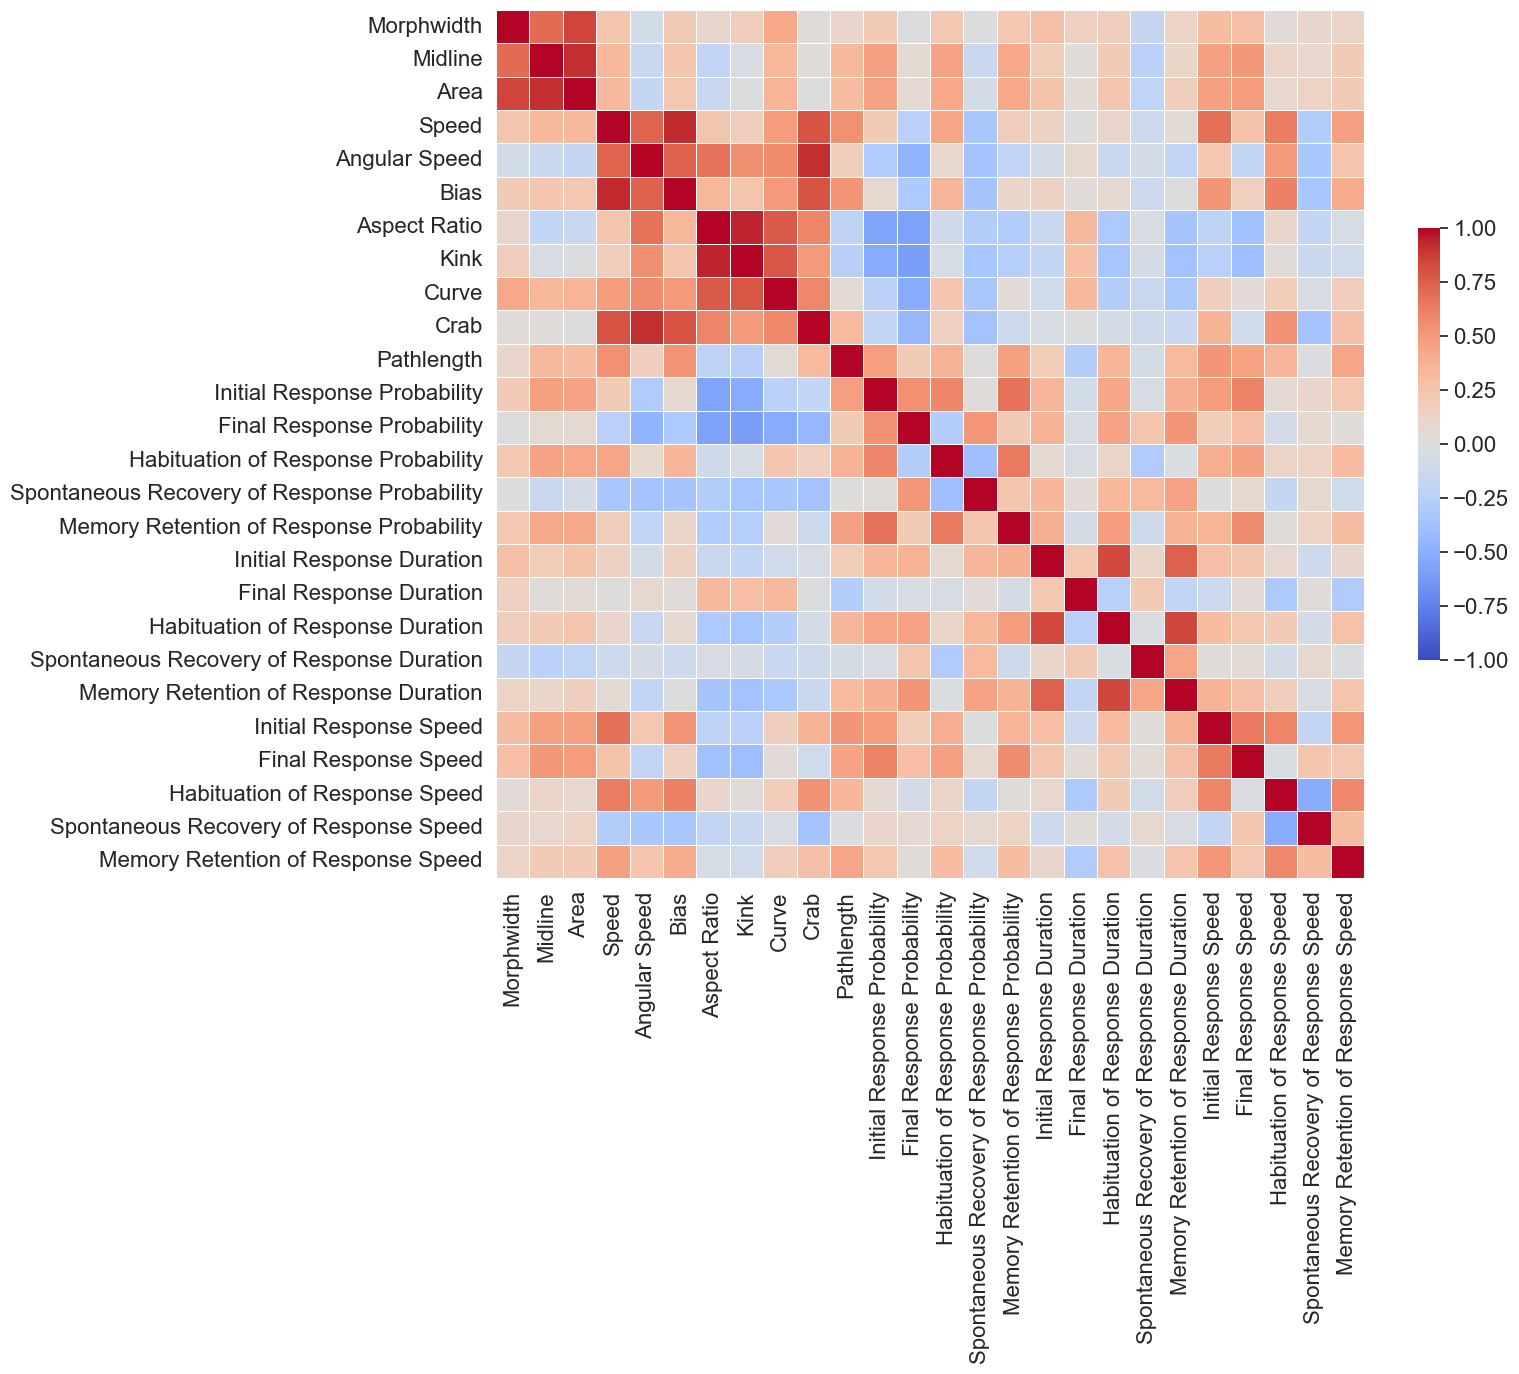

In [7]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
Tstat_start_corr = Tstat_gene_start_Correlation.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = Tstat_start_corr, 
                 annot = False, 
                #  annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=True,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/PD_Tap_Screen_Correlation_Phenotypes_NoN2.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Post Stimulus Arousal

In [8]:
tap_psa_chooser=FileChooser(starting_directory)
display(tap_psa_chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [9]:
tap_psa = pd.read_csv(tap_psa_chooser.selected)
tap_psa

dataset      Gene  Allele      Date                 Plate_id  \
0      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
1      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
2      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
3      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
4      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
...                ...       ...     ...       ...                      ...   
43488    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   
43489    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   
43490    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   
43491    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   
43492    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   

       plate     Screen  taps      time  Duration   dist  Probability  \
0        1.0  PD_Screen   1.0   599.983      3.49  0.579     0.645833   
1        1.0  PD_Screen   2.0   609.886      3.08  0.632     0.519231   
2        1.0  PD_Screen   3.0   619.955      1.96  0.441     0.622642   
3        1.0  PD_Screen   4.0   629.982      1.82  0.433     0.569444   
4        1.0  PD_Screen   5.0   639.913      1.88  0.455     0.558824   
...      ...        ...   ...       ...       ...    ...          ...   
43488   11.0  PD_Screen  27.0   859.979      0.79  0.163     0.450000   
43489   11.0  PD_Screen  28.0   869.983      1.04  0.203     0.350877   
43490   11.0  PD_Screen  29.0   879.979      0.82  0.163     0.456140   
43491   11.0  PD_Screen  30.0   889.911      0.72  0.133     0.415094   
43492   11.0  PD_Screen  31.0  1189.993      3.23  0.687     0.583333   

          Speed  PSA Instantaneous Speed  PSA Interval Speed  PSA Bias  \
0      0.165903                 0.064750            0.089265  0.157500   
1      0.205195                 0.155022            0.116628  0.441944   
2      0.225000                 0.196569            0.097331  0.761885   
3      0.237912                 0.173472            0.096256  0.796500   
4      0.242021                 0.181033            0.101383  0.818445   
...         ...                      ...                 ...       ...   
43488  0.206329                 0.091838            0.068697  0.609362   
43489  0.195192                 0.092985            0.068395  0.589400   
43490  0.198780                 0.088139            0.069229  0.539254   
43491  0.184722                 0.085389            0.068807  0.531281   
43492  0.212693                 0.073436            0.060772  0.331639   

       PSA Aspect Ratio   PSA Kink  PSA Curve  PSA Crab  
0              0.435900  68.320000  38.920000  0.010860  
1              0.424056  68.833336  38.350000  0.022233  
2              0.347308  56.380770  35.723076  0.023438  
3              0.332111  53.738888  34.622223  0.019378  
4              0.314889  51.277780  34.488888  0.019711  
...                 ...        ...        ...       ...  
43488          0.285759  49.529310  26.263794  0.012059  
43489          0.286073  48.634544  26.316364  0.011809  
43490          0.311356  50.983050  27.177965  0.012564  
43491          0.303544  49.521053  26.407017  0.012151  
43492          0.385417  70.050000  31.050001  0.012017  

[43493 rows x 20 columns]

In [10]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/Gene_Orthology.csv').drop(columns=['Unnamed: 0'])
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"})
print(Gene_Orthology)

          Orthology    Gene Human Gene Category
0       KCNS3•kvs-5   kvs-5      KCNS3     GWAS
1       LAMB2•lam-1   lam-1      LAMB2     GWAS
2         GBA•gba-4   gba-4        GBA     GWAS
3      MCCC1•mccc-1  mccc-1      MCCC1     GWAS
4     CAMK2D•unc-43  unc-43     CAMK2D     GWAS
..              ...     ...        ...      ...
123    GIGYF2•gyf-1   gyf-1     GIGYF2     PARK
124   WBSCR17•gly-7   gly-7    WBSCR17     GWAS
125  WBSCR17•gly-10  gly-10    WBSCR17     GWAS
126     IMMT•immt-1  immt-1       IMMT     GWAS
127     IMMT•immt-2  immt-2       IMMT     GWAS

[128 rows x 4 columns]


In [11]:
tap_psa_orthology=pd.merge(tap_psa,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

tap_psa_orthology=tap_psa_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(tap_psa_orthology)
print("-"*50)
print(tap_psa_orthology[tap_psa_orthology['Gene'].isna()]['dataset'].unique())

               dataset Worm Gene  Allele      Date                 Plate_id  \
0      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
1      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
2      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
3      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
4      C29E4.10_ok2752  C29E4.10  ok2752  20230710  20230710_104441_B0706ea   
...                ...       ...     ...       ...                      ...   
44108    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   
44109    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   
44110    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   
44111    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   
44112    vps-35_ok1880    vps-35  ok1880  20221014  20221014_141302_A1014ce   

       plate     Screen  taps      time  Duration  

In [12]:
tap_psa_comparisons = tap_psa_orthology[tap_psa_orthology['Worm Gene'].isin(['N2', 'cat-2', 'bas-1','cat-1'])].copy().dropna()
tap_psa_comparisons = tap_psa_comparisons.astype({"taps": int})
tap_psa_comparisons.columns

Index(['dataset', 'Worm Gene', 'Allele', 'Date', 'Plate_id', 'plate', 'Screen',
       'taps', 'time', 'Duration', 'dist', 'Probability', 'Speed',
       'PSA Instantaneous Speed', 'PSA Interval Speed', 'PSA Bias',
       'PSA Aspect Ratio', 'PSA Kink', 'PSA Curve', 'PSA Crab', 'Gene',
       'Human Gene', 'Category'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

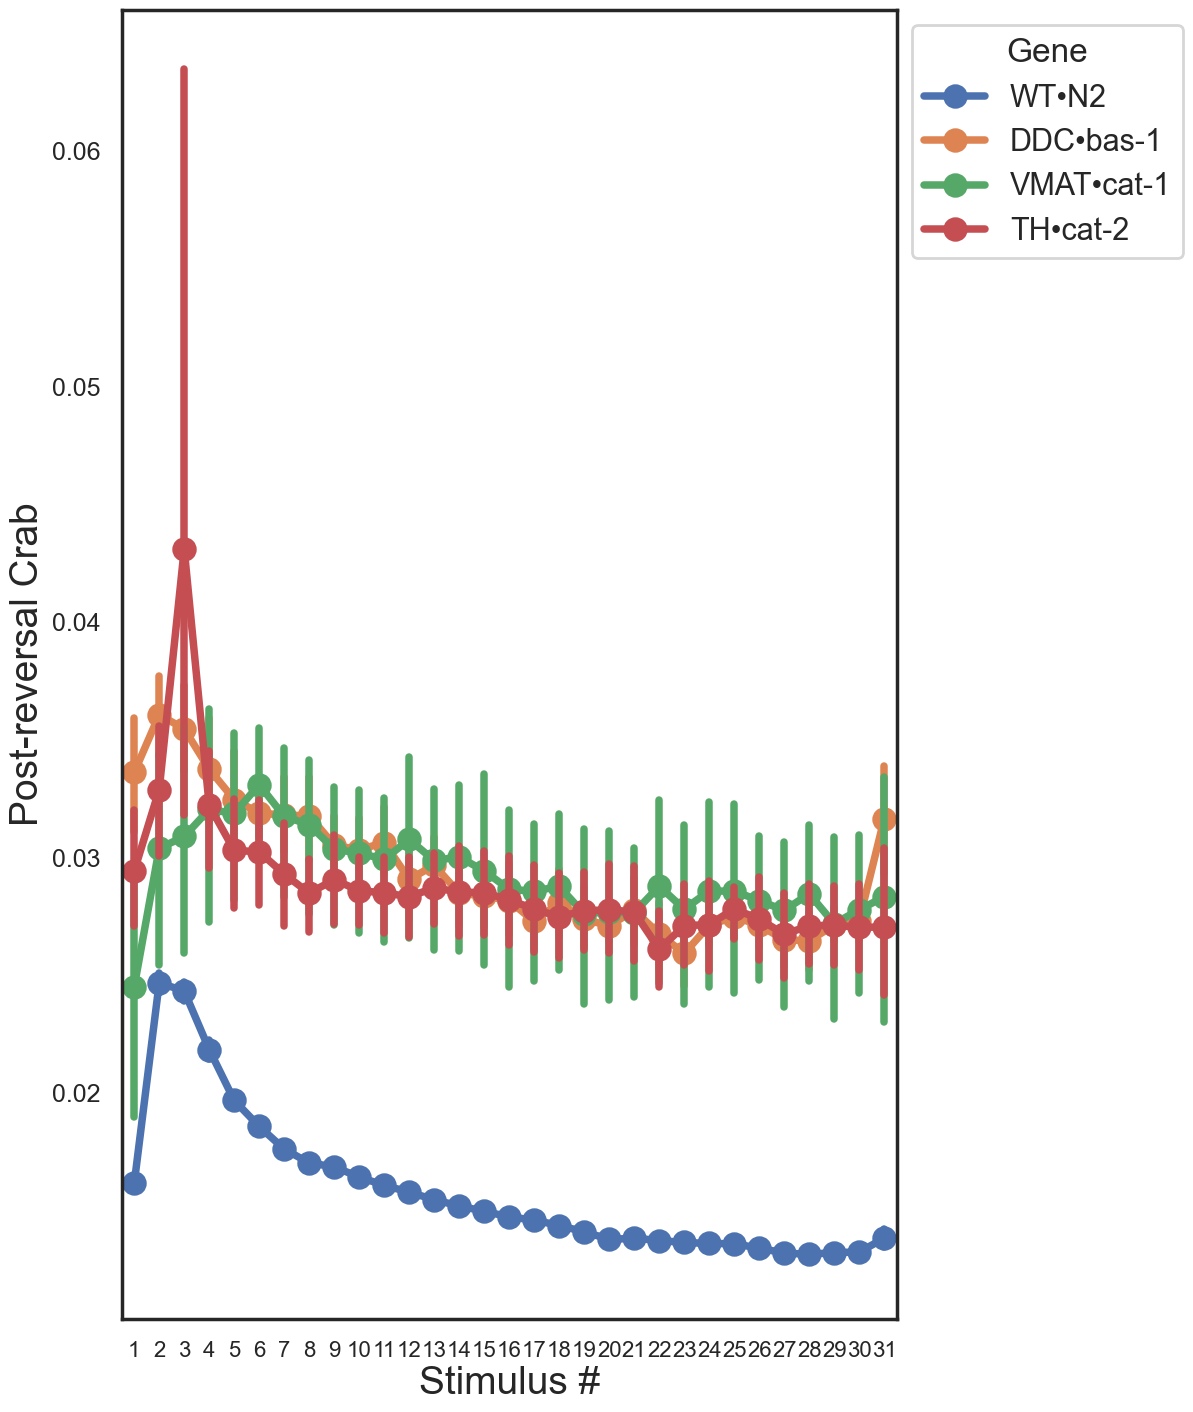

In [13]:
Title = "" #<---------------- Input Here -----------------
FileName = "PDScreen_PostStimArousal_Crab"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(10, 17))
plt.gca().xaxis.grid(False)

ax = sns.pointplot(x="taps",
                   y="PSA Crab",
                   data=tap_psa_comparisons,
                   hue="Gene",
                   palette=sns.color_palette("deep", n_colors=4),
                   legend=True,
                   estimator='mean',
                   errorbar=("ci")
)

# ax=sns.stripplot(x="Tap_num",
#                  y="Crab",
#                  data=PostStimN2,
#                  size=6,
#              color="k")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Stimulus #", fontsize=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
plt.ylabel("Post-reversal Crab", fontsize=28)
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
# plt.title("Post Stimulus Arousal of N2, all runs from PD Screen")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [128]:
Tstat_gene.columns

Index(['Gene', 'Morphwidth', 'Midline', 'Area', 'Instantaneous Speed',
       'Interval Speed', 'Angular Speed', 'Bias', 'Aspect Ratio', 'Kink',
       'Curve', 'Crab', 'Pathlength', 'Initial Response Duration',
       'Initial Response Probability', 'Initial Response Speed',
       'Final Response Duration', 'Final Response Probability',
       'Final Response Speed', 'Habituation of Response Duration',
       'Habituation of Respones Probability', 'Habituation of Response Speed',
       'Spontaneous Recovery of Response Duration',
       'Spontaneous Recovery of Response Probability',
       'Spontaneous Recovery of Response Speed',
       'Memory Retention of Response Duration',
       'Memory Retention of Response Probability',
       'Memory Retention of Response Speed', 'Screen', 'Initial PSA Speed',
       'Final PSA Speed', 'Recovery PSA Speed', 'Peak PSA Speed',
       'Peak Tap Number PSA Instantaneous Speed', 'Average PSA Speed',
       'Sensitization PSA Instantaneous Speed

In [132]:
Tstat_gene = Tstat_gene.rename(columns={"Instantaneous Speed":"Speed", "Initial PSA Instantaneous Speed": "Initial PSA Speed",
                                       "Final PSA Instantaneous Speed": "Final PSA Speed",
                                       "Recovery PSA Instantaneous Speed": "Recovery PSA Speed",
                                       "Peak PSA Instantaneous Speed": "Peak PSA Speed",
                                       "Peak Tap Number PSA Instantaneous Speed": "Peak Tap Number PSA Speed",
                                       "Average PSA Instantaneous Speed": "Average PSA Speed",
                                       "Sensitization PSA Instantaneous Speed": "Sensitization PSA Speed",
                                       "Habituation PSA Instantaneous Speed": "Habituation PSA Speed",
                                       "Spontaneous Recovery PSA Instantaneous Speed": "Spontaneous Recovery PSA Speed",
                                       "Memory Retention PSA Instantaneous Speed": "Memory Retention PSA Speed"})
Tstat_gene.columns

Index(['Gene', 'Morphwidth', 'Midline', 'Area', 'Speed', 'Interval Speed',
       'Angular Speed', 'Bias', 'Aspect Ratio', 'Kink', 'Curve', 'Crab',
       'Pathlength', 'Initial Response Duration',
       'Initial Response Probability', 'Initial Response Speed',
       'Final Response Duration', 'Final Response Probability',
       'Final Response Speed', 'Habituation of Response Duration',
       'Habituation of Respones Probability', 'Habituation of Response Speed',
       'Spontaneous Recovery of Response Duration',
       'Spontaneous Recovery of Response Probability',
       'Spontaneous Recovery of Response Speed',
       'Memory Retention of Response Duration',
       'Memory Retention of Response Probability',
       'Memory Retention of Response Speed', 'Screen', 'Initial PSA Speed',
       'Final PSA Speed', 'Recovery PSA Speed', 'Peak PSA Speed',
       'Peak Tap Number PSA Speed', 'Average PSA Speed',
       'Sensitization PSA Speed', 'Habituation PSA Speed',
       'Sponta

In [133]:
psa_gene_summary = Tstat_gene[['Initial PSA Speed', 'Final PSA Speed',
       'Recovery PSA Speed', 'Peak PSA Speed',
       'Peak Tap Number PSA Speed',
       'Average PSA Speed',
       'Sensitization PSA Speed',
       'Habituation PSA Speed',
       'Spontaneous Recovery PSA Speed',
       'Memory Retention PSA Speed', 'Initial PSA Bias',
       'Final PSA Bias', 'Recovery PSA Bias', 'Peak PSA Bias',
       'Peak Tap Number PSA Bias', 'Average PSA Bias',
       'Sensitization PSA Bias', 'Habituation PSA Bias',
       'Spontaneous Recovery PSA Bias', 'Memory Retention PSA Bias',
       'Initial PSA Angular Speed', 'Final PSA Angular Speed',
       'Recovery PSA Angular Speed', 'Peak PSA Angular Speed',
       'Peak Tap Number PSA Angular Speed', 'Average PSA Angular Speed',
       'Sensitization PSA Angular Speed', 'Habituation PSA Angular Speed',
       'Spontaneous Recovery PSA Angular Speed',
       'Memory Retention PSA Angular Speed', 'Initial PSA Aspect Ratio',
       'Final PSA Aspect Ratio', 'Recovery PSA Aspect Ratio',
       'Peak PSA Aspect Ratio', 'Peak Tap Number PSA Aspect Ratio',
       'Average PSA Aspect Ratio', 'Sensitization PSA Aspect Ratio',
       'Habituation PSA Aspect Ratio', 'Spontaneous Recovery PSA Aspect Ratio',
       'Memory Retention PSA Aspect Ratio', 'Initial PSA Kink',
       'Final PSA Kink', 'Recovery PSA Kink', 'Peak PSA Kink',
       'Peak Tap Number PSA Kink', 'Average PSA Kink',
       'Sensitization PSA Kink', 'Habituation PSA Kink',
       'Spontaneous Recovery PSA Kink', 'Memory Retention PSA Kink',
       'Initial PSA Curve', 'Final PSA Curve', 'Recovery PSA Curve',
       'Peak PSA Curve', 'Peak Tap Number PSA Curve', 'Average PSA Curve',
       'Sensitization PSA Curve', 'Habituation PSA Curve',
       'Spontaneous Recovery PSA Curve', 'Memory Retention PSA Curve',
       'Initial PSA Crab', 'Final PSA Crab', 'Recovery PSA Crab',
       'Peak PSA Crab', 'Peak Tap Number PSA Crab', 'Average PSA Crab',
       'Sensitization PSA Crab', 'Habituation PSA Crab',
       'Spontaneous Recovery PSA Crab', 'Memory Retention PSA Crab']].copy().dropna()

In [ ]:
psa_gene_summary = psa_gene_summary.rename(columns={"Initial PSA Instantaneous Speed": "Initial PSA Instantaneous Speed",

Initial PSA Instantaneous Speed  Final PSA Instantaneous Speed  \
0                           0.822971                       1.552632   
1                          -0.328250                      -0.231972   
2                           1.599478                       3.704727   
3                           0.172894                      -0.006748   
4                           0.000000                       0.000000   
..                               ...                            ...   
104                        -1.665179                      -2.180991   
105                        -1.175827                      -2.115076   
106                        -9.225318                     -18.066078   
110                       -12.508972                     -12.842146   
112                       -11.619043                     -11.757023   

     Recovery PSA Instantaneous Speed  Peak PSA Instantaneous Speed  \
0                            1.746968                     -0.192409   
1                           -0.746152                     -1.756432   
2                            1.604442                      0.205804   
3                            0.580516                     -2.870205   
4                            0.000000                      0.000000   
..                                ...                           ...   
104                         -5.170132                     -5.322922   
105                         -2.135429                     -3.479300   
106                        -11.366180                    -24.003737   
110                         -9.140977                    -13.307896   
112                         -8.015032                    -20.219557   

     Peak Tap Number PSA Instantaneous Speed  Average PSA Instantaneous Speed  \
0                                  -1.444630                         1.245530   
1                                   1.341641                        -0.917789   
2                                   1.219346                         3.324804   
3                                   0.929744                        -1.143471   
4                                   0.000000                         0.000000   
..                                       ...                              ...   
104                                -0.276026                        -3.369889   
105                                -1.702513                        -2.860900   
106                                 2.449501                       -23.120688   
110                                 0.894560                       -13.950092   
112                                 2.407265                       -14.750017   

     Sensitization PSA Instantaneous Speed  \
0                                -1.080542   
1                                -0.784002   
2                                -1.672150   
3                                -2.806675   
4                                 0.000000   
..                                     ...   
104                              -2.749340   
105                              -1.710271   
106                             -14.047029   
110                              -8.182549   
112                             -12.004397   

     Habituation PSA Instantaneous Speed  \
0                              -2.758245   
1                              -1.870041   
2                              -3.970420   
3                              -3.654744   
4                               0.000000   
..                                   ...   
104                            -5.460823   
105                            -2.310439   
106                           -14.948282   
110                            -6.783364   
112                           -10.687405   

     Spontaneous Recovery PSA Instantaneous Speed  \
0                                       -3.756971   
1                                        0.715132   
2                                       -0.158611   
3                               

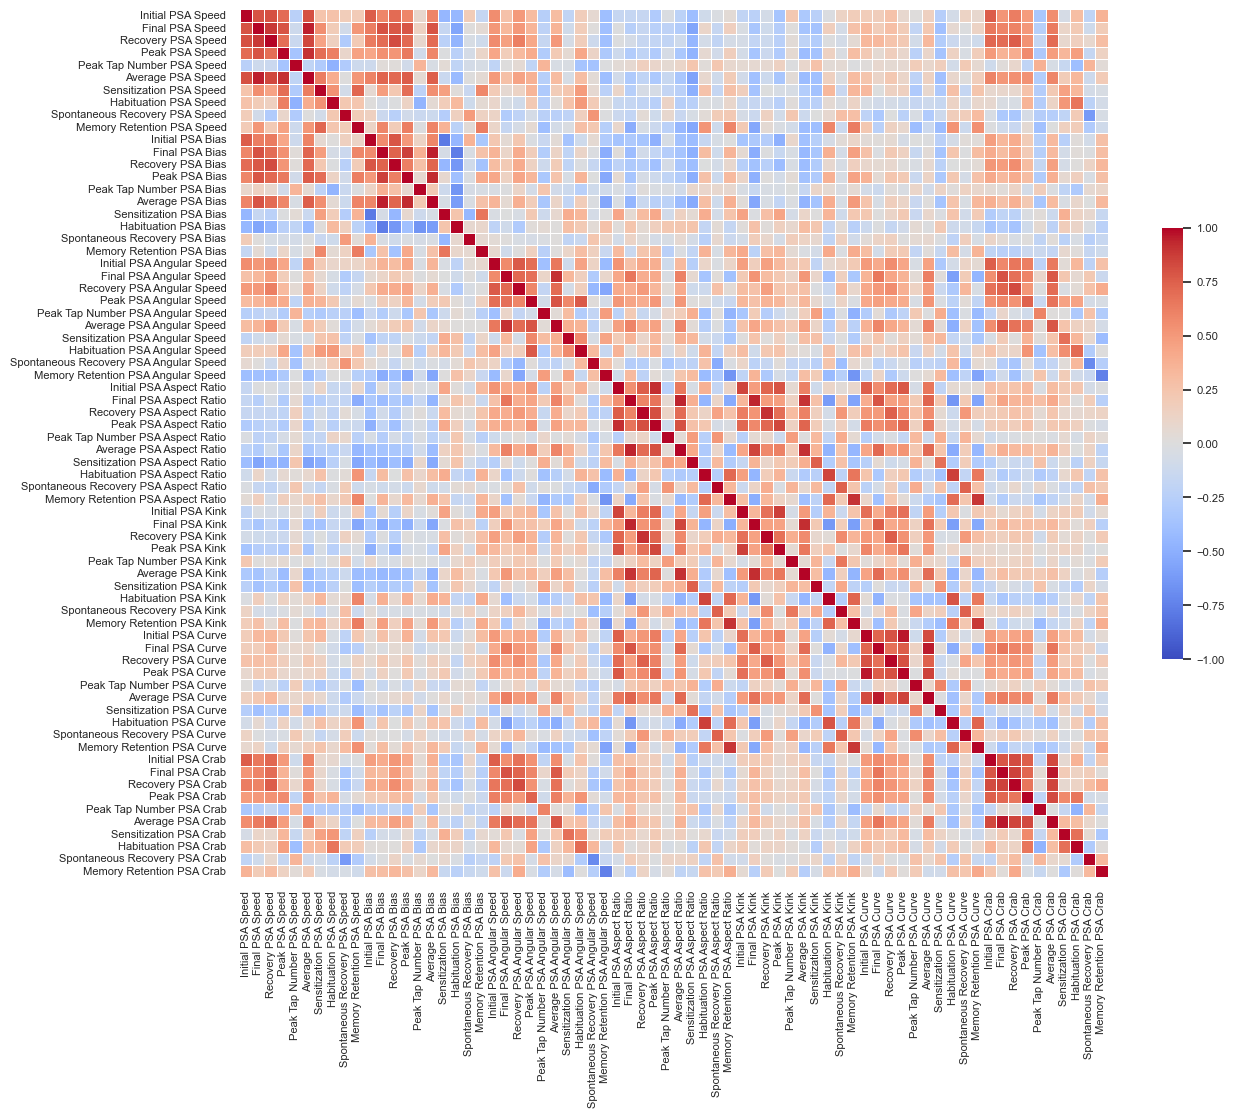

In [134]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
psa_corr = psa_gene_summary.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 8)
plt.rc('ytick', labelsize = 8) 
ax = sns.heatmap(data = psa_corr, 
                 annot = False, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=True,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/PD_Tap_Screen_PSAPhenotypes_Correlation.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [135]:
Tstat_gene_Correlation = Tstat_gene.copy().drop(columns = ['Gene', 'Screen','Interval Speed']).rename(columns={'Instantaneous Speed': 'Speed',"Habituation of Respones Probability":"Habituation of Response Probability"})  
Tstat_gene_Correlation

Morphwidth     Midline        Area       Speed  Angular Speed  \
0    -48.494145  -34.970055  -65.781339   94.414318      84.836184   
1     58.263752   21.351098   65.203746  -25.773717     -33.570599   
2    -22.601588  -34.779421  -60.745246  267.864906     179.260420   
3    -62.484385  -82.167243 -113.043862   69.816290      61.647391   
4      0.000000    0.000000    0.000000    0.000000       0.000000   
..          ...         ...         ...         ...            ...   
108 -101.850124 -234.169230 -210.555197   44.031732     182.856892   
109 -166.412154 -472.028220 -511.547548 -167.244925      65.189587   
110 -113.318379 -378.428538 -265.329697  -65.391543      46.464973   
111   -8.909107 -576.943712 -344.383937  -89.421561     177.586605   
112 -160.557702 -642.188620 -554.237138  -65.859407      65.614759   

           Bias  Aspect Ratio        Kink       Curve        Crab  Pathlength  \
0    100.476655    -27.128295  -53.158767  -12.146881   87.357196   75.832322   
1     -0.264180     -1.467973  -13.252384  -42.385945  -45.526762 -110.534882   
2    260.450831     67.135623   17.451373   27.355743   34.055161  -17.935056   
3     70.269514    -45.441001  -33.141812    5.114633   71.698845   14.011904   
4      0.000000      0.000000    0.000000    0.000000    0.000000    0.000000   
..          ...           ...         ...         ...         ...         ...   
108   21.936045     76.216716   41.753969  -31.303114  116.520529 -131.163306   
109  -36.332082     56.701590   -1.610046 -139.623152    7.865439 -212.394918   
110    6.282208    234.742202  214.750231   75.478143   19.670436  -98.916164   
111  -55.103890    488.440475  469.279867  203.583337  147.876770 -364.527042   
112   55.961052    109.012196   73.818767 -289.121670   19.600156   36.985438   

     Initial Response Duration  Initial Response Probability  \
0                    -0.968976                     -3.009073   
1                     1.257409                     -1.193088   
2                     2.229089                      0.969676   
3                    -0.557627                     -3.448225   
4                     0.000000                      0.000000   
..                         ...                           ...   
108                  -2.589631                     -3.645216   
109                 -10.464760                     -8.852316   
110                  -4.652906                     -7.507512   
111                  -0.433631                    -14.449969   
112                   4.717133                     -1.919111   

     Initial Response Speed  Final Response Duration  \
0                  1.167611                -4.139938   
1                 -1.385297                 0.395951   
2                  3.818974                 2.824103   
3                  1.181341                -0.190604   
4                  0.000000                 0.000000   
..                      ...                      ...   
108               -3.124088                -4.926801   
109              -11.430301                -0.007792   
110               -6.287133                -0.270224   
111              -11.484568                 2.020561   
112               -6.094706                -0.353385   

     Final Response Probability  Final Response Speed  \
0                     -2.363608             -1.114380   
1                     -2.453282              0.633006   
2                     -0.645377             -0.357721   
3                     -5.584485              0.540107   
4                      0.000000              0.000000   
..                          ...                   ...   
108                    3.261316             -4.787341   
109                   -5.191875             -8.288657   
110                   -5.543775             -3.135313   
111                   -8.198756            -24.729431   
112                    3.273666             -2.636512   

     Habituation of Response Duration  Habituation of Response P

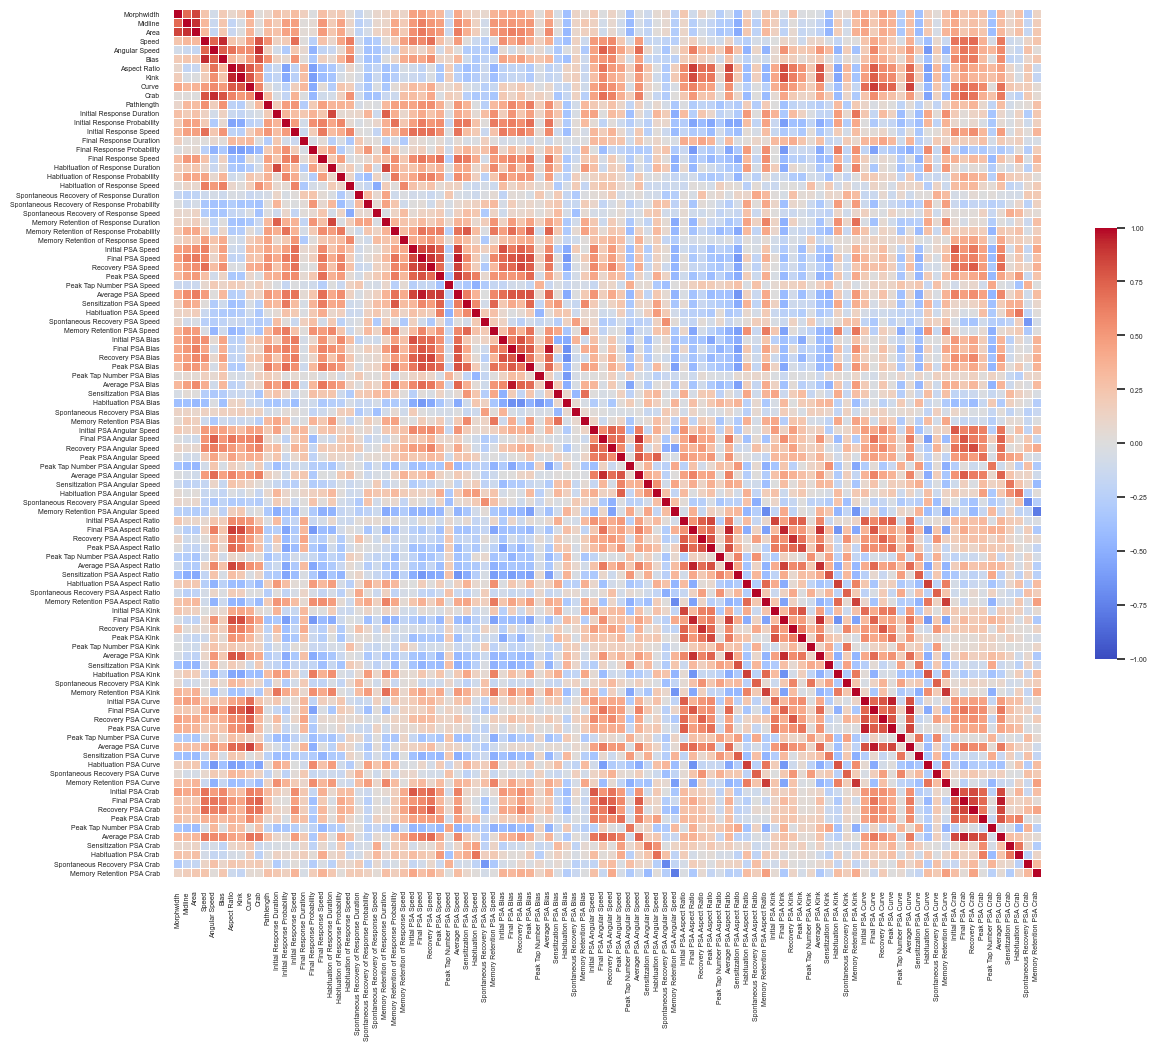

In [136]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
tstat_corr = Tstat_gene_Correlation.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 5)
plt.rc('ytick', labelsize = 5) 
ax = sns.heatmap(data = tstat_corr, 
                 annot = False, 
                 annot_kws={"size": 5},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=True,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 12)
ax.set_xlabel('', fontsize = 12)

# for t in ax.texts:
#     if float(t.get_text())>=0.75 or float(t.get_text())<=-0.75:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/PD_Tap_Screen_AllPhenotypes_Correlation.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

### MSD Data

In [ ]:
MSD_data_chooser=FileChooser(starting_directory)
display(MSD_data_chooser)

In [ ]:
MSD_data = pd.read_csv(MSD_data_chooser.selected)
MSD_data.columns

In [ ]:
MSD_data_orthology=pd.merge(MSD_data,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

MSD_data_orthology=MSD_data_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(MSD_data_orthology)
print("-"*50)
print(MSD_data_orthology[MSD_data_orthology['Gene'].isna()]['Worm Gene'].unique())

In [ ]:
list(set([column.split("-")[0] for column in MSD_data_orthology.columns.to_list()]))

In [ ]:
list_of_phenotypes = list(set([column.split("-")[0] for column in MSD_data_orthology.columns.to_list()]))
list_of_phenotypes.remove("Gene")
list_of_phenotypes.remove("Screen")
list_of_phenotypes.remove("Category")
list_of_phenotypes.remove("Human Gene")
list_of_phenotypes.remove("Worm Gene")
list_of_phenotypes

In [ ]:
for phenotypes in list_of_phenotypes:
    data_sorted = MSD_data_orthology.sort_values(by=[f"{phenotypes}-mean"]).reset_index(drop=True)
    gene_colors = ["dimgray"] * len(data_sorted["Gene"])

# Add scatter plot with error bars
    for i, row in data_sorted.iterrows():
        if row['Worm Gene'] == "N2":
            gene_colors[i] = "N2"
        elif row[f"{phenotypes}-ci95_hi"] < MSD_data_orthology[MSD_data_orthology['Worm Gene'] == 'N2'][f"{phenotypes}-ci95_lo"].values[0] or row[f"{phenotypes}-ci95_lo"] > MSD_data_orthology[MSD_data_orthology['Worm Gene'] == 'N2'][f"{phenotypes}-ci95_hi"].values[0]:
            gene_colors[i] = "Significant"
        else:
            gene_colors[i] = "Not Significant"
        # color = "red" if row['Gene'] == "N2" else "dimgrey"

    color_list = ["dimgray"] * len(data_sorted["Gene"])

    for i in range(len(gene_colors)):
        if gene_colors[i] == "N2":
            color_list[i] = "black"
        elif gene_colors[i] == "Significant":
            color_list[i] = "skyblue"
        else:
            color_list[i] = "darkgray"
    
    Title = "" #<---------------- Input Here -----------------
    FileName = f"MSD_{phenotypes}"
    sns.set_context("poster")
    plt.figure(linewidth = 1)
    plt.figure(figsize=(27, 10))
    plt.gca().xaxis.grid(False)

    ax = sns.scatterplot(x="Gene",
                    y=f"{phenotypes}-mean",
                    data=data_sorted,
                    hue=gene_colors,
                    palette={"N2": "black", "Significant": "skyblue", "Not Significant": "darkgray"},linewidth=0,
    )

    ax.errorbar(data_sorted['Gene'], data_sorted[f"{phenotypes}-mean"], 
                yerr=[data_sorted[f"{phenotypes}-mean"] - data_sorted[f"{phenotypes}-ci95_lo"],
                    data_sorted[f"{phenotypes}-ci95_hi"] - data_sorted[f"{phenotypes}-mean"]],
                fmt='none', ecolor=color_list, capsize=0)

    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # plt.xlabel("Stimulus #", fontsize=28)
    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=18)
    plt.ylabel(phenotypes.split("-")[0], fontsize=28)

    # Get the first two and last y-tick positions.
    minx, nextx, *_, maxx = ax.get_xticks()
    # Compute half the y-tick interval (for example).
    eps = (nextx - minx) / 1.5  # <-- Your choice.
    # Adjust the limits.
    ax.set_xlim(minx-eps, maxx+eps)

    # plt.ylim(top = 0.5, bottom = -0.5)
    # plt.title("Post Stimulus Arousal of N2, all runs from PD Screen")
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.savefig(f'/Users/Joseph/Desktop/TapHab_Screen/MSD_Data/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
    # plt.show()

In [ ]:

phenotypes = list(set([column.split("-")[0] for column in MSD_data.columns.to_list()]))
phenotypes.sort()
phenotype_chooser = widgets.Select(options=phenotypes, value=phenotypes[0], description='Select a Phenotype:')
display(phenotype_chooser)

In [ ]:
selected_phenotype = phenotype_chooser.value


In [ ]:
type(MSD_data[MSD_data.Gene == 'N2']['Instantaneous Speed-sem'].values[0])

In [ ]:
# seaborn graph of phenotypic view (sample mean distance) + st.pyplot
data_sorted = MSD_data.sort_values(by=[f"{selected_phenotype}-mean"]).reset_index(drop=True)
gene_colors = ["dimgray"] * len(data_sorted["Gene"])

# Add scatter plot with error bars
for i, row in data_sorted.iterrows():
    if row['Gene'] == "N2":
        gene_colors[i] = "N2"
    elif row[f"{selected_phenotype}-ci95_hi"] < MSD_data[MSD_data.Gene == 'N2'][f"{selected_phenotype}-ci95_lo"].values[0] or row[f"{selected_phenotype}-ci95_lo"] > MSD_data[MSD_data.Gene == 'N2'][f"{selected_phenotype}-ci95_hi"].values[0]:
        gene_colors[i] = "Significant"
    else:
        gene_colors[i] = "Not Significant"
        # color = "red" if row['Gene'] == "N2" else "dimgrey"


In [ ]:
color_list = ["dimgray"] * len(data_sorted["Gene"])

for i in range(len(gene_colors)):
    if gene_colors[i] == "N2":
        color_list[i] = "black"
    elif gene_colors[i] == "Significant":
        color_list[i] = "skyblue"
    else:
        color_list[i] = "darkgray"

In [ ]:
Title = "" #<---------------- Input Here -----------------
FileName = f"MSD_{selected_phenotype}"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(27, 10))
plt.gca().xaxis.grid(False)

ax = sns.scatterplot(x="Gene",
                   y=f"{selected_phenotype}-mean",
                   data=data_sorted,
                   hue=gene_colors,
                   palette={"N2": "black", "Significant": "skyblue", "Not Significant": "darkgray"},linewidth=0,
)

ax.errorbar(data_sorted['Gene'], data_sorted[f"{selected_phenotype}-mean"], 
            yerr=[data_sorted[f"{selected_phenotype}-mean"] - data_sorted[f"{selected_phenotype}-ci95_lo"],
                   data_sorted[f"{selected_phenotype}-ci95_hi"] - data_sorted[f"{selected_phenotype}-mean"]],
            fmt='none', ecolor=color_list, capsize=0)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.xlabel("Stimulus #", fontsize=28)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=18)
plt.ylabel(selected_phenotype.split("-")[0], fontsize=28)

# Get the first two and last y-tick positions.
minx, nextx, *_, maxx = ax.get_xticks()
# Compute half the y-tick interval (for example).
eps = (nextx - minx) / 1.5  # <-- Your choice.
# Adjust the limits.
ax.set_xlim(minx-eps, maxx+eps)

# plt.ylim(top = 0.5, bottom = -0.5)
# plt.title("Post Stimulus Arousal of N2, all runs from PD Screen")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

### MSD Stacked Barplot

In [2]:
starting_directory='/Users/Joseph/Desktop/'
MSD_counts_chooser=FileChooser(starting_directory)
display(MSD_counts_chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [8]:
MSD_counts = pd.read_csv(MSD_counts_chooser.selected)
MSD_counts

Phenotype  Impair  Enhance
0                      Morphwidth     -45        6
1                         Midline     -70        1
2                            Area     -64        3
3                           Speed     -41       16
4                   Angular Speed     -29       32
..                            ...     ...      ...
91               Average PSA Crab     -57       17
92         Sensitization PSA Crab     -45        6
93           Habituation PSA Crab     -57        6
94  Spontaneous Recovery PSA Crab      -5       11
95      Memory Retention PSA Crab     -10        4

[96 rows x 3 columns]

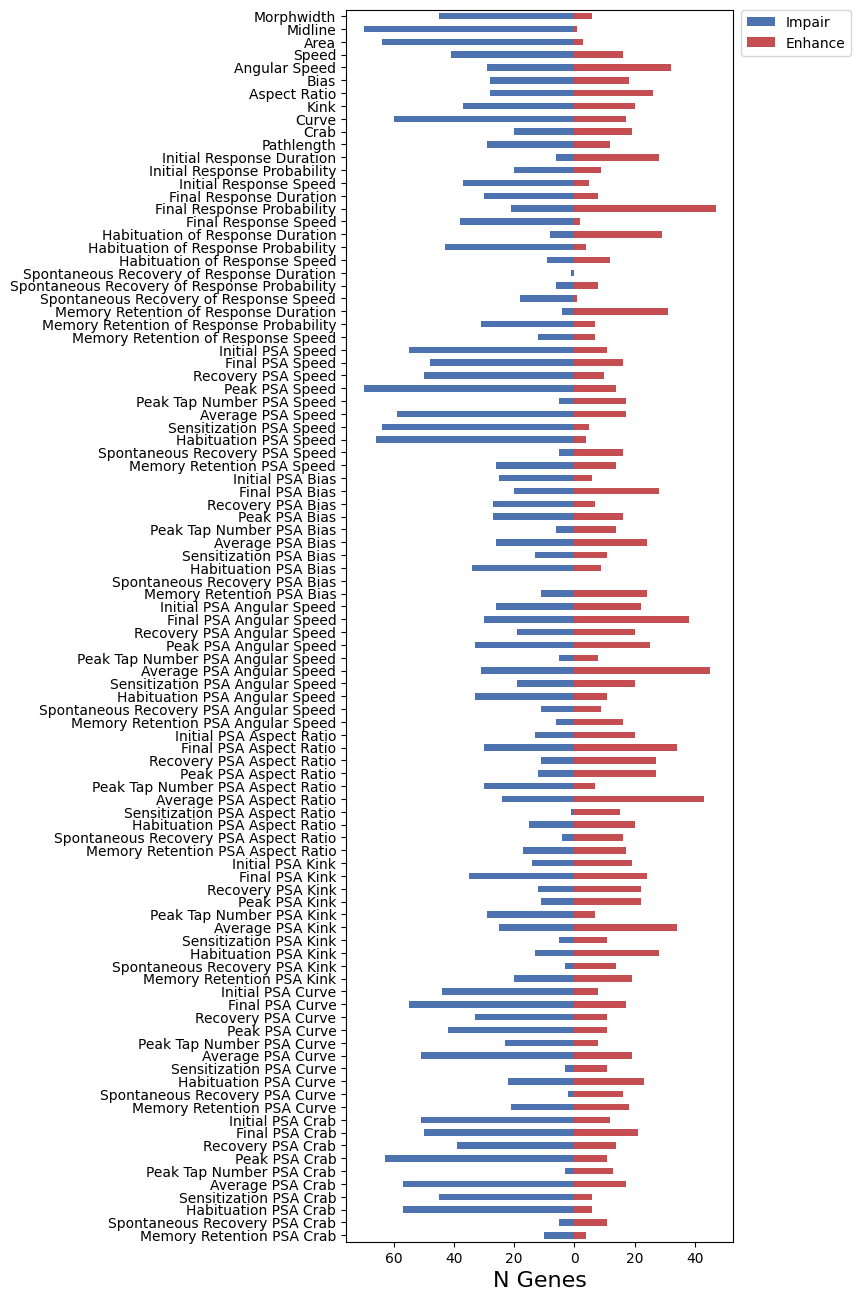

In [25]:
# plt.figure(linewidth = 1)
# plt.figure(figsize=(27, 10))
# plt.gca().xaxis.grid(False)

ax =  MSD_counts.set_index('Phenotype')[::-1].plot(kind='barh', stacked=True, figsize=(5, 16), color=[sns.color_palette("deep")[0], sns.color_palette("deep")[3]])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("N Genes", fontsize=16)
plt.ylabel("", fontsize=16)
ax.set_xticks([-60,-40,-20,0,20,40])
ax.set_xticklabels(['60','40','20','0','20','40'])
plt.savefig(f'/Users/Joseph/Desktop/NumberOfGenes.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

### Allele and Human Gene Correlation Distributions

In [23]:
starting_directory='/Users/Joseph/Desktop/'
allele_tstat_chooser=FileChooser(starting_directory)
display(allele_tstat_chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [ ]:
Tstat_allele = pd.read_csv(allele_tstat_chooser.selected)
Tstat_allele = Tstat_allele.drop(columns = ['Interval Speed']).rename(columns={'Instantaneous Speed': 'Speed',"Habituation of Respones Probability":"Habituation of Response Probability"}).set_index("Screen").reset_index(drop=False)
Tstat_allele[['Gene','Allele']]= Tstat_allele.dataset.str.split("_", expand=True)
Tstat_allele.Allele = Tstat_allele.Allele.fillna("N2")
Tstat_allele['Genotype'] = Tstat_allele['Gene'] + "(" + Tstat_allele['Allele'] + ")"

Screen          dataset  Morphwidth     Midline        Area  \
0    PD_Screen  C29E4.10_ok2752  -48.494145  -34.970055  -65.781339   
1    PD_Screen   F32D8.13_gk584   58.263752   21.351098   65.203746   
2    PD_Screen    F53B2.5_ok226  -22.601588  -34.779421  -60.745246   
3    PD_Screen   F54B11.5_ve743  -62.484385  -82.167243 -113.043862   
4    PD_Screen               N2    0.000000    0.000000    0.000000   
..         ...              ...         ...         ...         ...   
179  PD_Screen     unc-59_e1005  -88.192479 -314.835285 -186.361185   
180  PD_Screen      unc-59_e261  -72.244618 -321.402844 -211.430327   
181  PD_Screen      unc-70_e524  169.580784 -569.916794 -516.327280   
182  PD_Screen      unc-70_n493 -146.958650 -765.133033 -977.280797   
183  PD_Screen    vps-35_ok1880 -160.557702 -642.188620 -554.237138   

          Speed  Angular Speed        Bias  Aspect Ratio        Kink  \
0     94.414318      84.836184  100.476655    -27.128295  -53.158767   
1    -25.773717     -33.570599   -0.264180     -1.467973  -13.252384   
2    267.864906     179.260420  260.450831     67.135623   17.451373   
3     69.816290      61.647391   70.269514    -45.441001  -33.141812   
4      0.000000       0.000000    0.000000      0.000000    0.000000   
..          ...            ...         ...           ...         ...   
179  -57.422575      15.158439   -5.176313    166.325605  149.930471   
180  -34.836132      59.531984   15.815701    176.839201  167.213118   
181   33.823471     189.871580   46.659389    835.675780  510.319562   
182 -170.198176      92.345628 -133.562016    353.706590  319.831596   
183  -65.859407      65.614759   55.961052    109.012196   73.818767   

          Curve        Crab  Pathlength  Initial Response Duration  \
0    -12.146881   87.357196   75.832322                  -0.968976   
1    -42.385945  -45.526762 -110.534882                   1.257409   
2     27.355743   34.055161  -17.935056                   2.229089   
3      5.114633   71.698845   14.011904                  -0.557627   
4      0.000000    0.000000    0.000000                   0.000000   
..          ...         ...         ...                        ...   
179   35.835655    5.847455 -145.301170                  -2.091481   
180   90.558374   26.852368  -31.004049                  -5.923376   
181  393.738820  230.851065 -289.011822                   0.254784   
182  124.909978   42.274877 -299.110551                  -0.714330   
183 -289.121670   19.600156   36.985438                   4.717133   

     Initial Response Probability  Initial Response Speed  \
0                       -3.009073                1.167611   
1                       -1.193088               -1.385297   
2                        0.969676                3.818974   
3                       -3.448225                1.181341   
4                        0.000000                0.000000   
..                            ...                     ...   
179                     -3.335470               -3.435008   
180                     -8.792467               -5.405692   
181                    -12.617517               -9.873335   
182                    -42.957753               -5.955403   
183                     -1.919111               -6.094706   

     Final Response Duration  Final Response Probability  \
0                  -4.139938                   -2.363608   
1                   0.395951                   -2.453282   
2                   2.824103                   -0.645377   
3                  -0.190604                   -5.584485   
4                   0.000000                    0.000000   
..                       ...                         ...   
179                -0.170162                   -7.232330   
180                -0.102695                   -2.711565   
181                 2.700349                   -8.767057   
182                -0.655500                   -4.665168   
183                -0.353385                    3.273666

In [37]:
Tstat_allele_orthology=pd.merge(Tstat_allele,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

Tstat_allele_orthology=Tstat_allele_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
Tstat_allele_orthology['Strain'] = Tstat_allele_orthology.Gene + "(" + Tstat_allele_orthology.Allele + ")"
# print(Tstat_allele_orthology)
# print("-"*50)
print(Tstat_allele_orthology[Tstat_allele_orthology['Gene'].isna()]['Worm Gene'].unique())

[]


In [38]:
Tstat_allele_orthology = Tstat_allele_orthology.drop(columns=['Screen','dataset','Gene','Allele','Worm Gene', 'Genotype','Human Gene','Category']).set_index('Strain')
Tstat_allele_orthology

Morphwidth     Midline        Area       Speed  \
Strain                                                                   
GALC•C29E4.10(ok2752)   -48.494145  -34.970055  -65.781339   94.414318   
PMVK•F32D8.13(gk584)     58.263752   21.351098   65.203746  -25.773717   
KPNA1•F53B2.5(ok226)    -22.601588  -34.779421  -60.745246  267.864906   
RNF141•F54B11.5(ve743)  -62.484385  -82.167243 -113.043862   69.816290   
WT•N2(N2)                 0.000000    0.000000    0.000000    0.000000   
...                            ...         ...         ...         ...   
SEPTIN4•unc-59(e1005)   -88.192479 -314.835285 -186.361185  -57.422575   
SEPTIN4•unc-59(e261)    -72.244618 -321.402844 -211.430327  -34.836132   
SPTBN1•unc-70(e524)     169.580784 -569.916794 -516.327280   33.823471   
SPTBN1•unc-70(n493)    -146.958650 -765.133033 -977.280797 -170.198176   
VPS35•vps-35(ok1880)   -160.557702 -642.188620 -554.237138  -65.859407   

                        Angular Speed        Bias  Aspect Ratio        Kink  \
Strain                                                                        
GALC•C29E4.10(ok2752)       84.836184  100.476655    -27.128295  -53.158767   
PMVK•F32D8.13(gk584)       -33.570599   -0.264180     -1.467973  -13.252384   
KPNA1•F53B2.5(ok226)       179.260420  260.450831     67.135623   17.451373   
RNF141•F54B11.5(ve743)      61.647391   70.269514    -45.441001  -33.141812   
WT•N2(N2)                    0.000000    0.000000      0.000000    0.000000   
...                               ...         ...           ...         ...   
SEPTIN4•unc-59(e1005)       15.158439   -5.176313    166.325605  149.930471   
SEPTIN4•unc-59(e261)        59.531984   15.815701    176.839201  167.213118   
SPTBN1•unc-70(e524)        189.871580   46.659389    835.675780  510.319562   
SPTBN1•unc-70(n493)         92.345628 -133.562016    353.706590  319.831596   
VPS35•vps-35(ok1880)        65.614759   55.961052    109.012196   73.818767   

                             Curve        Crab  Pathlength  \
Strain                                                       
GALC•C29E4.10(ok2752)   -12.146881   87.357196   75.832322   
PMVK•F32D8.13(gk584)    -42.385945  -45.526762 -110.534882   
KPNA1•F53B2.5(ok226)     27.355743   34.055161  -17.935056   
RNF141•F54B11.5(ve743)    5.114633   71.698845   14.011904   
WT•N2(N2)                 0.000000    0.000000    0.000000   
...                            ...         ...         ...   
SEPTIN4•unc-59(e1005)    35.835655    5.847455 -145.301170   
SEPTIN4•unc-59(e261)     90.558374   26.852368  -31.004049   
SPTBN1•unc-70(e524)     393.738820  230.851065 -289.011822   
SPTBN1•unc-70(n493)     124.909978   42.274877 -299.110551   
VPS35•vps-35(ok1880)   -289.121670   19.600156   36.985438   

                        Initial Response Duration  \
Strain                                              
GALC•C29E4.10(ok2752)                   -0.968976   
PMVK•F32D8.13(gk584)                     1.257409   
KPNA1•F53B2.5(ok226)                     2.229089   
RNF141•F54B11.5(ve743)                  -0.557627   
WT•N2(N2)                                0.000000   
...                                           ...   
SEPTIN4•unc-59(e1005)                   -2.091481   
SEPTIN4•unc-59(e261)                    -5.923376   
SPTBN1•unc-70(e524)                      0.254784   
SPTBN1•unc-70(n493)                     -0.714330   
VPS35•vps-35(ok1880)                     4.717133   

                        Initial Response Probability  Initial Response Speed  \
Strain                                                                         
GALC•C29E4.10(ok2752)                      -3.009073                1.167611   
PMVK•F32D8.13(gk584)                       -1.193088               -1.385297   
KPNA1•F53B2.5(ok226)                        0.969676                3.818974   
RNF141•F54B11.5(ve743)                     -3.448225                1.181341   
WT•N2(N2)                                   0.000000    

In [39]:
Tstat_allele_orthology_standardize = (Tstat_allele_orthology - Tstat_allele_orthology.mean())/Tstat_allele_orthology.std()
# print(Tstat_allele_orthology_standardize)

Tstat_allele_orthology_standardize = Tstat_allele_orthology_standardize - Tstat_allele_orthology_standardize.loc["WT•N2(N2)"].squeeze()


Tstat_allele_orthology_standardize

Morphwidth   Midline      Area     Speed  \
Strain                                                             
GALC•C29E4.10(ok2752)    -0.652402 -0.144471 -0.360177  0.917067   
PMVK•F32D8.13(gk584)      0.783835  0.088207  0.357014 -0.250346   
KPNA1•F53B2.5(ok226)     -0.304064 -0.143684 -0.332602  2.601830   
RNF141•F54B11.5(ve743)   -0.840616 -0.339456 -0.618956  0.678141   
WT•N2(N2)                 0.000000  0.000000  0.000000  0.000000   
...                            ...       ...       ...       ...   
SEPTIN4•unc-59(e1005)    -1.186473 -1.300673 -1.020395 -0.557758   
SEPTIN4•unc-59(e261)     -0.971923 -1.327805 -1.157658 -0.338371   
SPTBN1•unc-70(e524)       2.281407 -2.354486 -2.827079  0.328535   
SPTBN1•unc-70(n493)      -1.977067 -3.160979 -5.350967 -1.653172   
VPS35•vps-35(ok1880)     -2.160018 -2.653061 -3.034649 -0.639707   

                        Angular Speed      Bias  Aspect Ratio      Kink  \
Strain                                                                    
GALC•C29E4.10(ok2752)        1.238506  1.093517     -0.185776 -0.499628   
PMVK•F32D8.13(gk584)        -0.490090 -0.002875     -0.010053 -0.124556   
KPNA1•F53B2.5(ok226)         2.616987  2.834562      0.459749  0.164022   
RNF141•F54B11.5(ve743)       0.899978  0.764764     -0.311183 -0.311493   
WT•N2(N2)                    0.000000  0.000000      0.000000  0.000000   
...                               ...       ...           ...       ...   
SEPTIN4•unc-59(e1005)        0.221295 -0.056335      1.139008  1.409164   
SEPTIN4•unc-59(e261)         0.869096  0.172127      1.211006  1.571600   
SPTBN1•unc-70(e524)          2.771897  0.507808      5.722758  4.796382   
SPTBN1•unc-70(n493)          1.348135 -1.453594      2.422204  3.006027   
VPS35•vps-35(ok1880)         0.957897  0.609040      0.746522  0.693807   

                           Curve      Crab  Pathlength  \
Strain                                                   
GALC•C29E4.10(ok2752)  -0.082161  1.272858    0.582067   
PMVK•F32D8.13(gk584)   -0.286697 -0.663358   -0.848433   
KPNA1•F53B2.5(ok226)    0.185033  0.496209   -0.137664   
RNF141•F54B11.5(ve743)  0.034595  1.044705    0.107551   
WT•N2(N2)               0.000000  0.000000    0.000000   
...                          ...       ...         ...   
SEPTIN4•unc-59(e1005)   0.242391  0.085202   -1.115289   
SEPTIN4•unc-59(e261)    0.612533  0.391259   -0.237978   
SPTBN1•unc-70(e524)     2.663232  3.363669   -2.218370   
SPTBN1•unc-70(n493)     0.844886  0.615976   -2.295885   
VPS35•vps-35(ok1880)   -1.955607  0.285589    0.283889   

                        Initial Response Duration  \
Strain                                              
GALC•C29E4.10(ok2752)                   -0.334294   
PMVK•F32D8.13(gk584)                     0.433802   
KPNA1•F53B2.5(ok226)                     0.769029   
RNF141•F54B11.5(ve743)                  -0.192380   
WT•N2(N2)                                0.000000   
...                                           ...   
SEPTIN4•unc-59(e1005)                   -0.721554   
SEPTIN4•unc-59(e261)                    -2.043546   
SPTBN1•unc-70(e524)                      0.087900   
SPTBN1•unc-70(n493)                     -0.246441   
VPS35•vps-35(ok1880)                     1.627396   

                        Initial Response Probability  Initial Response Speed  \
Strain                                                                         
GALC•C29E4.10(ok2752)                      -0.699611                0.358522   
PMVK•F32D8.13(gk584)                       -0.277394               -0.425364   
KPNA1•F53B2.5(ok226)                        0.225450                1.172640   
RNF141•F54B11.5(ve743)                     -0.801715                0.362738   
WT•N2(N2)                                   0.000000                0.000000   
...                                              ...                     ...   
SEPTIN4•unc-59(e1005)                      -0.775499               -1.054741  

In [ ]:
Tstat_allele_orthology_standardize_transpose = Tstat_allele_orthology_standardize.transpose()
Tstat_allele_orthology_standardize_transpose.to_csv('/Users/Joseph/Desktop/PD_Tap_Screen_Allele_Standardized.csv')

In [62]:
Tstat_allele_orthology_transpose

Strain                         GALC•C29E4.10(ok2752)  PMVK•F32D8.13(gk584)  \
Morphwidth                                -48.494145             58.263752   
Midline                                   -34.970055             21.351098   
Area                                      -65.781339             65.203746   
Speed                                      94.414318            -25.773717   
Angular Speed                              84.836184            -33.570599   
...                                              ...                   ...   
Average PSA Crab                            0.896149             -1.125395   
Sensitization PSA Crab                     -1.596702              0.070405   
Habituation PSA Crab                       -2.905109             -1.441373   
Spontaneous Recovery PSA Crab               1.625531              1.877379   
Memory Retention PSA Crab                   0.109857              0.300489   

Strain                         KPNA1•F53B2.5(ok226)  RNF141•F54B11.5(ve743)  \
Morphwidth                               -22.601588              -62.484385   
Midline                                  -34.779421              -82.167243   
Area                                     -60.745246             -113.043862   
Speed                                    267.864906               69.816290   
Angular Speed                            179.260420               61.647391   
...                                             ...                     ...   
Average PSA Crab                           1.444724               -1.738871   
Sensitization PSA Crab                    -1.501558               -3.106485   
Habituation PSA Crab                      -4.051476               -3.490256   
Spontaneous Recovery PSA Crab              1.517655                0.304232   
Memory Retention PSA Crab                  0.283562               -0.210618   

Strain                         WT•N2(N2)  VPS13C•T08G11.1(ok2190)  \
Morphwidth                           0.0               -81.552448   
Midline                              0.0              -343.669268   
Area                                 0.0              -252.292186   
Speed                                0.0                17.914832   
Angular Speed                        0.0                55.080130   
...                                  ...                      ...   
Average PSA Crab                     0.0                 3.459562   
Sensitization PSA Crab               0.0                 1.359408   
Habituation PSA Crab                 0.0                -2.045586   
Spontaneous Recovery PSA Crab        0.0                 1.638454   
Memory Retention PSA Crab            0.0                -0.590108   

Strain                         IP6K2•T20F7.3(tm2936)  CTSB•W07B8.4(ok2537)  \
Morphwidth                                -37.735247            -20.773015   
Midline                                   -88.356860           -259.952009   
Area                                      -70.323490           -108.988455   
Speed                                     -19.368135            -36.544207   
Angular Speed                              -9.553128            -14.370573   
...                                              ...                   ...   
Average PSA Crab                           -6.211589              1.644911   
Sensitization PSA Crab                     -7.456619             -7.118199   
Habituation PSA Crab                       -9.110687              0.553540   
Spontaneous Recovery PSA Crab               0.516845             -2.731817   
Memory Retention PSA Crab                   1.259235              0.622791   

Strain                         CTSB•W07B8.4(tm7235)  HIP1R•Y18D10A.22(ok3535)  \
Morphwidth                                -2.159444                -60.664003   
Midline                                  -19.451127               -145.563414   
Area                                      29.478354               -103.359175   
Speed                   

In [69]:
df = pd.read_csv('/Users/Joseph/Desktop/PD_Tap_Screen_Allele_Standardized.csv')
df

Unnamed: 0  GALC•C29E4.10(ok2752)  \
0                      Morphwidth              -0.652402   
1                         Midline              -0.144471   
2                            Area              -0.360177   
3                           Speed               0.917067   
4                   Angular Speed               1.238506   
..                            ...                    ...   
91               Average PSA Crab               0.159653   
92         Sensitization PSA Crab              -0.544358   
93           Habituation PSA Crab              -0.857312   
94  Spontaneous Recovery PSA Crab               1.055158   
95      Memory Retention PSA Crab               0.062789   

    PMVK•F32D8.13(gk584)  KPNA1•F53B2.5(ok226)  RNF141•F54B11.5(ve743)  \
0               0.783835             -0.304064               -0.840616   
1               0.088207             -0.143684               -0.339456   
2               0.357014             -0.332602               -0.618956   
3              -0.250346              2.601830                0.678141   
4              -0.490090              2.616987                0.899978   
..                   ...                   ...                     ...   
91             -0.200494              0.257384               -0.309787   
92              0.024003             -0.511921               -1.059083   
93             -0.425356             -1.195610               -1.029992   
94              1.218637              0.985134                0.197482   
95              0.171747              0.162072               -0.120380   

    WT•N2(N2)  VPS13C•T08G11.1(ok2190)  IP6K2•T20F7.3(tm2936)  \
0         0.0                -1.097143              -0.507661   
1         0.0                -1.419794              -0.365027   
2         0.0                -1.381391              -0.385047   
3         0.0                 0.174011              -0.188127   
4         0.0                 0.804104              -0.139464   
..        ...                      ...                    ...   
91        0.0                 0.616335              -1.106620   
92        0.0                 0.463458              -2.542160   
93        0.0                -0.603662              -2.688608   
94        0.0                 1.063546               0.335492   
95        0.0                -0.337281               0.719726   

    CTSB•W07B8.4(ok2537)  CTSB•W07B8.4(tm7235)  HIP1R•Y18D10A.22(ok3535)  \
0              -0.279464             -0.029051                 -0.816126   
1              -1.073935             -0.080358                 -0.601363   
2              -0.596751              0.161405                 -0.565929   
3              -0.354962              0.635157                 -0.002988   
4              -0.209793              0.680098                 -0.281611   
..                   ...                   ...                       ...   
91              0.293048             -0.252393                  0.047783   
92             -2.426784             -1.004439                 -0.325518   
93              0.163352             -1.356093                 -0.512990   
94             -1.773266              0.950773                  0.323206   
95              0.355962              0.206311                 -0.611201   

    CHRNB1•acr-12(ok367)  CHRNB1•acr-3(ok2049)  CHRNB1•acr-6(ok3117)  \
0              -0.201443              0.402913             -0.071618   
1              -0.352272             -0.361981             -1.240061   
2              -0.273088             -0.125855             -0.399610   
3              -0.212250              0.272278              0.662583   
4               0.240938              0.685150              0.677197   
..                   ...                   ...                   ...   
91              0.078488              1.104438             -0.307536   
92              0.254687              0.356382             -0.245191   
93             -0.011592             -0.275787             -0.644992   

In [70]:
pairwisecorr = pg.pairwise_corr(df, method='pearson')
pairwisecorr


X                        Y   method alternative  \
0      GALC•C29E4.10(ok2752)     PMVK•F32D8.13(gk584)  pearson   two-sided   
1      GALC•C29E4.10(ok2752)     KPNA1•F53B2.5(ok226)  pearson   two-sided   
2      GALC•C29E4.10(ok2752)   RNF141•F54B11.5(ve743)  pearson   two-sided   
3      GALC•C29E4.10(ok2752)  VPS13C•T08G11.1(ok2190)  pearson   two-sided   
4      GALC•C29E4.10(ok2752)    IP6K2•T20F7.3(tm2936)  pearson   two-sided   
...                      ...                      ...      ...         ...   
17386   SEPTIN4•unc-59(e261)      SPTBN1•unc-70(n493)  pearson   two-sided   
17387   SEPTIN4•unc-59(e261)     VPS35•vps-35(ok1880)  pearson   two-sided   
17388    SPTBN1•unc-70(e524)      SPTBN1•unc-70(n493)  pearson   two-sided   
17389    SPTBN1•unc-70(e524)     VPS35•vps-35(ok1880)  pearson   two-sided   
17390    SPTBN1•unc-70(n493)     VPS35•vps-35(ok1880)  pearson   two-sided   

        n         r          CI95%         p-unc       BF10     power  
0      96 -0.076595  [-0.27, 0.13]  4.582489e-01      0.167  0.115139  
1      96  0.297054    [0.1, 0.47]  3.292260e-03      8.976  0.843130  
2      96  0.558851    [0.4, 0.68]  3.271886e-09   3.91e+06  0.999984  
3      96  0.416240   [0.24, 0.57]  2.465379e-05    813.204  0.990181  
4      96  0.073850  [-0.13, 0.27]  4.745586e-01      0.164  0.110419  
...    ..       ...            ...           ...        ...       ...  
17386  95  0.561325   [0.41, 0.69]  3.273194e-09  3.918e+06  0.999984  
17387  96  0.495209   [0.33, 0.63]  2.908628e-07  5.387e+04  0.999516  
17388  95  0.648208   [0.51, 0.75]  1.236115e-12  7.702e+09  1.000000  
17389  96  0.478345   [0.31, 0.62]  8.257531e-07    2.0e+04  0.998984  
17390  95  0.446669   [0.27, 0.59]  5.698482e-06   3232.197  0.996213  

[17391 rows x 10 columns]

In [72]:
pairwisecorr["Gene_X"] = pairwisecorr.X.str.split(pat="•", expand=True)[1].str.split(pat="(", expand=True)[0]
pairwisecorr["Gene_Y"] = pairwisecorr.Y.str.split(pat="•", expand=True)[1].str.split(pat="(", expand=True)[0]
pairwisecorr["HGene_X"] = pairwisecorr.X.str.split(pat="•", expand=True)[0]
pairwisecorr["HGene_Y"] = pairwisecorr.Y.str.split(pat="•", expand=True)[0]
pairwisecorr["Type"] = ""
pairwisecorr["HGene_Type"] = ""
pairwisecorr

X                        Y   method alternative  \
0      GALC•C29E4.10(ok2752)     PMVK•F32D8.13(gk584)  pearson   two-sided   
1      GALC•C29E4.10(ok2752)     KPNA1•F53B2.5(ok226)  pearson   two-sided   
2      GALC•C29E4.10(ok2752)   RNF141•F54B11.5(ve743)  pearson   two-sided   
3      GALC•C29E4.10(ok2752)  VPS13C•T08G11.1(ok2190)  pearson   two-sided   
4      GALC•C29E4.10(ok2752)    IP6K2•T20F7.3(tm2936)  pearson   two-sided   
...                      ...                      ...      ...         ...   
17386   SEPTIN4•unc-59(e261)      SPTBN1•unc-70(n493)  pearson   two-sided   
17387   SEPTIN4•unc-59(e261)     VPS35•vps-35(ok1880)  pearson   two-sided   
17388    SPTBN1•unc-70(e524)      SPTBN1•unc-70(n493)  pearson   two-sided   
17389    SPTBN1•unc-70(e524)     VPS35•vps-35(ok1880)  pearson   two-sided   
17390    SPTBN1•unc-70(n493)     VPS35•vps-35(ok1880)  pearson   two-sided   

        n         r          CI95%         p-unc       BF10     power  \
0      96 -0.076595  [-0.27, 0.13]  4.582489e-01      0.167  0.115139   
1      96  0.297054    [0.1, 0.47]  3.292260e-03      8.976  0.843130   
2      96  0.558851    [0.4, 0.68]  3.271886e-09   3.91e+06  0.999984   
3      96  0.416240   [0.24, 0.57]  2.465379e-05    813.204  0.990181   
4      96  0.073850  [-0.13, 0.27]  4.745586e-01      0.164  0.110419   
...    ..       ...            ...           ...        ...       ...   
17386  95  0.561325   [0.41, 0.69]  3.273194e-09  3.918e+06  0.999984   
17387  96  0.495209   [0.33, 0.63]  2.908628e-07  5.387e+04  0.999516   
17388  95  0.648208   [0.51, 0.75]  1.236115e-12  7.702e+09  1.000000   
17389  96  0.478345   [0.31, 0.62]  8.257531e-07    2.0e+04  0.998984   
17390  95  0.446669   [0.27, 0.59]  5.698482e-06   3232.197  0.996213   

         Gene_X    Gene_Y  HGene_X HGene_Y Type HGene_Type  
0      C29E4.10  F32D8.13     GALC    PMVK                  
1      C29E4.10   F53B2.5     GALC   KPNA1                  
2      C29E4.10  F54B11.5     GALC  RNF141                  
3      C29E4.10  T08G11.1     GALC  VPS13C                  
4      C29E4.10   T20F7.3     GALC   IP6K2                  
...         ...       ...      ...     ...  ...        ...  
17386    unc-59    unc-70  SEPTIN4  SPTBN1                  
17387    unc-59    vps-35  SEPTIN4   VPS35                  
17388    unc-70    unc-70   SPTBN1  SPTBN1                  
17389    unc-70    vps-35   SPTBN1   VPS35                  
17390    unc-70    vps-35   SPTBN1   VPS35                  

[17391 rows x 16 columns]

In [73]:
for index,row in pairwisecorr.iterrows():
    if row['Gene_X'] == row['Gene_Y']:
        pairwisecorr.loc[index, 'Type'] = "Same Gene"
    elif row['Gene_X'] != row['Gene_Y']:
        pairwisecorr.loc[index, 'Type'] = "Other"
    else:
        pass

for index,row in pairwisecorr.iterrows():
    if row['HGene_X'] == row['HGene_Y']:
        pairwisecorr.loc[index, 'HGene_Type'] = "Same Human Gene"
    elif row['HGene_X'] != row['HGene_Y']:
        pairwisecorr.loc[index, 'HGene_Type'] = "Other"
    else:
        pass


pairwisecorr

X                        Y   method alternative  \
0      GALC•C29E4.10(ok2752)     PMVK•F32D8.13(gk584)  pearson   two-sided   
1      GALC•C29E4.10(ok2752)     KPNA1•F53B2.5(ok226)  pearson   two-sided   
2      GALC•C29E4.10(ok2752)   RNF141•F54B11.5(ve743)  pearson   two-sided   
3      GALC•C29E4.10(ok2752)  VPS13C•T08G11.1(ok2190)  pearson   two-sided   
4      GALC•C29E4.10(ok2752)    IP6K2•T20F7.3(tm2936)  pearson   two-sided   
...                      ...                      ...      ...         ...   
17386   SEPTIN4•unc-59(e261)      SPTBN1•unc-70(n493)  pearson   two-sided   
17387   SEPTIN4•unc-59(e261)     VPS35•vps-35(ok1880)  pearson   two-sided   
17388    SPTBN1•unc-70(e524)      SPTBN1•unc-70(n493)  pearson   two-sided   
17389    SPTBN1•unc-70(e524)     VPS35•vps-35(ok1880)  pearson   two-sided   
17390    SPTBN1•unc-70(n493)     VPS35•vps-35(ok1880)  pearson   two-sided   

        n         r          CI95%         p-unc       BF10     power  \
0      96 -0.076595  [-0.27, 0.13]  4.582489e-01      0.167  0.115139   
1      96  0.297054    [0.1, 0.47]  3.292260e-03      8.976  0.843130   
2      96  0.558851    [0.4, 0.68]  3.271886e-09   3.91e+06  0.999984   
3      96  0.416240   [0.24, 0.57]  2.465379e-05    813.204  0.990181   
4      96  0.073850  [-0.13, 0.27]  4.745586e-01      0.164  0.110419   
...    ..       ...            ...           ...        ...       ...   
17386  95  0.561325   [0.41, 0.69]  3.273194e-09  3.918e+06  0.999984   
17387  96  0.495209   [0.33, 0.63]  2.908628e-07  5.387e+04  0.999516   
17388  95  0.648208   [0.51, 0.75]  1.236115e-12  7.702e+09  1.000000   
17389  96  0.478345   [0.31, 0.62]  8.257531e-07    2.0e+04  0.998984   
17390  95  0.446669   [0.27, 0.59]  5.698482e-06   3232.197  0.996213   

         Gene_X    Gene_Y  HGene_X HGene_Y       Type       HGene_Type  
0      C29E4.10  F32D8.13     GALC    PMVK      Other            Other  
1      C29E4.10   F53B2.5     GALC   KPNA1      Other            Other  
2      C29E4.10  F54B11.5     GALC  RNF141      Other            Other  
3      C29E4.10  T08G11.1     GALC  VPS13C      Other            Other  
4      C29E4.10   T20F7.3     GALC   IP6K2      Other            Other  
...         ...       ...      ...     ...        ...              ...  
17386    unc-59    unc-70  SEPTIN4  SPTBN1      Other            Other  
17387    unc-59    vps-35  SEPTIN4   VPS35      Other            Other  
17388    unc-70    unc-70   SPTBN1  SPTBN1  Same Gene  Same Human Gene  
17389    unc-70    vps-35   SPTBN1   VPS35      Other            Other  
17390    unc-70    vps-35   SPTBN1   VPS35      Other            Other  

[17391 rows x 16 columns]

In [50]:
pairwisecorr.to_csv('/Users/Joseph/Desktop/PDTapScreen_Allele_PairwiseCorrelation.csv')

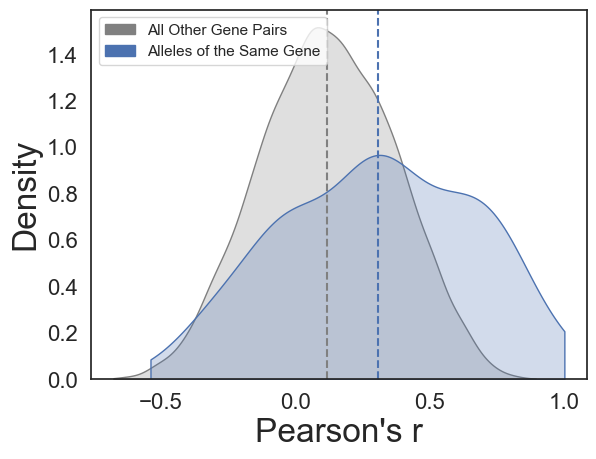

In [74]:
import matplotlib.patches as mpatches
sns.set_context('notebook')
# plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
fig, ax = plt.subplots()


sns.kdeplot(pairwisecorr[pairwisecorr.Type=="Other"]["r"], color= "grey",fill=True, cut=0, clip = (-1,1))
sns.kdeplot(pairwisecorr[pairwisecorr.Type=="Same Gene"]["r"],color = sns.color_palette()[0],fill=True, cut=0, clip = (-1,1))
plt.axvline(x=pairwisecorr[pairwisecorr.Type=="Other"]["r"].mean(), ls = "--", c="grey")
plt.axvline(x=pairwisecorr[pairwisecorr.Type=="Same Gene"]["r"].mean(), c = sns.color_palette()[0], ls="--")

first_patch = mpatches.Patch(color="grey", label='All Other Gene Pairs')
second_patch = mpatches.Patch(color=sns.color_palette()[0], label='Alleles of the Same Gene')
ax.legend(handles=[first_patch, second_patch], loc = 'upper left')

ax.set_ylabel('Density', fontsize = 24)
ax.set_xlabel("Pearson's r", fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('/Users/Joseph/Desktop/PD_TapScreen_Density_Gene_Allele_Pairs.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()


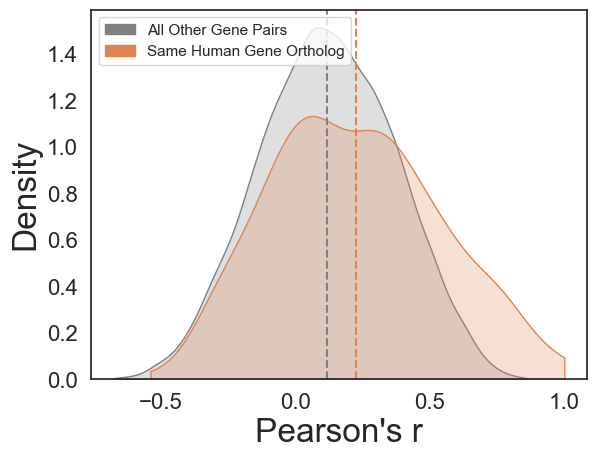

In [75]:
sns.set_context('notebook')
# plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
fig, ax = plt.subplots()


sns.kdeplot(pairwisecorr[pairwisecorr.HGene_Type=="Other"]["r"], fill=True, color = "grey", cut=0, clip = (-1,1))
sns.kdeplot(pairwisecorr[pairwisecorr.HGene_Type=="Same Human Gene"]["r"], fill=True, color = sns.color_palette()[1], cut=0, clip = (-1,1))
plt.axvline(x=pairwisecorr[pairwisecorr.HGene_Type=="Other"]["r"].mean(), ls = "--", c="grey")
plt.axvline(x=pairwisecorr[pairwisecorr.HGene_Type=="Same Human Gene"]["r"].mean(), c = sns.color_palette()[1], ls="--")


first_patch = mpatches.Patch(color="grey", label='All Other Gene Pairs')
second_patch = mpatches.Patch(color=sns.color_palette()[1], label='Same Human Gene Ortholog')
ax.legend(handles=[first_patch, second_patch], loc = 'upper left')

ax.set_ylabel('Density', fontsize = 24)
ax.set_xlabel("Pearson's r", fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('/Users/Joseph/Desktop/PD_TapScreen_Density_Gene_Worm_Human_Genes.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

### T-Stat Profile View

In [80]:
Tstat_gene_prep = Tstat_gene.copy().drop(columns = ['Interval Speed']).rename(columns={'Instantaneous Speed': 'Speed',"Habituation of Respones Probability":"Habituation of Response Probability"}).set_index("Screen").reset_index(drop=False)
Tstat_gene_prep

Screen      Gene  Morphwidth     Midline        Area       Speed  \
0    PD_Screen  C29E4.10  -48.494145  -34.970055  -65.781339   94.414318   
1    PD_Screen  F32D8.13   58.263752   21.351098   65.203746  -25.773717   
2    PD_Screen   F53B2.5  -22.601588  -34.779421  -60.745246  267.864906   
3    PD_Screen  F54B11.5  -62.484385  -82.167243 -113.043862   69.816290   
4    PD_Screen        N2    0.000000    0.000000    0.000000    0.000000   
..         ...       ...         ...         ...         ...         ...   
108  PD_Screen    unc-43 -101.850124 -234.169230 -210.555197   44.031732   
109  PD_Screen    unc-57 -166.412154 -472.028220 -511.547548 -167.244925   
110  PD_Screen    unc-59 -113.318379 -378.428538 -265.329697  -65.391543   
111  PD_Screen    unc-70   -8.909107 -576.943712 -344.383937  -89.421561   
112  PD_Screen    vps-35 -160.557702 -642.188620 -554.237138  -65.859407   

     Angular Speed        Bias  Aspect Ratio        Kink       Curve  \
0        84.836184  100.476655    -27.128295  -53.158767  -12.146881   
1       -33.570599   -0.264180     -1.467973  -13.252384  -42.385945   
2       179.260420  260.450831     67.135623   17.451373   27.355743   
3        61.647391   70.269514    -45.441001  -33.141812    5.114633   
4         0.000000    0.000000      0.000000    0.000000    0.000000   
..             ...         ...           ...         ...         ...   
108     182.856892   21.936045     76.216716   41.753969  -31.303114   
109      65.189587  -36.332082     56.701590   -1.610046 -139.623152   
110      46.464973    6.282208    234.742202  214.750231   75.478143   
111     177.586605  -55.103890    488.440475  469.279867  203.583337   
112      65.614759   55.961052    109.012196   73.818767 -289.121670   

           Crab  Pathlength  Initial Response Duration  \
0     87.357196   75.832322                  -0.968976   
1    -45.526762 -110.534882                   1.257409   
2     34.055161  -17.935056                   2.229089   
3     71.698845   14.011904                  -0.557627   
4      0.000000    0.000000                   0.000000   
..          ...         ...                        ...   
108  116.520529 -131.163306                  -2.589631   
109    7.865439 -212.394918                 -10.464760   
110   19.670436  -98.916164                  -4.652906   
111  147.876770 -364.527042                  -0.433631   
112   19.600156   36.985438                   4.717133   

     Initial Response Probability  Initial Response Speed  \
0                       -3.009073                1.167611   
1                       -1.193088               -1.385297   
2                        0.969676                3.818974   
3                       -3.448225                1.181341   
4                        0.000000                0.000000   
..                            ...                     ...   
108                     -3.645216               -3.124088   
109                     -8.852316              -11.430301   
110                     -7.507512               -6.287133   
111                    -14.449969              -11.484568   
112                     -1.919111               -6.094706   

     Final Response Duration  Final Response Probability  \
0                  -4.139938                   -2.363608   
1                   0.395951                   -2.453282   
2                   2.824103                   -0.645377   
3                  -0.190604                   -5.584485   
4                   0.000000                    0.000000   
..                       ...                         ...   
108                -4.926801                    3.261316   
109                -0.007792                   -5.191875   
110                -0.270224                   -5.543775   
111                 2.020561                   -8.198756   
112                -0.353385                    3.273666   

     Final Response Speed  Habituation of Response Duration  \
0               

In [90]:
Tstat_gene_orthology=pd.merge(Tstat_gene_prep,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

Tstat_gene_orthology=Tstat_gene_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
# print(Tstat_gene_orthology)
# print("-"*50)
print(Tstat_gene_orthology[Tstat_gene_orthology['Gene'].isna()]['Worm Gene'].unique())

[]


In [91]:
Tstat_gene_orthology= Tstat_gene_orthology.drop(columns=['Worm Gene','Human Gene','Category']).set_index(['Gene','Screen'])
Tstat_gene_orthology

Morphwidth     Midline        Area       Speed  \
Gene            Screen                                                      
GALC•C29E4.10   PD_Screen  -48.494145  -34.970055  -65.781339   94.414318   
PMVK•F32D8.13   PD_Screen   58.263752   21.351098   65.203746  -25.773717   
KPNA1•F53B2.5   PD_Screen  -22.601588  -34.779421  -60.745246  267.864906   
RNF141•F54B11.5 PD_Screen  -62.484385  -82.167243 -113.043862   69.816290   
WT•N2           PD_Screen    0.000000    0.000000    0.000000    0.000000   
...                               ...         ...         ...         ...   
CAMK2D•unc-43   PD_Screen -101.850124 -234.169230 -210.555197   44.031732   
SH3GL2•unc-57   PD_Screen -166.412154 -472.028220 -511.547548 -167.244925   
SEPTIN4•unc-59  PD_Screen -113.318379 -378.428538 -265.329697  -65.391543   
SPTBN1•unc-70   PD_Screen   -8.909107 -576.943712 -344.383937  -89.421561   
VPS35•vps-35    PD_Screen -160.557702 -642.188620 -554.237138  -65.859407   

                           Angular Speed        Bias  Aspect Ratio  \
Gene            Screen                                               
GALC•C29E4.10   PD_Screen      84.836184  100.476655    -27.128295   
PMVK•F32D8.13   PD_Screen     -33.570599   -0.264180     -1.467973   
KPNA1•F53B2.5   PD_Screen     179.260420  260.450831     67.135623   
RNF141•F54B11.5 PD_Screen      61.647391   70.269514    -45.441001   
WT•N2           PD_Screen       0.000000    0.000000      0.000000   
...                                  ...         ...           ...   
CAMK2D•unc-43   PD_Screen     182.856892   21.936045     76.216716   
SH3GL2•unc-57   PD_Screen      65.189587  -36.332082     56.701590   
SEPTIN4•unc-59  PD_Screen      46.464973    6.282208    234.742202   
SPTBN1•unc-70   PD_Screen     177.586605  -55.103890    488.440475   
VPS35•vps-35    PD_Screen      65.614759   55.961052    109.012196   

                                 Kink       Curve        Crab  Pathlength  \
Gene            Screen                                                      
GALC•C29E4.10   PD_Screen  -53.158767  -12.146881   87.357196   75.832322   
PMVK•F32D8.13   PD_Screen  -13.252384  -42.385945  -45.526762 -110.534882   
KPNA1•F53B2.5   PD_Screen   17.451373   27.355743   34.055161  -17.935056   
RNF141•F54B11.5 PD_Screen  -33.141812    5.114633   71.698845   14.011904   
WT•N2           PD_Screen    0.000000    0.000000    0.000000    0.000000   
...                               ...         ...         ...         ...   
CAMK2D•unc-43   PD_Screen   41.753969  -31.303114  116.520529 -131.163306   
SH3GL2•unc-57   PD_Screen   -1.610046 -139.623152    7.865439 -212.394918   
SEPTIN4•unc-59  PD_Screen  214.750231   75.478143   19.670436  -98.916164   
SPTBN1•unc-70   PD_Screen  469.279867  203.583337  147.876770 -364.527042   
VPS35•vps-35    PD_Screen   73.818767 -289.121670   19.600156   36.985438   

                           Initial Response Duration  \
Gene            Screen                                 
GALC•C29E4.10   PD_Screen                  -0.968976   
PMVK•F32D8.13   PD_Screen                   1.257409   
KPNA1•F53B2.5   PD_Screen                   2.229089   
RNF141•F54B11.5 PD_Screen                  -0.557627   
WT•N2           PD_Screen                   0.000000   
...                                              ...   
CAMK2D•unc-43   PD_Screen                  -2.589631   
SH3GL2•unc-57   PD_Screen                 -10.464760   
SEPTIN4•unc-59  PD_Screen                  -4.652906   
SPTBN1•unc-70   PD_Screen                  -0.433631   
VPS35•vps-35    PD_Screen                   4.717133   

                           Initial Response Probability  \
Gene            Screen                                    
GALC•C29E4.10   PD_Screen                     -3.009073   
PMVK•F32D8.13   PD_Screen                     -1.193088   
KPNA1•F53B2.5   PD_Screen                      0.969676   
RNF141•F54B11.5 PD_Screen                     -3.448225   
WT•N2           PD_Screen    

In [110]:
Tstat_gene_orthology_standardize = (Tstat_gene_orthology - Tstat_gene_orthology.mean())/Tstat_gene_orthology.std()
# print(Tstat_gene_orthology_standardize)

Tstat_gene_orthology_standardize = Tstat_gene_orthology_standardize - Tstat_gene_orthology_standardize.loc["WT•N2"].squeeze()

Tstat_gene_orthology_standardize = Tstat_gene_orthology_standardize.reset_index(drop=False)

Tstat_gene_orthology_standardize.columns

Index(['Gene', 'Screen', 'Morphwidth', 'Midline', 'Area', 'Speed',
       'Angular Speed', 'Bias', 'Aspect Ratio', 'Kink', 'Curve', 'Crab',
       'Pathlength', 'Initial Response Duration',
       'Initial Response Probability', 'Initial Response Speed',
       'Final Response Duration', 'Final Response Probability',
       'Final Response Speed', 'Habituation of Response Duration',
       'Habituation of Response Probability', 'Habituation of Response Speed',
       'Spontaneous Recovery of Response Duration',
       'Spontaneous Recovery of Response Probability',
       'Spontaneous Recovery of Response Speed',
       'Memory Retention of Response Duration',
       'Memory Retention of Response Probability',
       'Memory Retention of Response Speed', 'Initial PSA Instantaneous Speed',
       'Final PSA Instantaneous Speed', 'Recovery PSA Instantaneous Speed',
       'Peak PSA Instantaneous Speed',
       'Peak Tap Number PSA Instantaneous Speed',
       'Average PSA Instantaneous S

In [112]:
Tstat_gene_orthology_standardize = Tstat_gene_orthology_standardize[['Gene', 'Screen', 'Morphwidth', 'Midline', 'Area', 'Speed',
    'Angular Speed', 'Bias', 'Aspect Ratio', 'Kink', 'Curve', 'Crab',
    'Pathlength', 'Initial Response Duration',
    'Initial Response Probability', 'Initial Response Speed',
    'Initial PSA Instantaneous Speed', 'Initial PSA Bias', 'Initial PSA Angular Speed',
    'Initial PSA Aspect Ratio', 'Initial PSA Kink', 'Initial PSA Curve',
    'Initial PSA Crab', 
    'Final Response Duration', 'Final Response Probability',
    'Final Response Speed', 'Final PSA Instantaneous Speed', 'Final PSA Bias',
    'Final PSA Angular Speed', 'Final PSA Aspect Ratio', 'Final PSA Kink',
    'Final PSA Curve', 'Final PSA Crab',
    'Peak PSA Instantaneous Speed', 'Peak PSA Bias', 'Peak PSA Angular Speed',
    'Peak PSA Aspect Ratio', 'Peak PSA Kink', 'Peak PSA Curve', 'Peak PSA Crab',
    'Peak Tap Number PSA Instantaneous Speed', 'Peak Tap Number PSA Bias', 
    'Peak Tap Number PSA Angular Speed', 'Peak Tap Number PSA Aspect Ratio',
    'Peak Tap Number PSA Kink', 'Peak Tap Number PSA Curve', 'Peak Tap Number PSA Crab',
    'Average PSA Instantaneous Speed', 'Average PSA Bias', 'Average PSA Angular Speed',
    'Average PSA Aspect Ratio', 'Average PSA Kink', 'Average PSA Curve', 
    'Average PSA Crab', 
    'Habituation of Response Duration',
    'Habituation of Response Probability', 'Habituation of Response Speed',
    'Habituation PSA Instantaneous Speed', 'Habituation PSA Bias', 
    'Habituation PSA Angular Speed', 'Habituation PSA Aspect Ratio',
    'Habituation PSA Kink', 'Habituation PSA Curve', 'Habituation PSA Crab',
    'Spontaneous Recovery of Response Duration',
    'Spontaneous Recovery of Response Probability',
    'Spontaneous Recovery of Response Speed',    'Spontaneous Recovery PSA Instantaneous Speed', 'Spontaneous Recovery PSA Bias',
    'Spontaneous Recovery PSA Angular Speed', 'Spontaneous Recovery PSA Aspect Ratio',
    'Spontaneous Recovery PSA Kink', 'Spontaneous Recovery PSA Curve', 'Spontaneous Recovery PSA Crab',
    'Memory Retention of Response Duration',
    'Memory Retention of Response Probability',
    'Memory Retention of Response Speed', 'Memory Retention PSA Instantaneous Speed', 'Memory Retention PSA Bias', 
    'Memory Retention PSA Angular Speed', 'Memory Retention PSA Aspect Ratio',
    'Memory Retention PSA Kink', 'Memory Retention PSA Curve', 'Memory Retention PSA Crab',
    'Sensitization PSA Instantaneous Speed', 'Sensitization PSA Bias', 
    'Sensitization PSA Angular Speed', 'Sensitization PSA Aspect Ratio',
    'Sensitization PSA Kink', 'Sensitization PSA Curve', 'Sensitization PSA Crab',
    ]]

In [113]:
gene_profile_data=pd.melt(Tstat_gene_orthology_standardize, id_vars=["Gene", "Screen"],
                                var_name='Metric',
                                value_name='Normalized T_score')
gene_profile_data

Gene     Screen                  Metric  Normalized T_score
0        GALC•C29E4.10  PD_Screen              Morphwidth           -0.638811
1        PMVK•F32D8.13  PD_Screen              Morphwidth            0.767505
2        KPNA1•F53B2.5  PD_Screen              Morphwidth           -0.297730
3      RNF141•F54B11.5  PD_Screen              Morphwidth           -0.823104
4                WT•N2  PD_Screen              Morphwidth            0.000000
...                ...        ...                     ...                 ...
10230    CAMK2D•unc-43  PD_Screen  Sensitization PSA Crab           -0.176902
10231    SH3GL2•unc-57  PD_Screen  Sensitization PSA Crab           -0.819947
10232   SEPTIN4•unc-59  PD_Screen  Sensitization PSA Crab           -0.627712
10233    SPTBN1•unc-70  PD_Screen  Sensitization PSA Crab           -0.293977
10234     VPS35•vps-35  PD_Screen  Sensitization PSA Crab           -1.353919

[10235 rows x 4 columns]

In [118]:
metric_palette=["k","k","k",
                "darkgray","darkgray","darkgray","darkgray","darkgray","darkgray","darkgray","darkgray",
                "lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue",
                "powderblue","powderblue","powderblue","powderblue","powderblue","powderblue","powderblue","powderblue","powderblue","powderblue",
                "orange","orange","orange","orange","orange","orange","orange",
                "darkorange","darkorange","darkorange","darkorange","darkorange","darkorange","darkorange",
                "goldenrod","goldenrod","goldenrod","goldenrod","goldenrod","goldenrod","goldenrod",
                "cadetblue","cadetblue","cadetblue","cadetblue","cadetblue","cadetblue","cadetblue","cadetblue","cadetblue","cadetblue",
                "thistle","thistle","thistle","thistle","thistle","thistle","thistle","thistle","thistle","thistle",
                "slateblue","slateblue","slateblue","slateblue","slateblue","slateblue","slateblue","slateblue","slateblue","slateblue",
                "lightcoral","lightcoral","lightcoral","lightcoral","lightcoral","lightcoral","lightcoral",
                ]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_16582/633577693.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = gene_profile_data[gene_profile_data.Gene==f"{x}"],
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_16582/633577693.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = gene_profile_data[gene_profile_data.Gene==f"{x}"],
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_16582/633577693.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = gene_profile_data[gene_pr

done


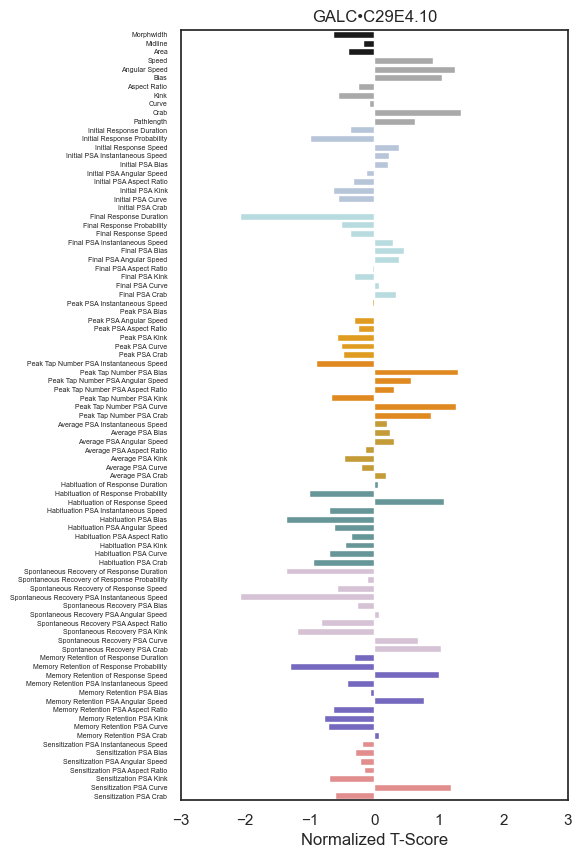

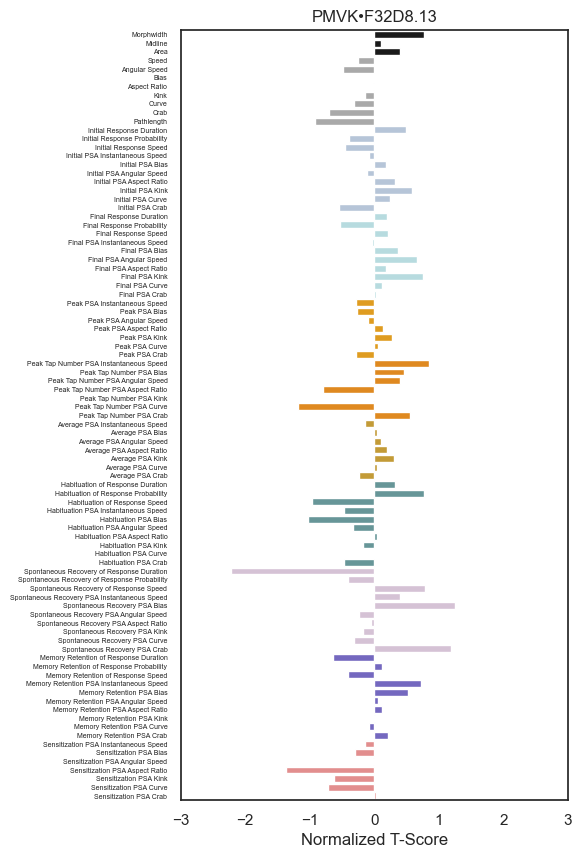

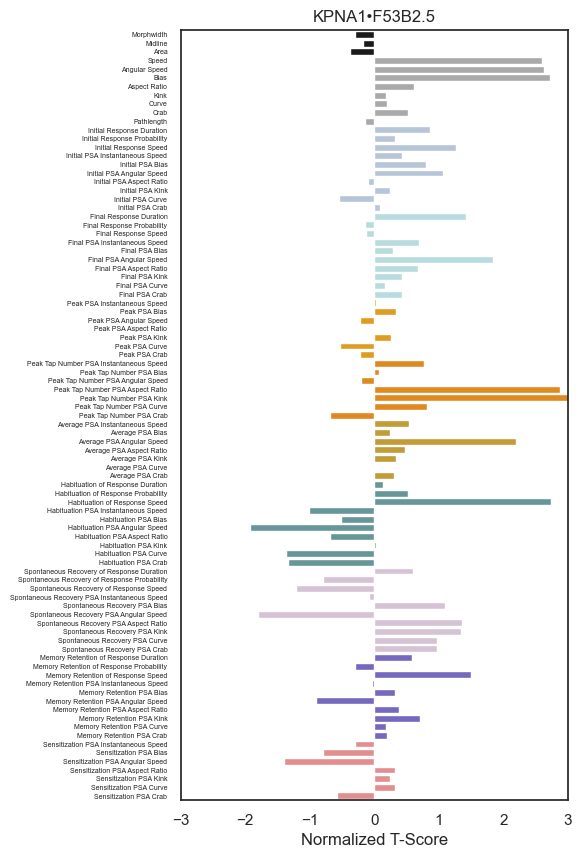

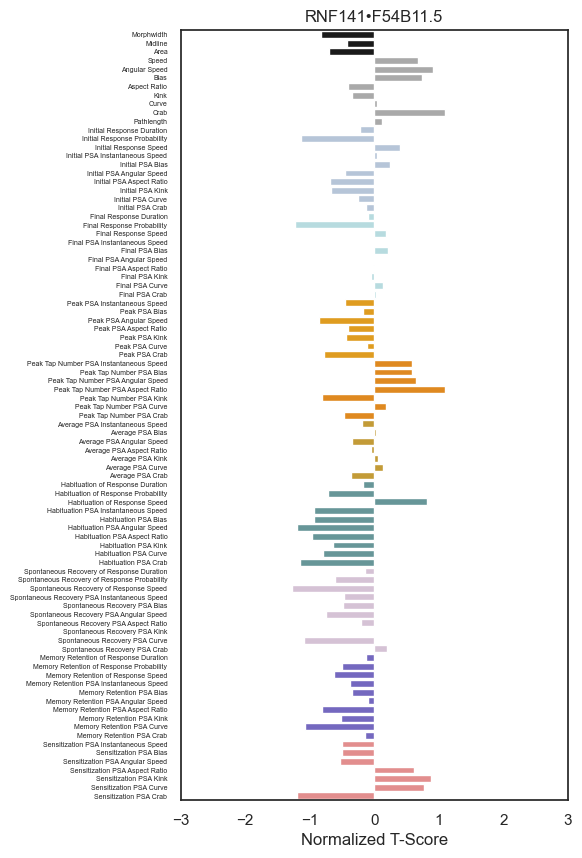

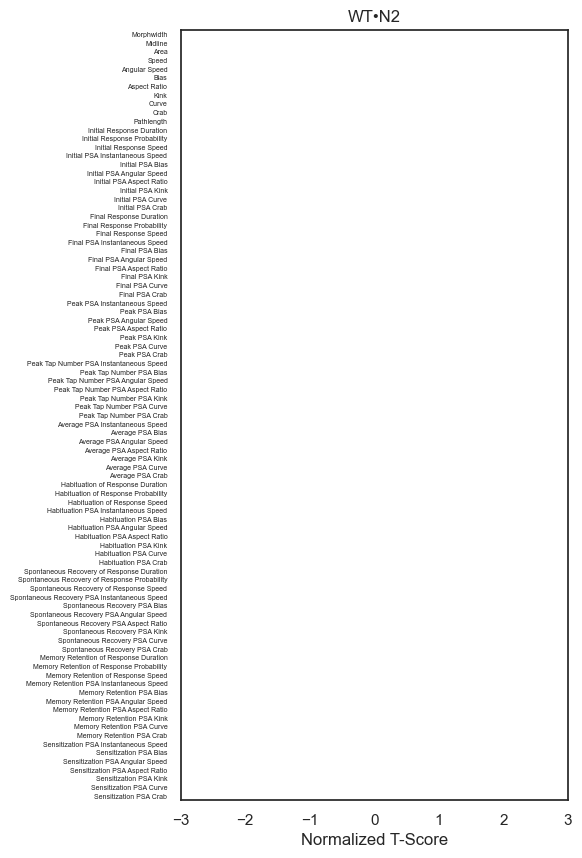

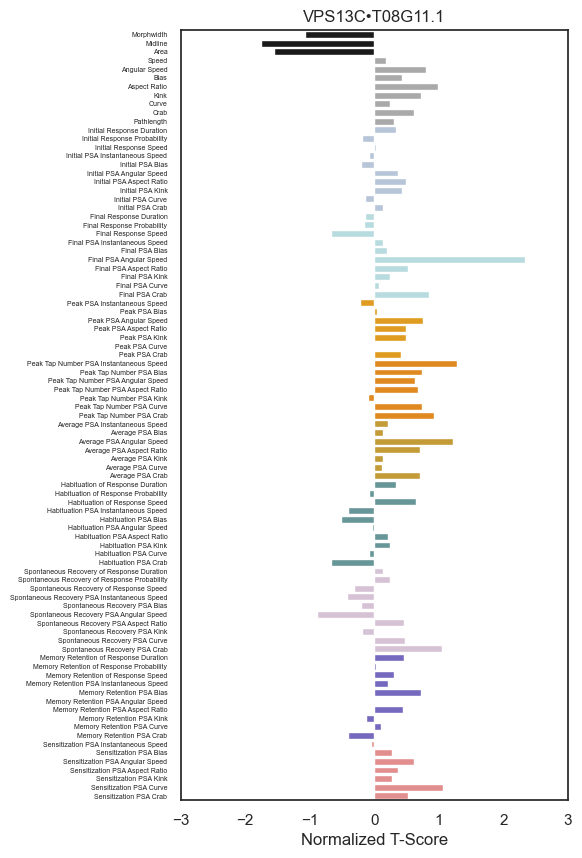

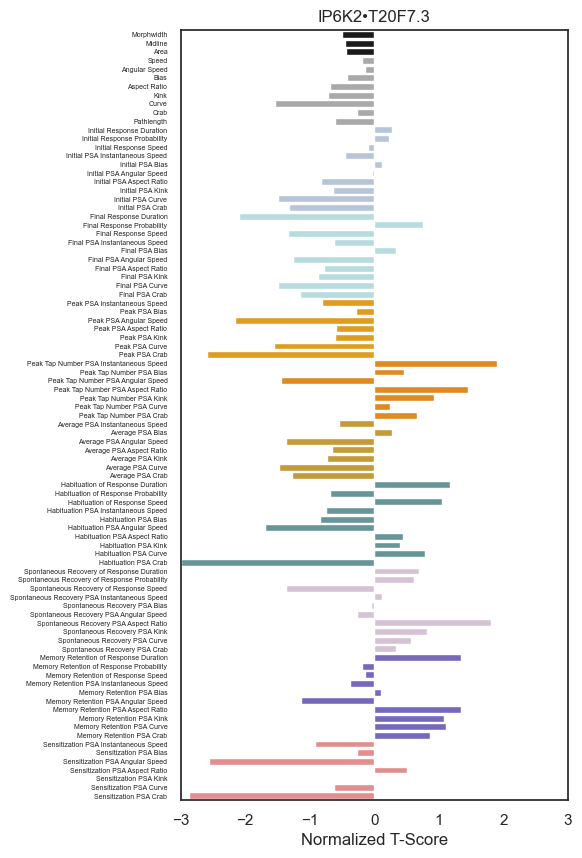

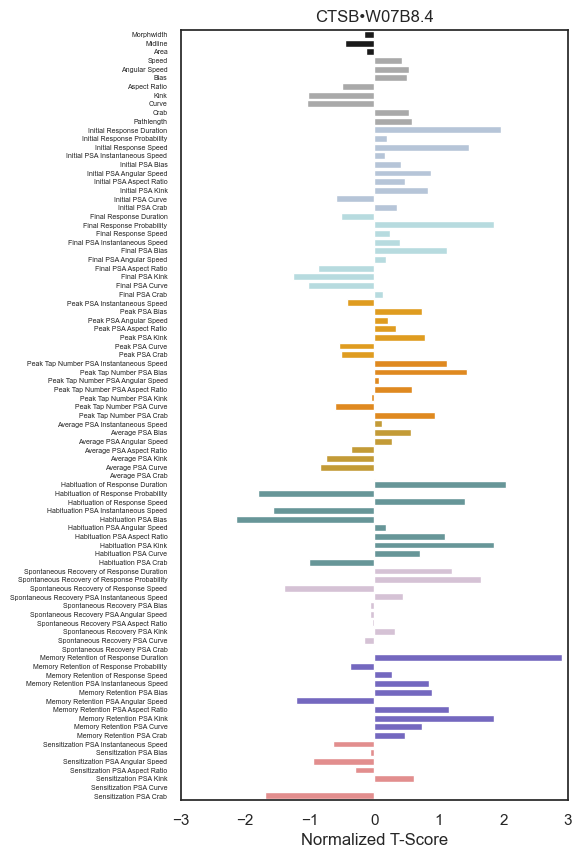

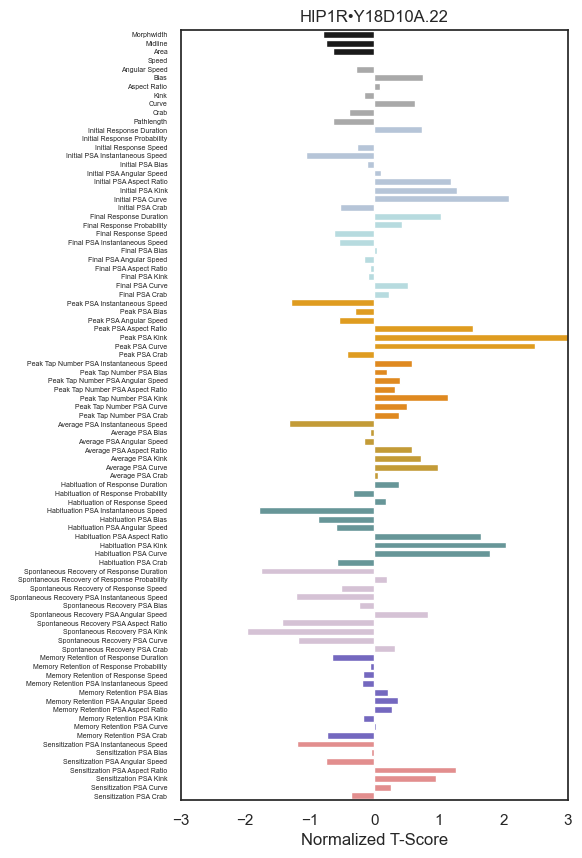

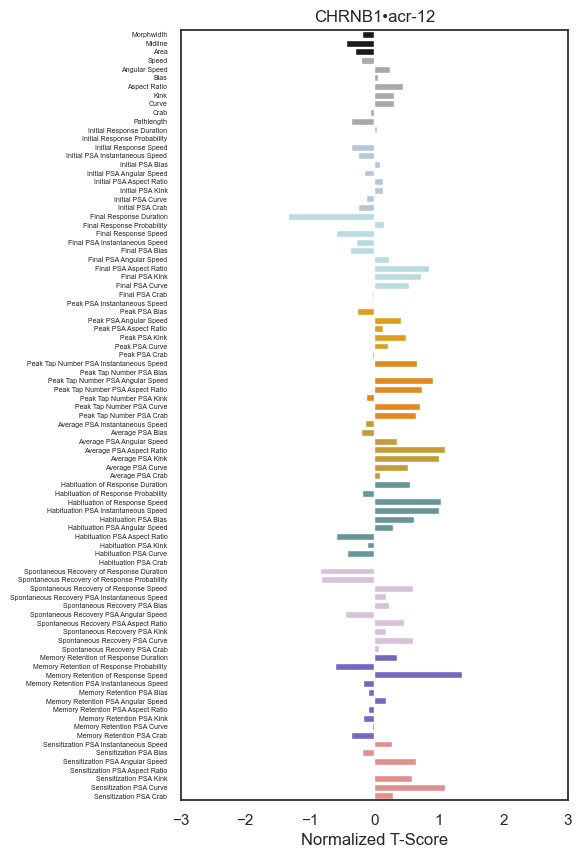

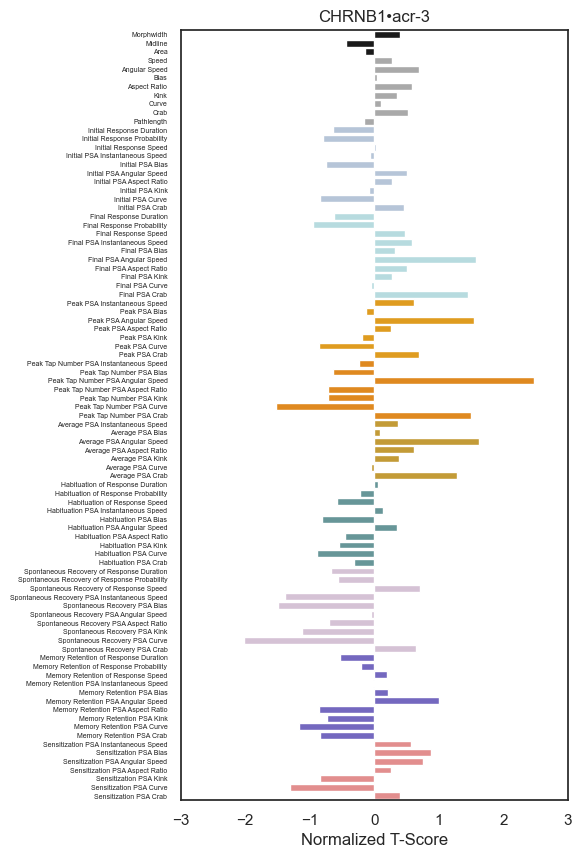

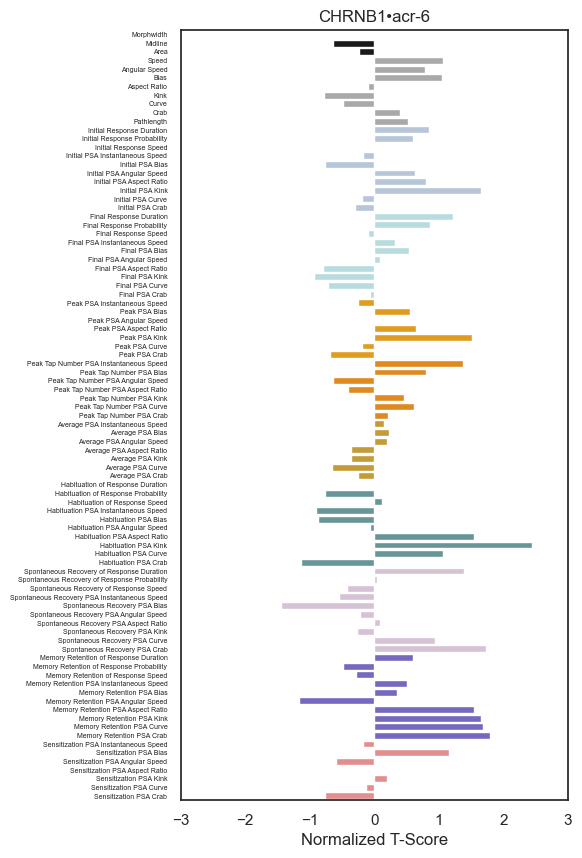

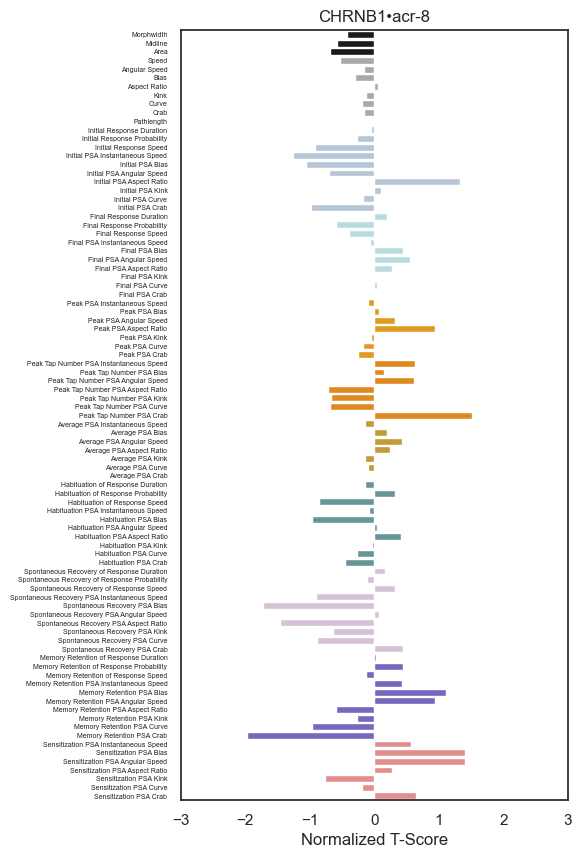

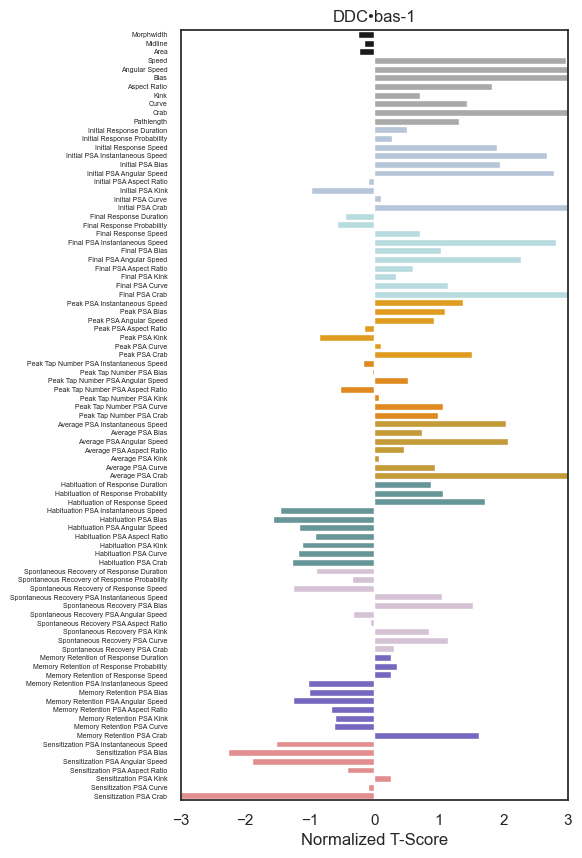

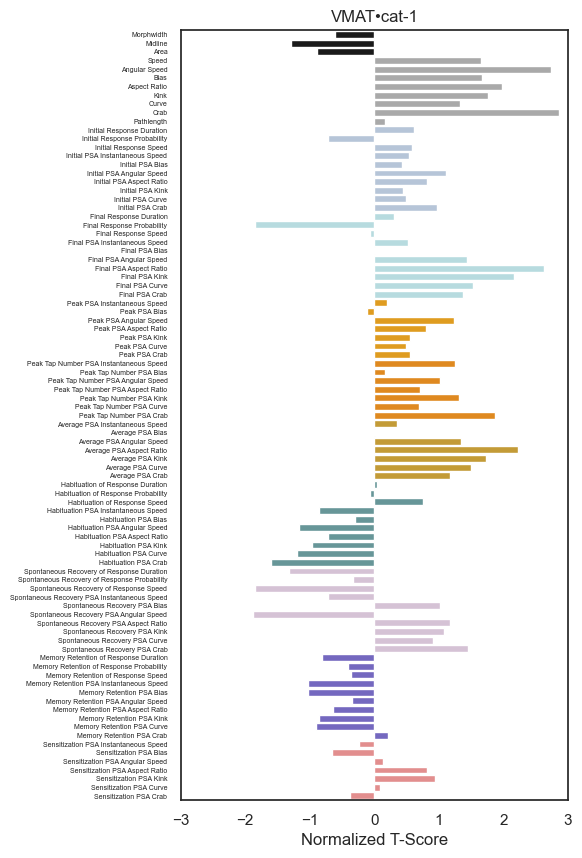

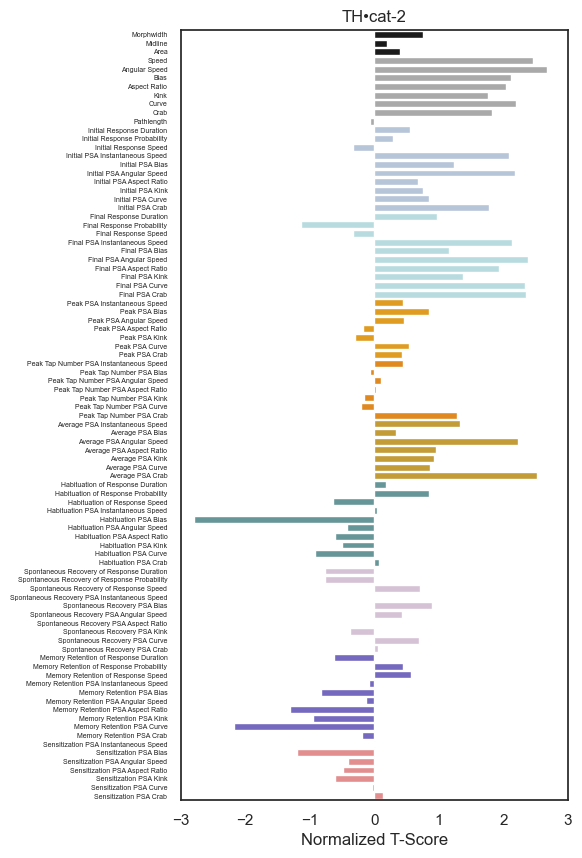

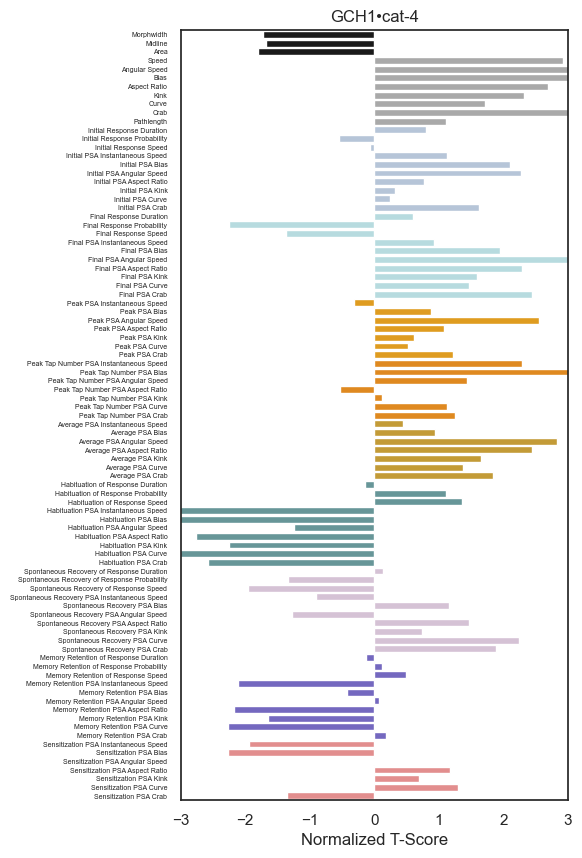

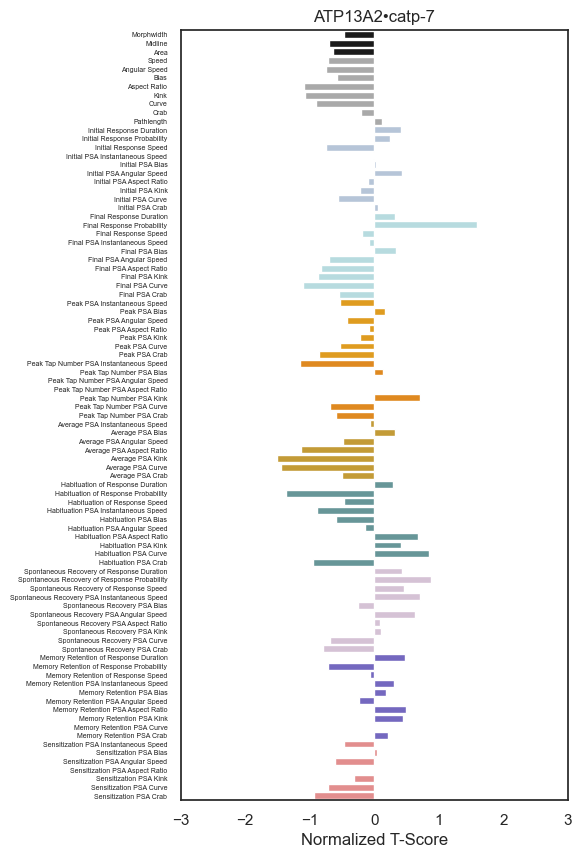

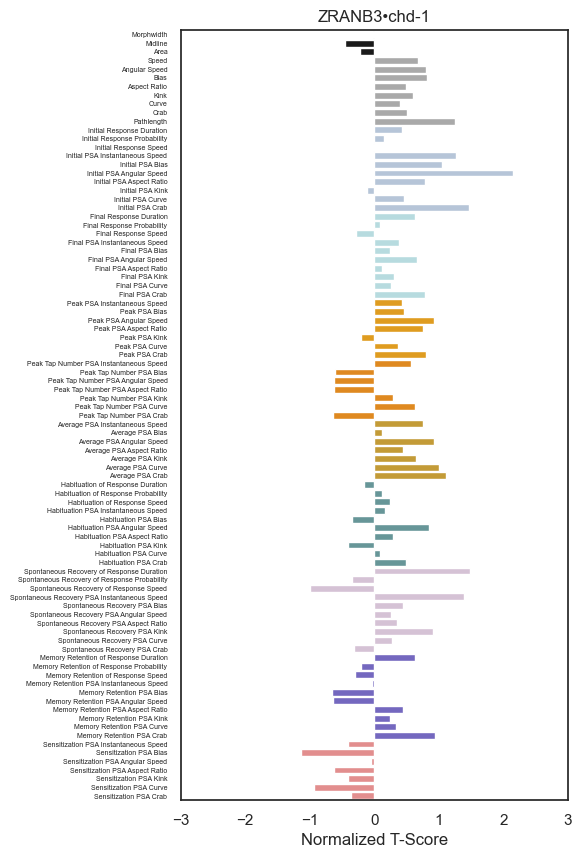

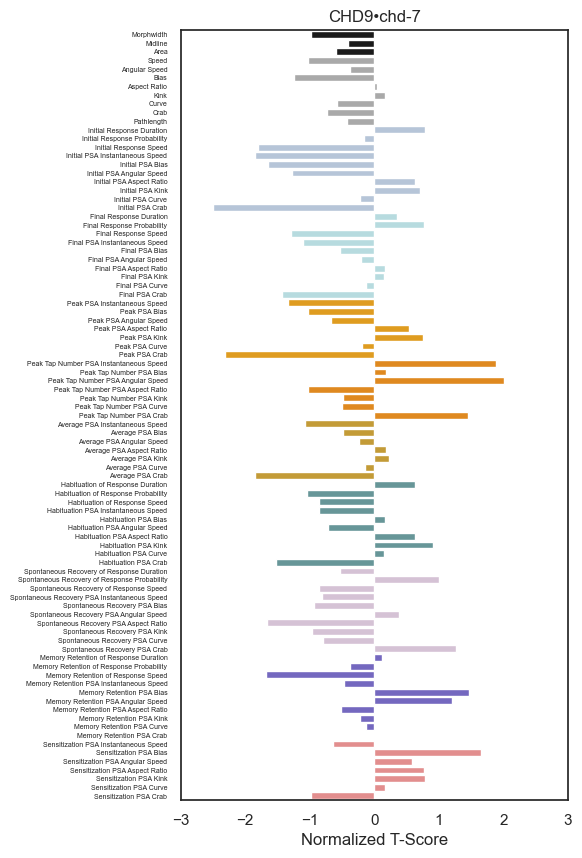

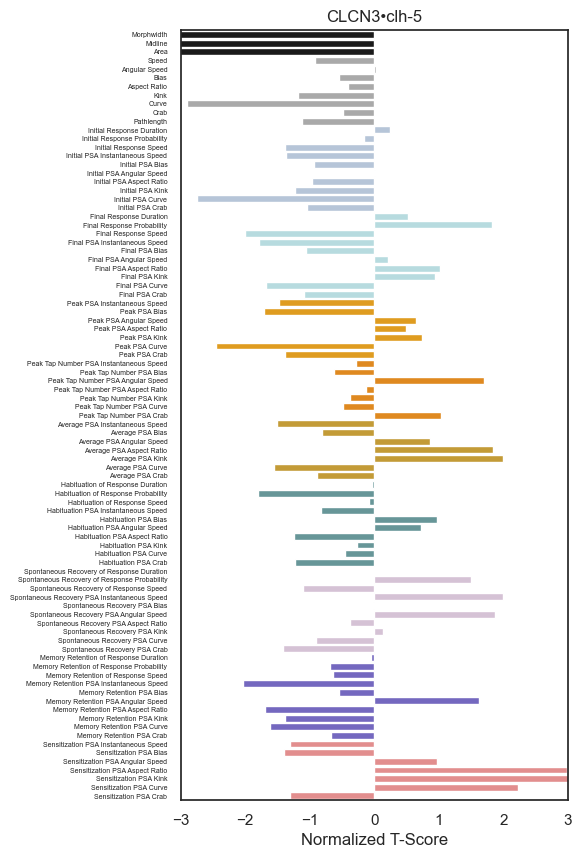

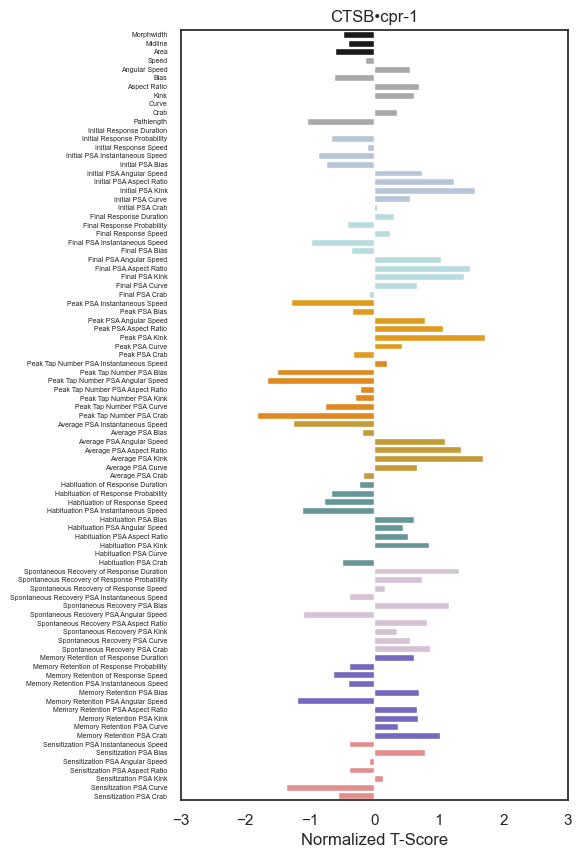

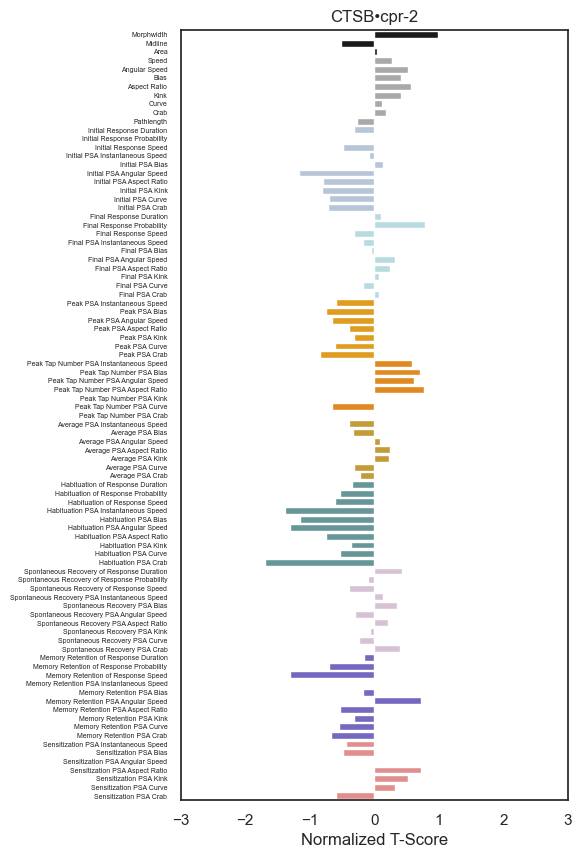

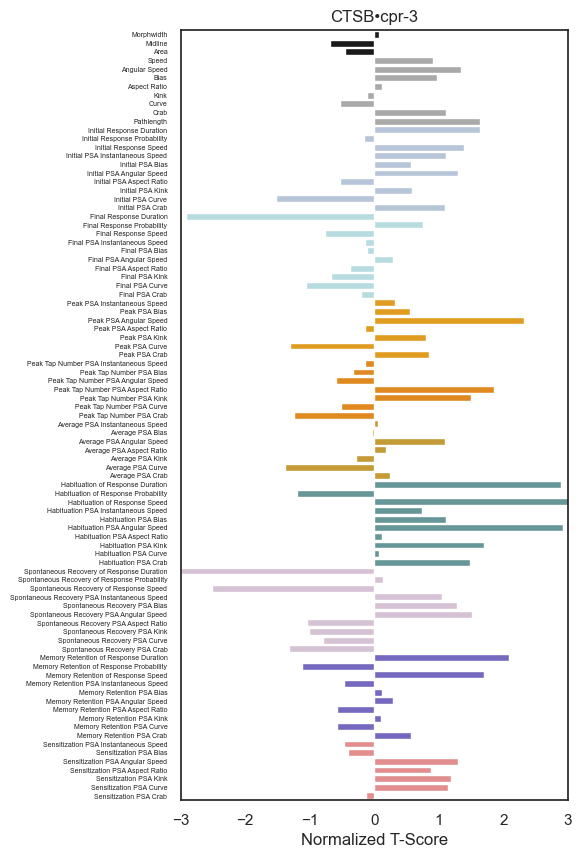

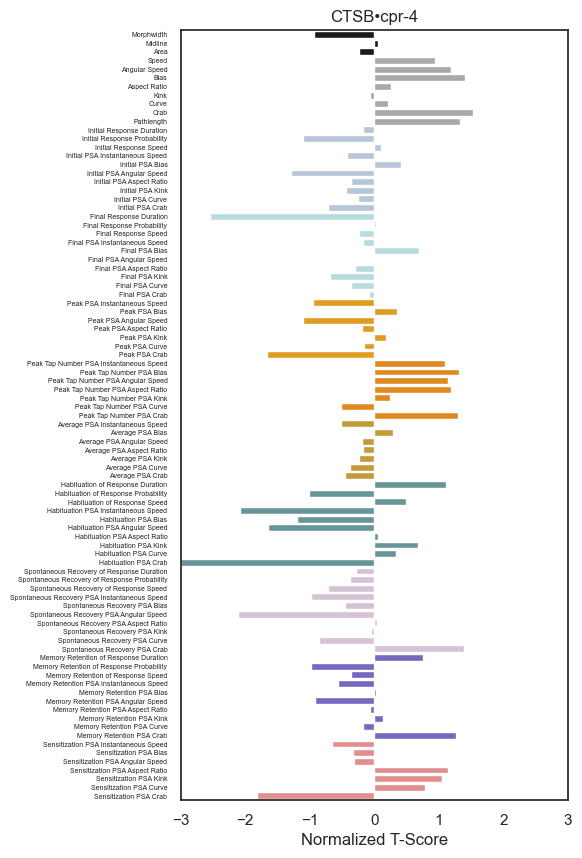

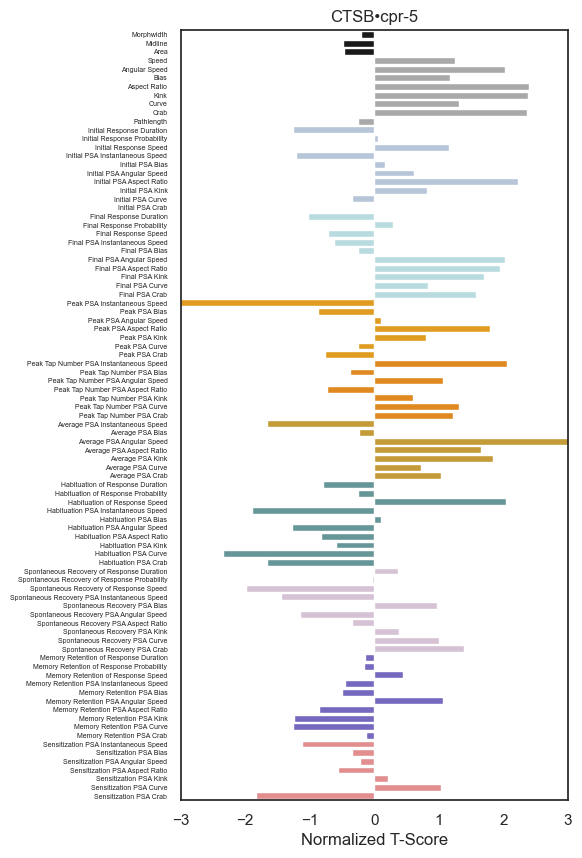

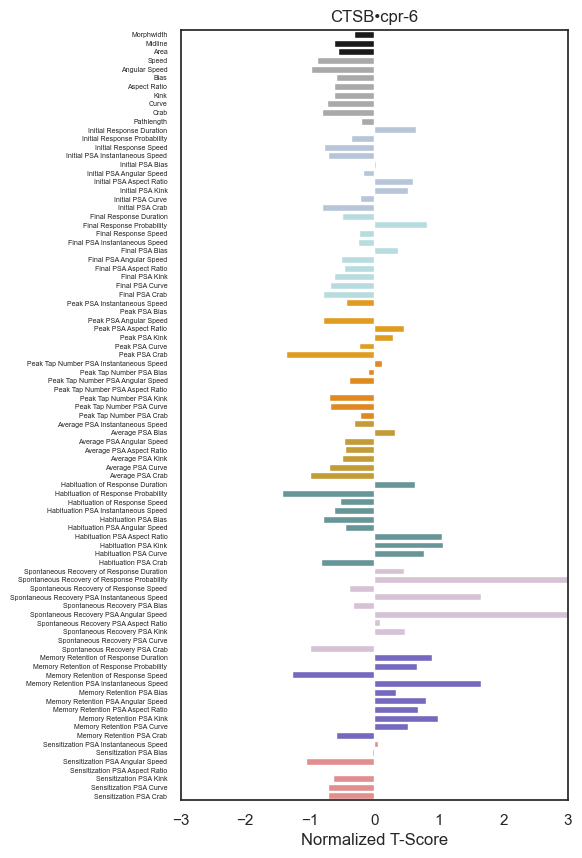

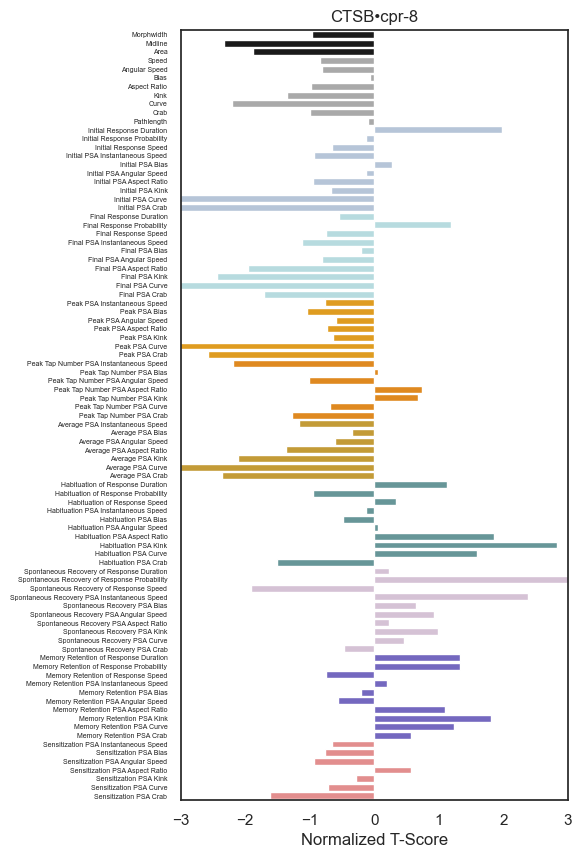

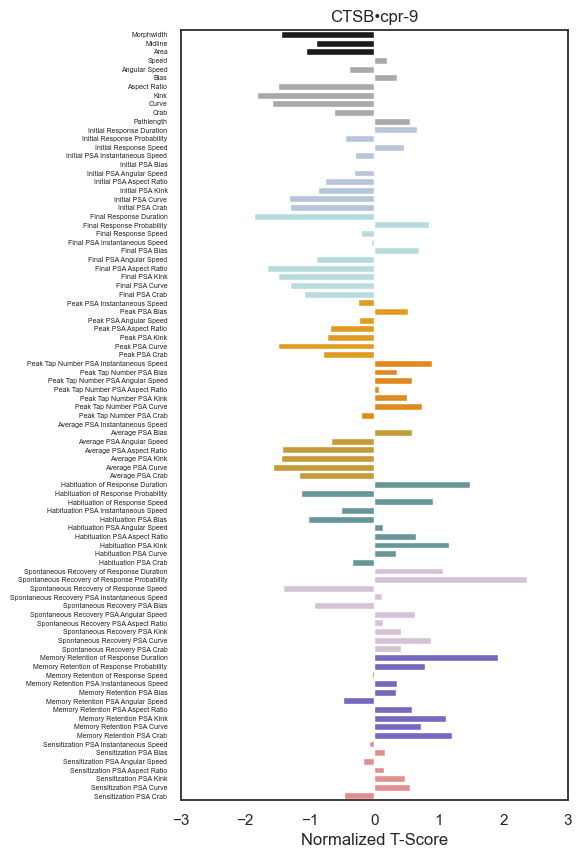

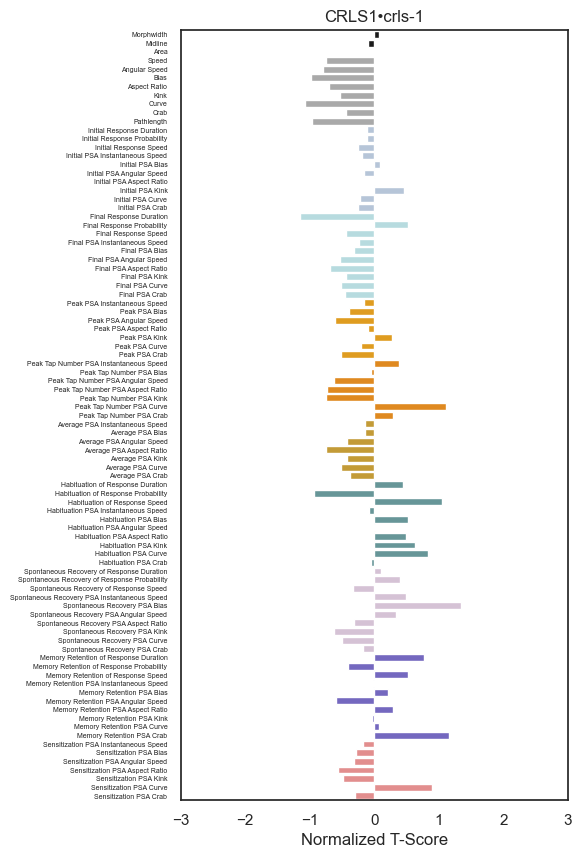

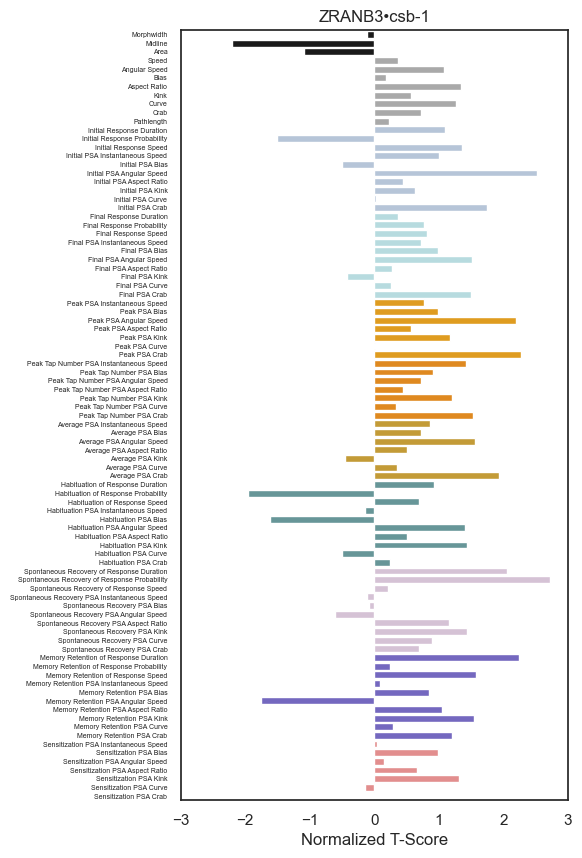

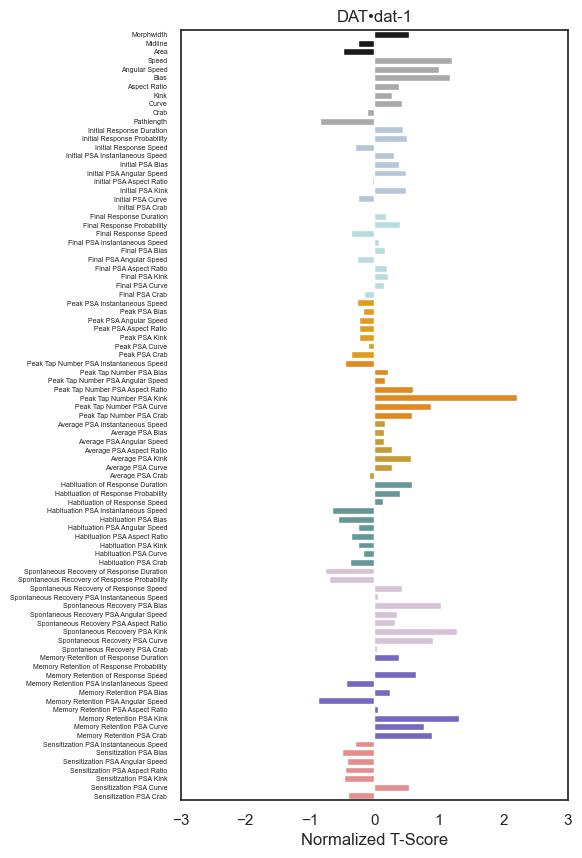

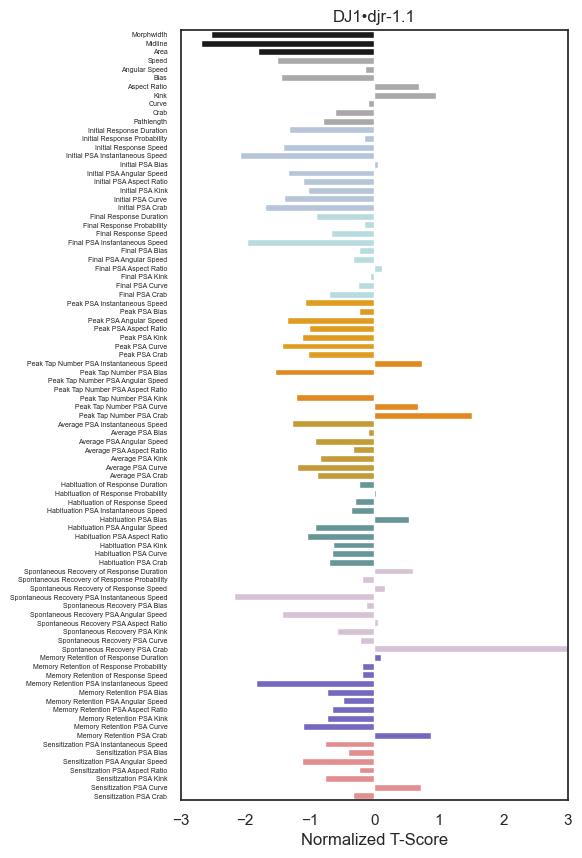

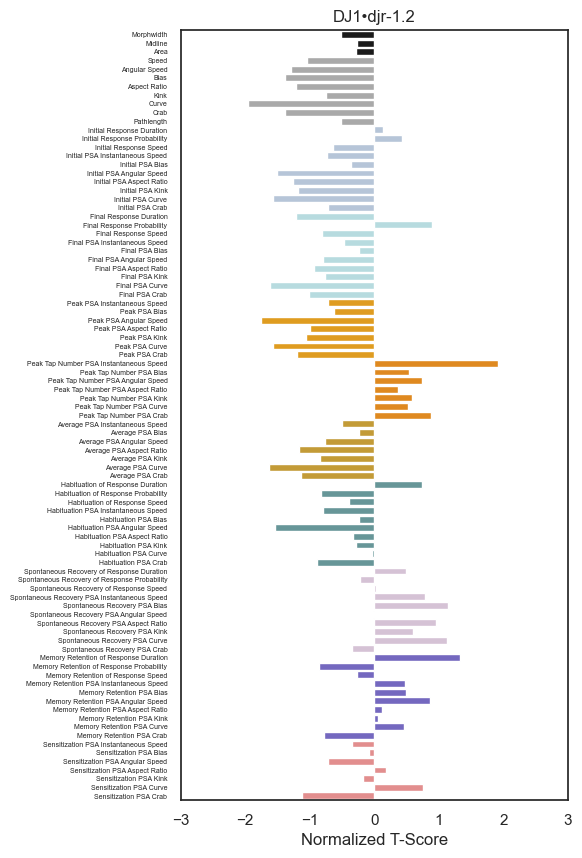

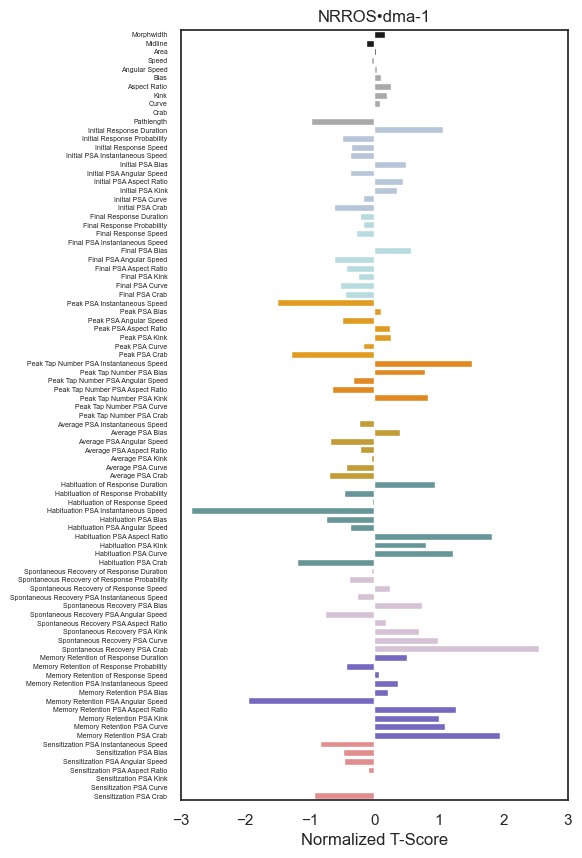

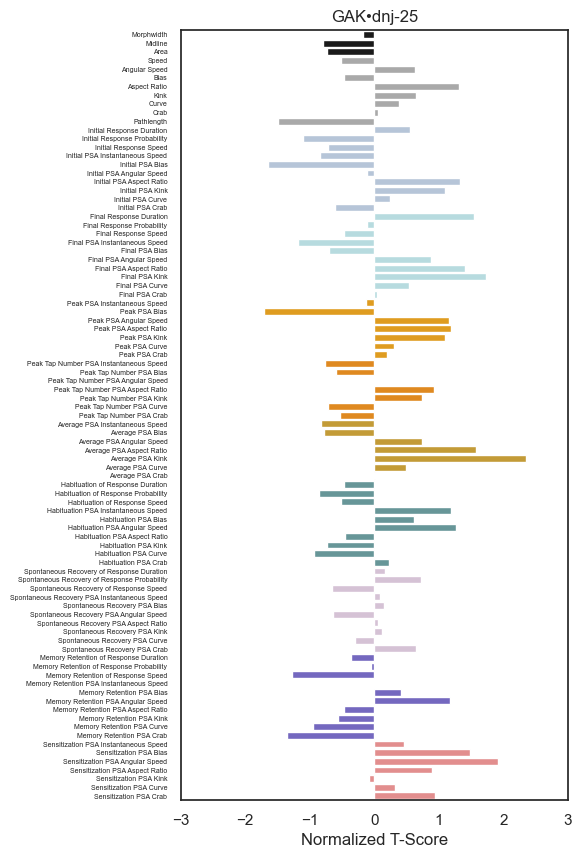

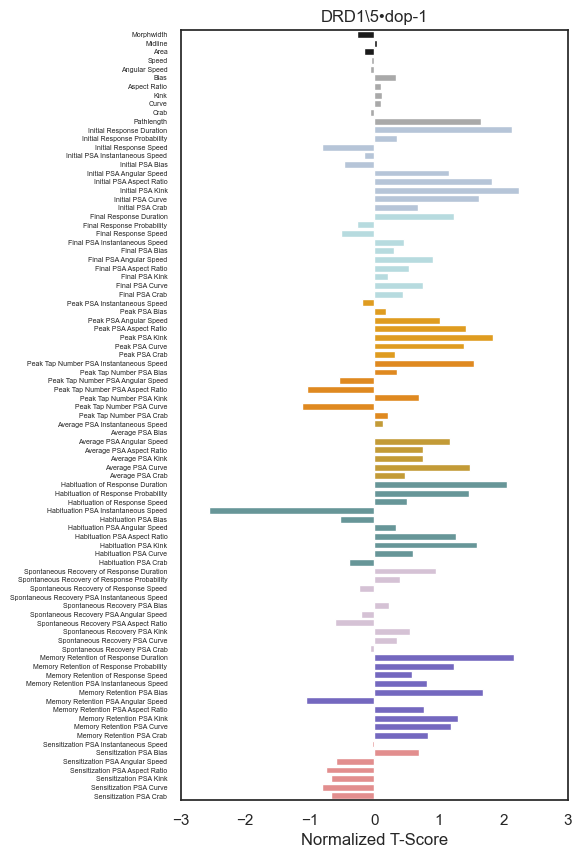

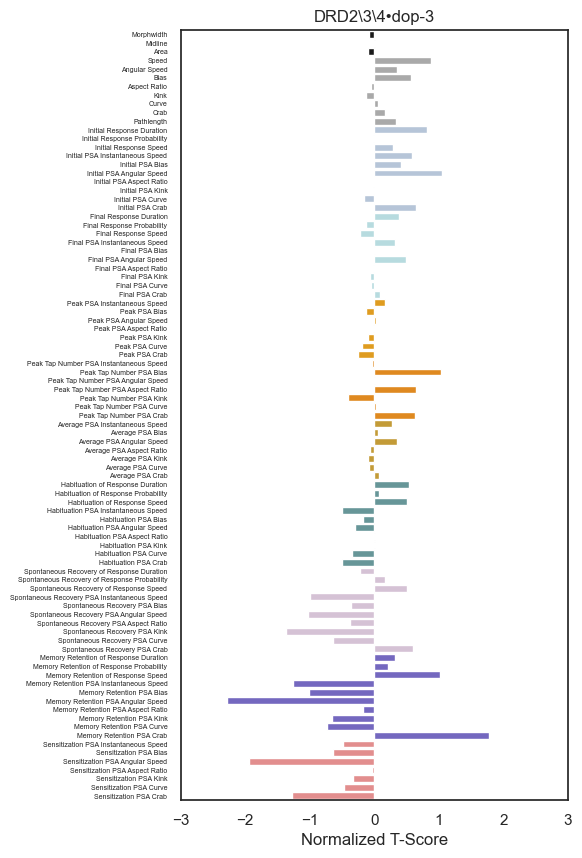

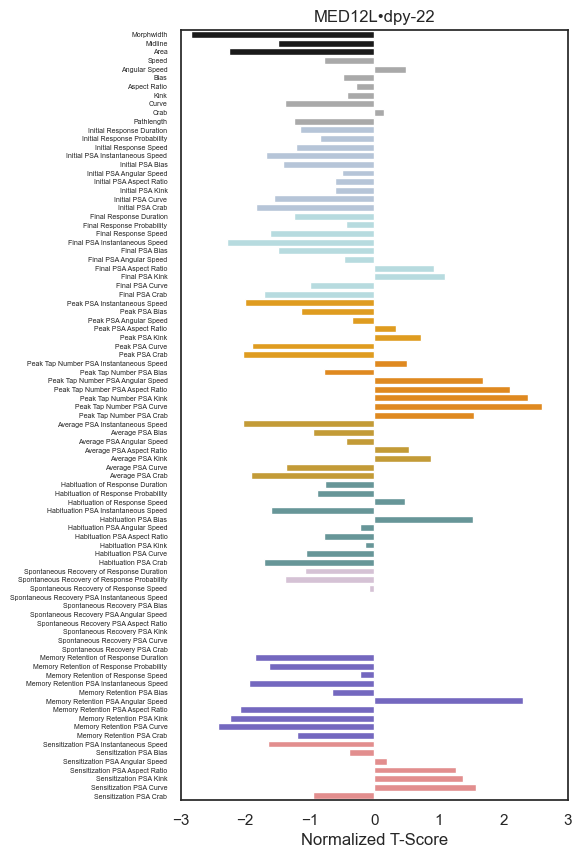

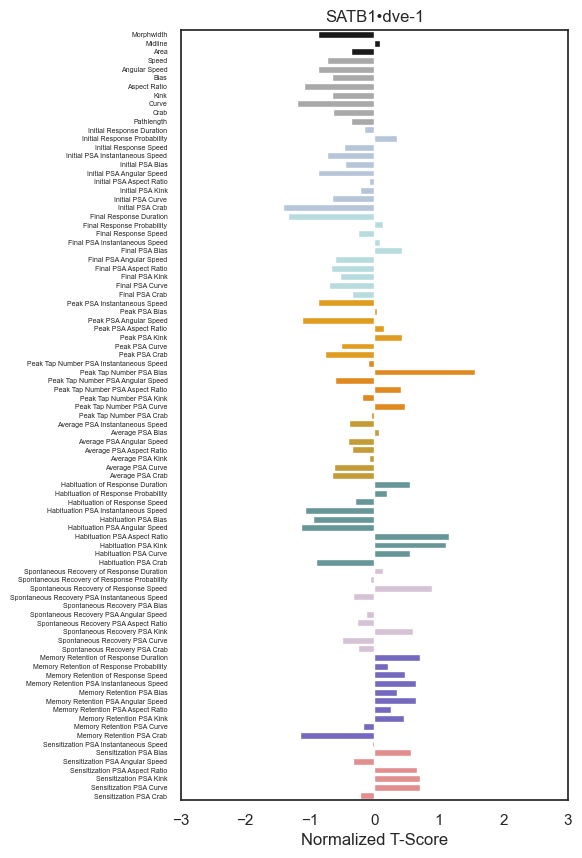

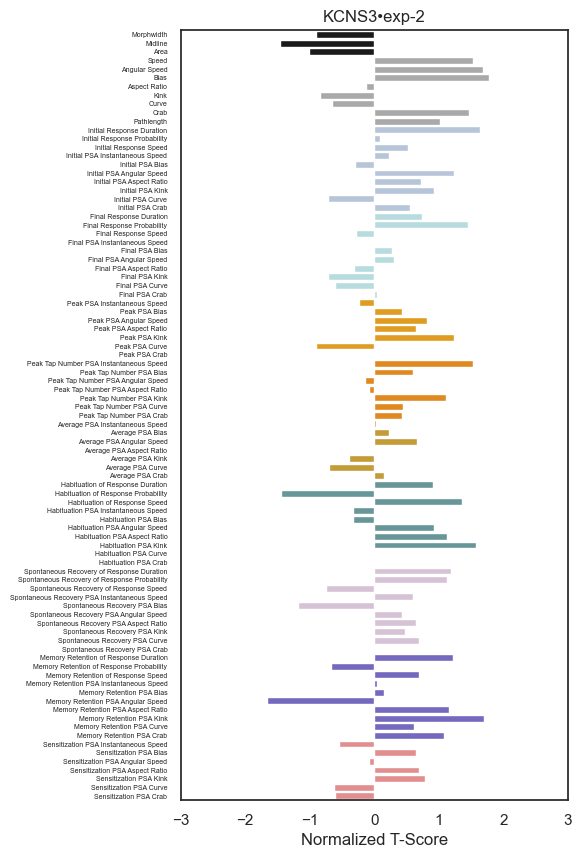

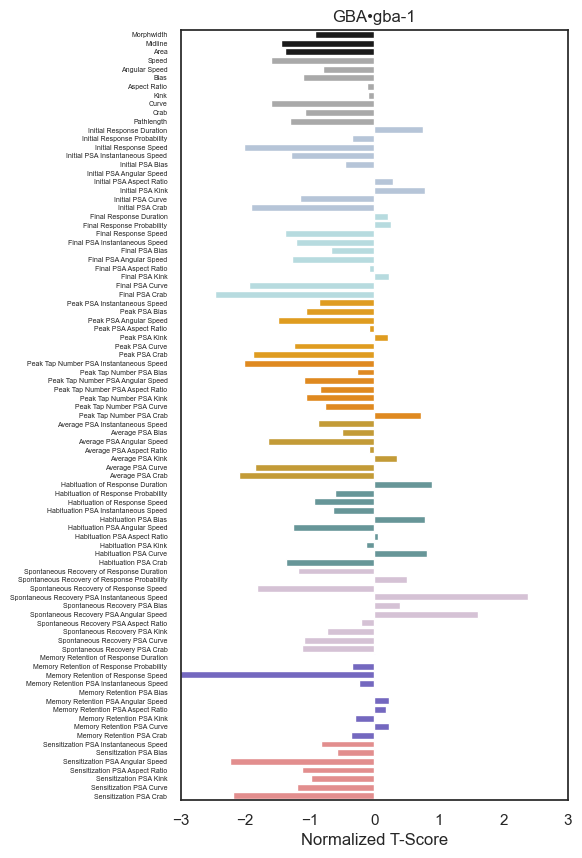

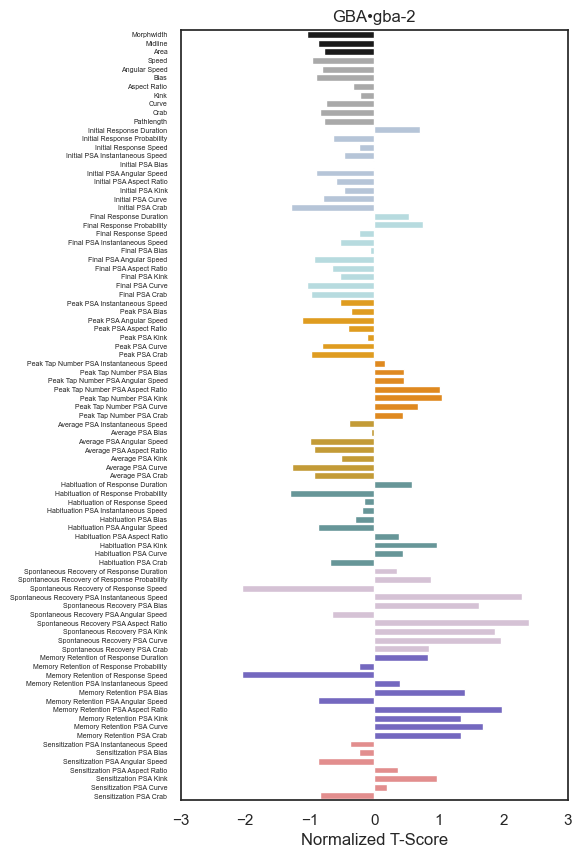

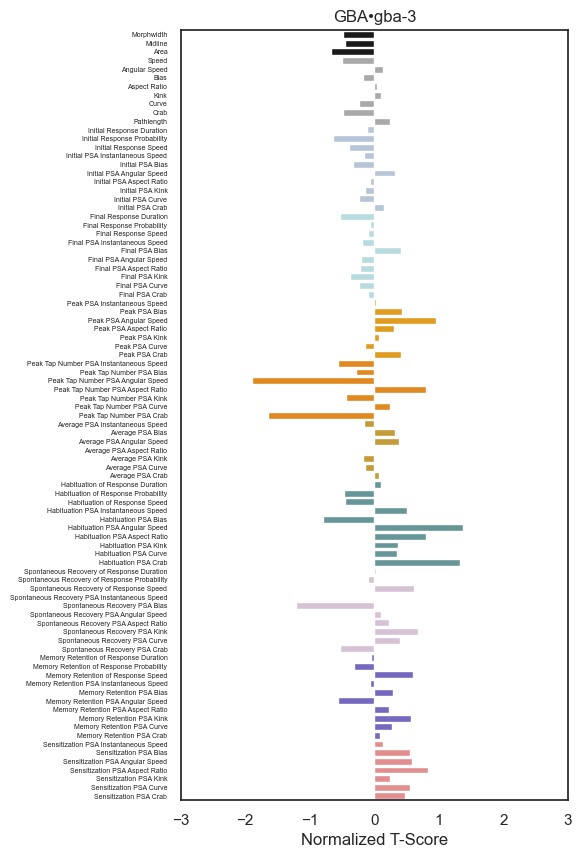

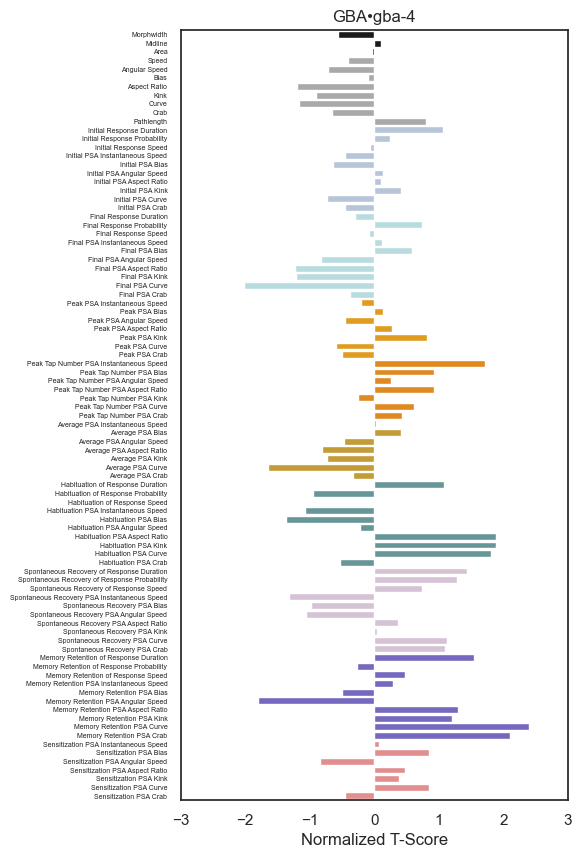

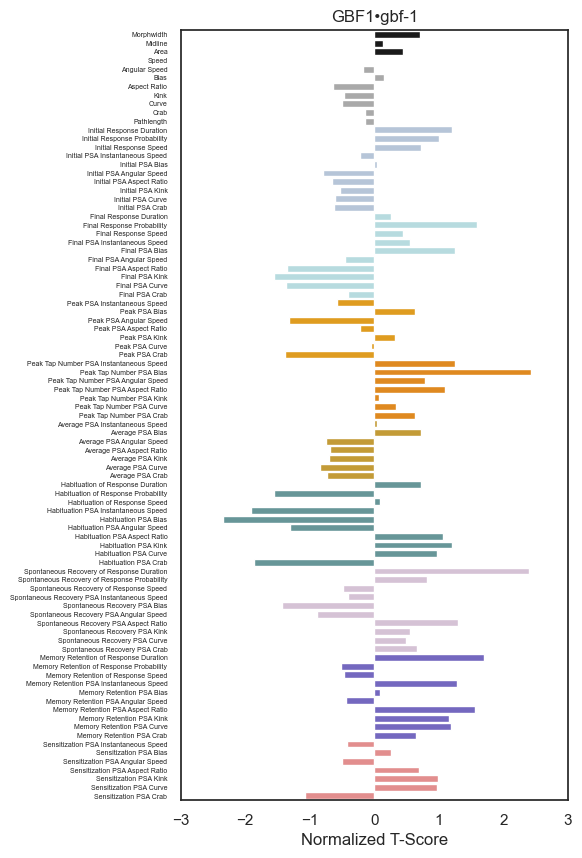

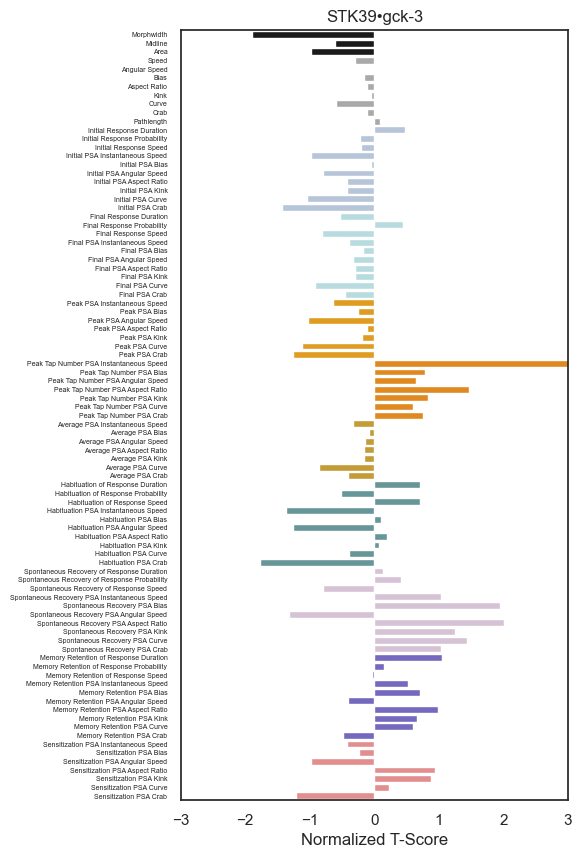

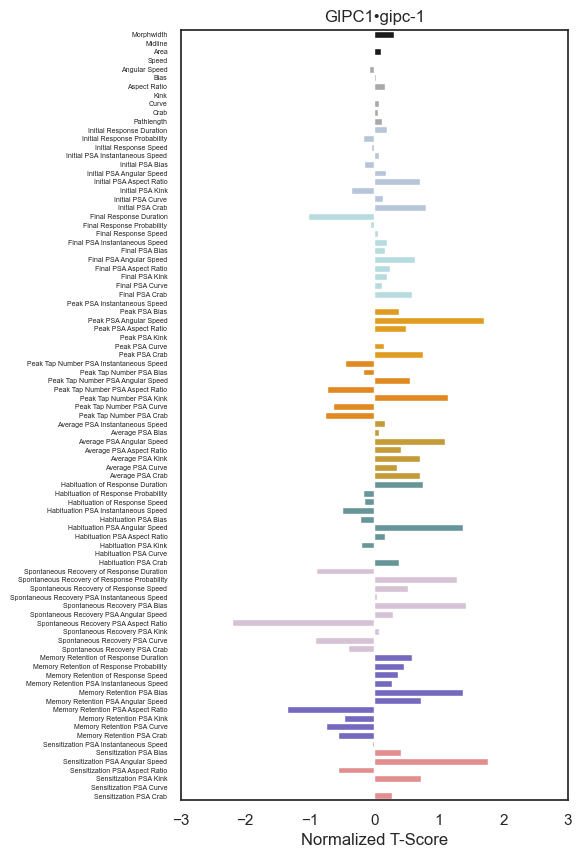

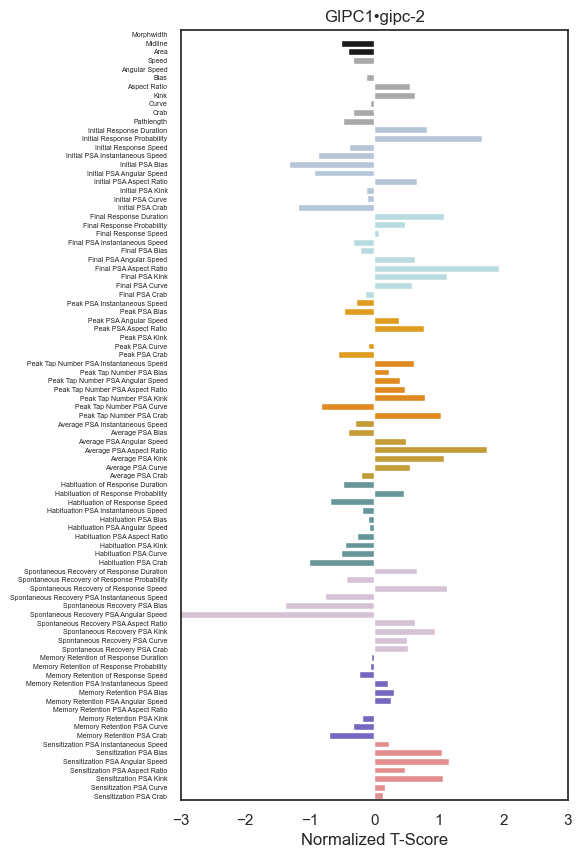

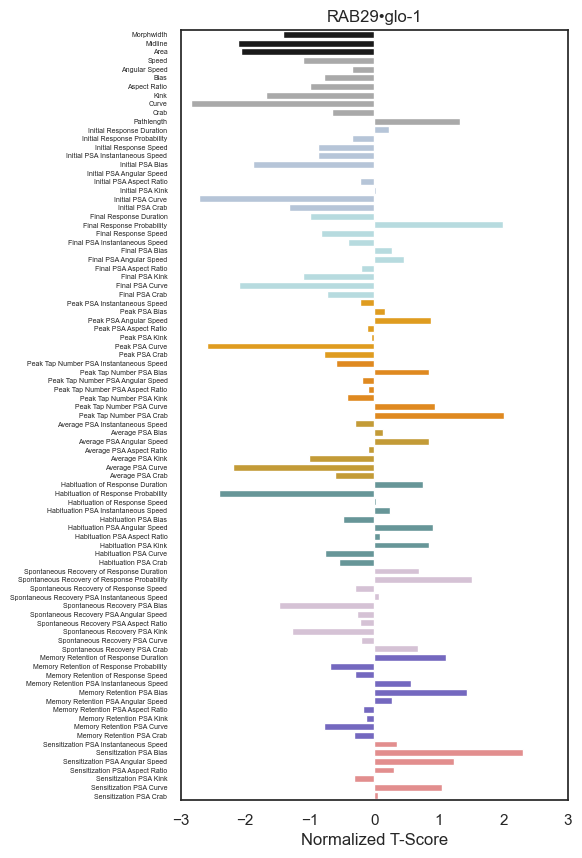

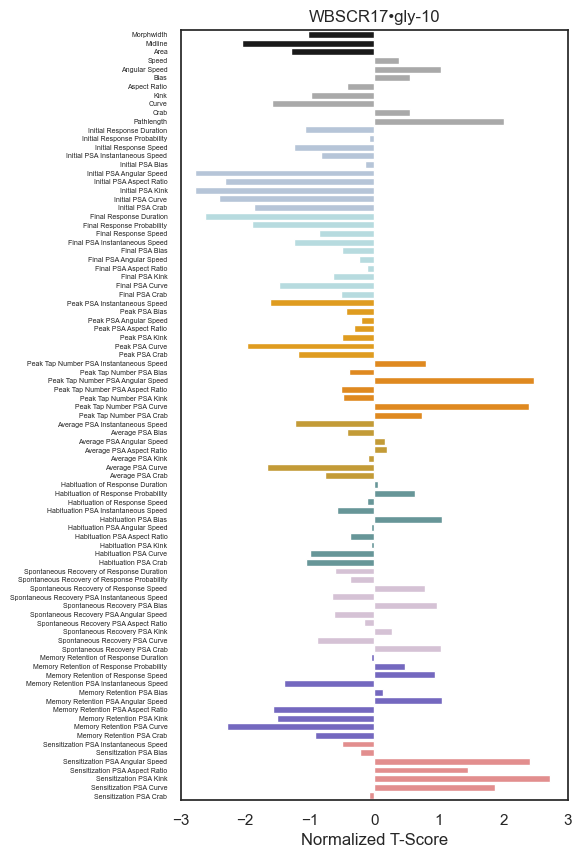

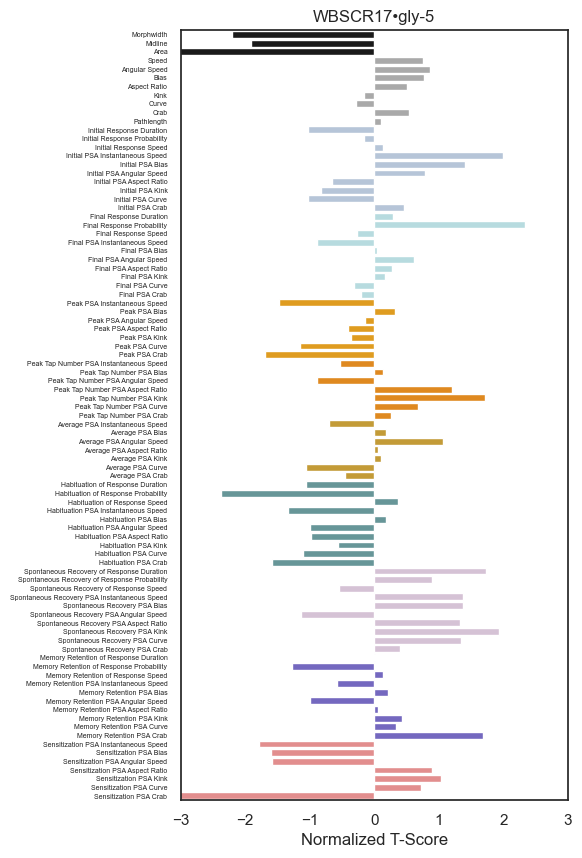

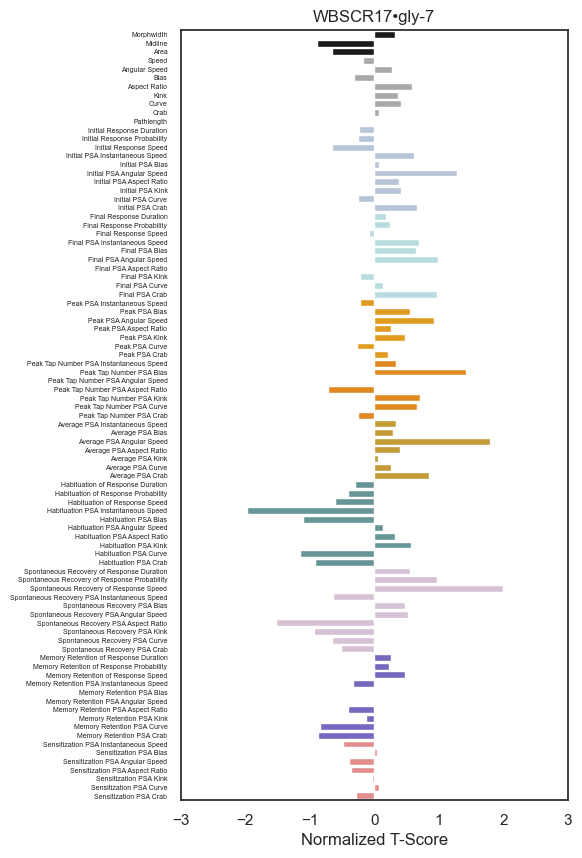

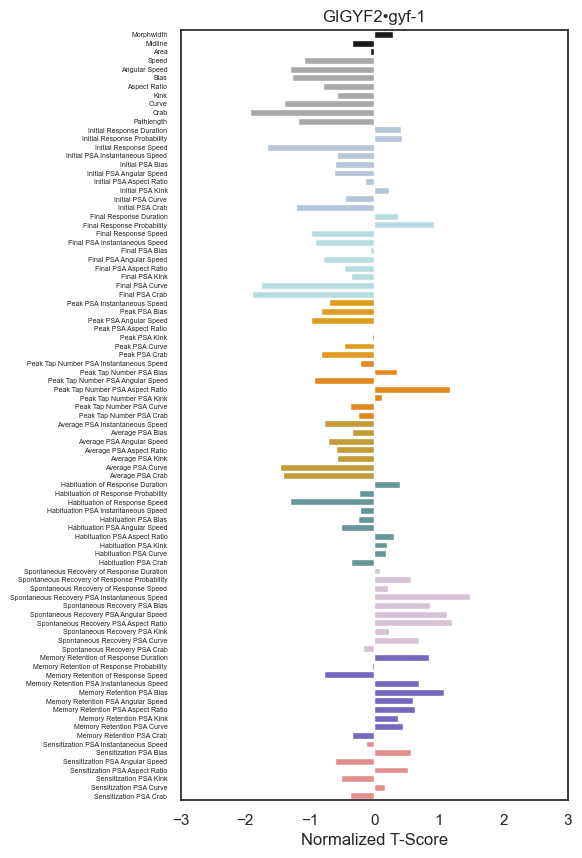

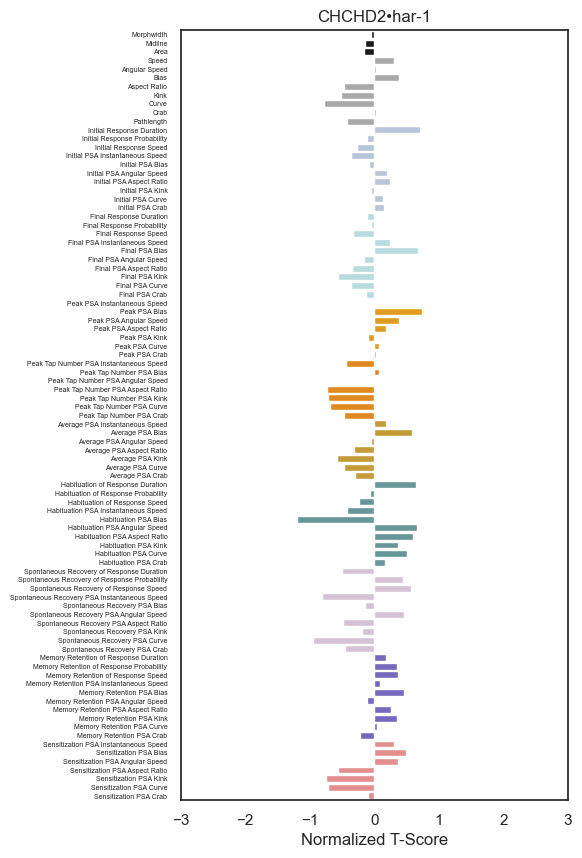

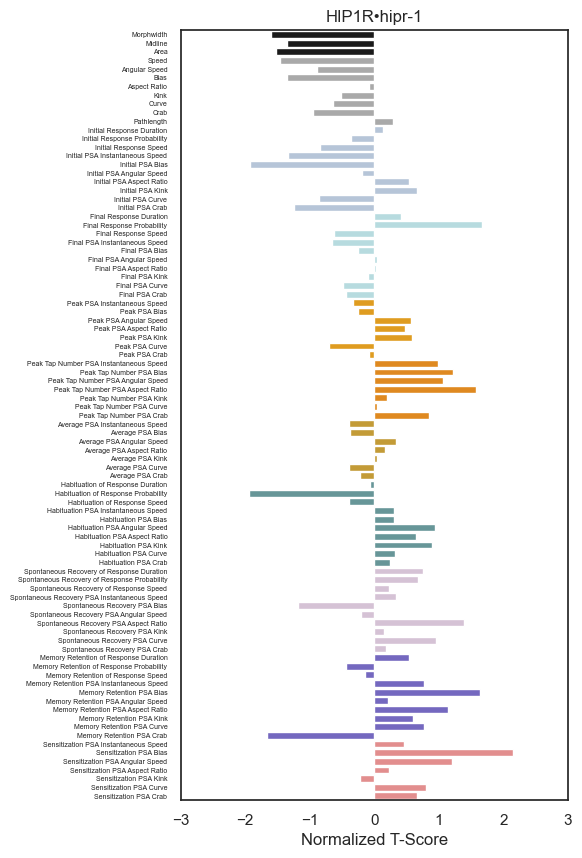

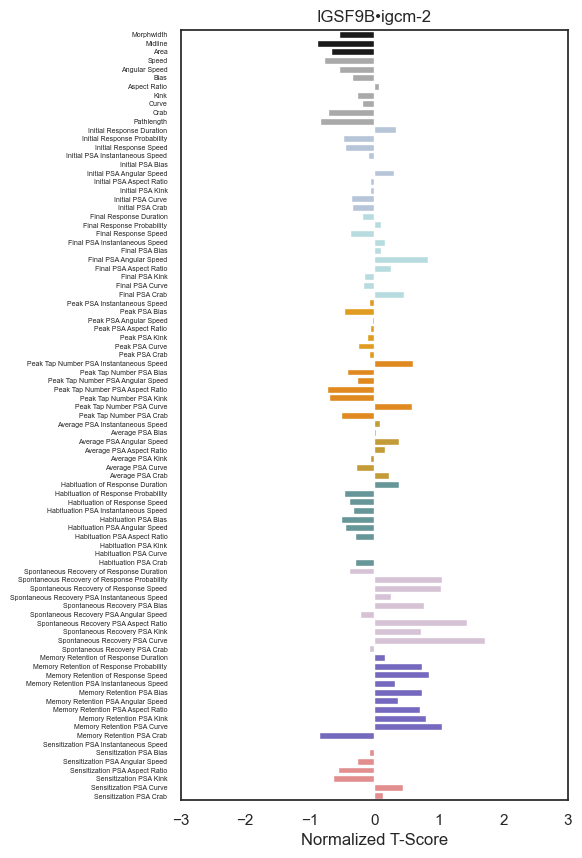

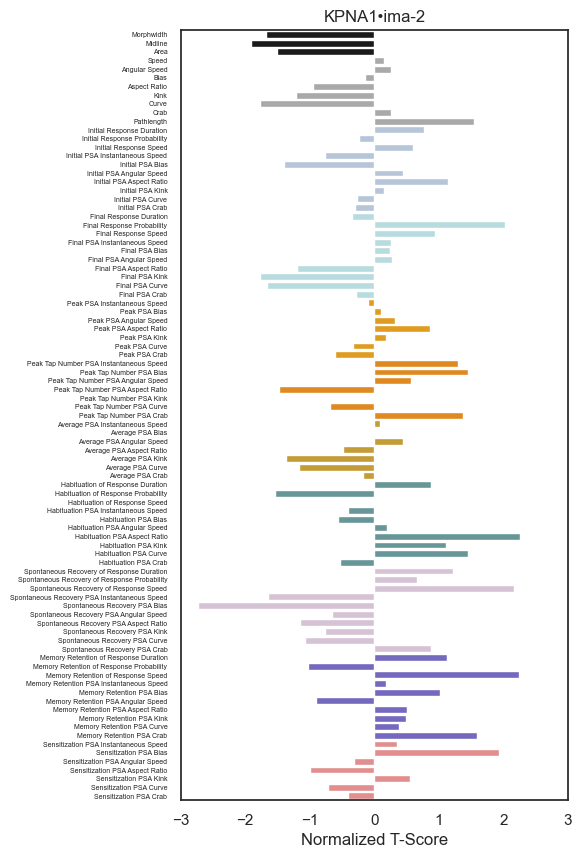

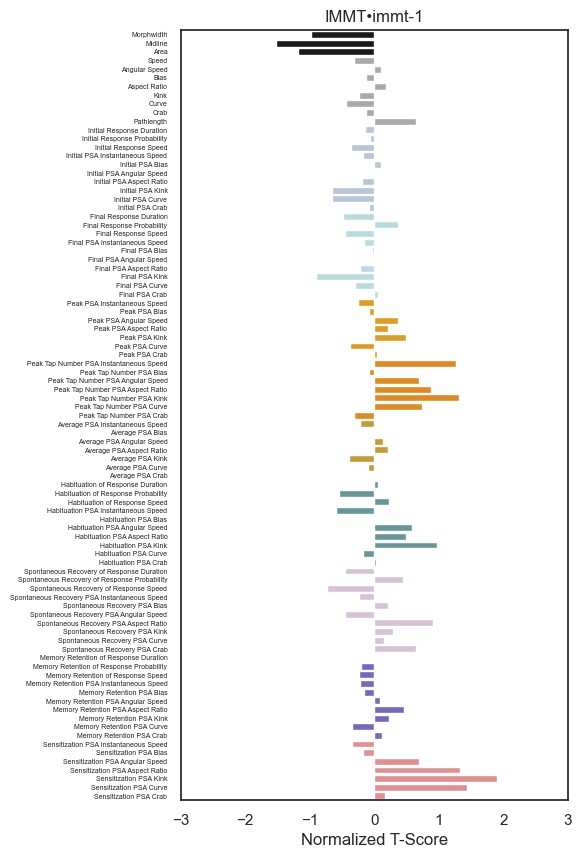

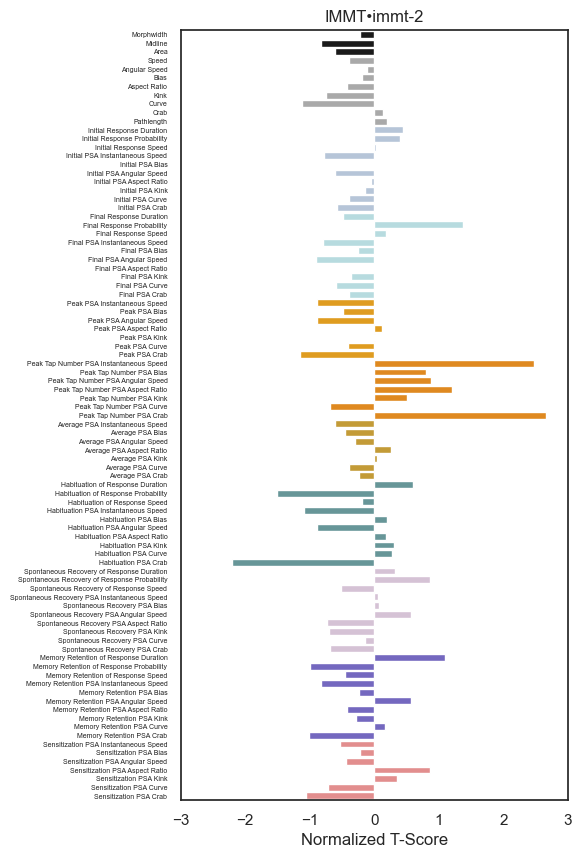

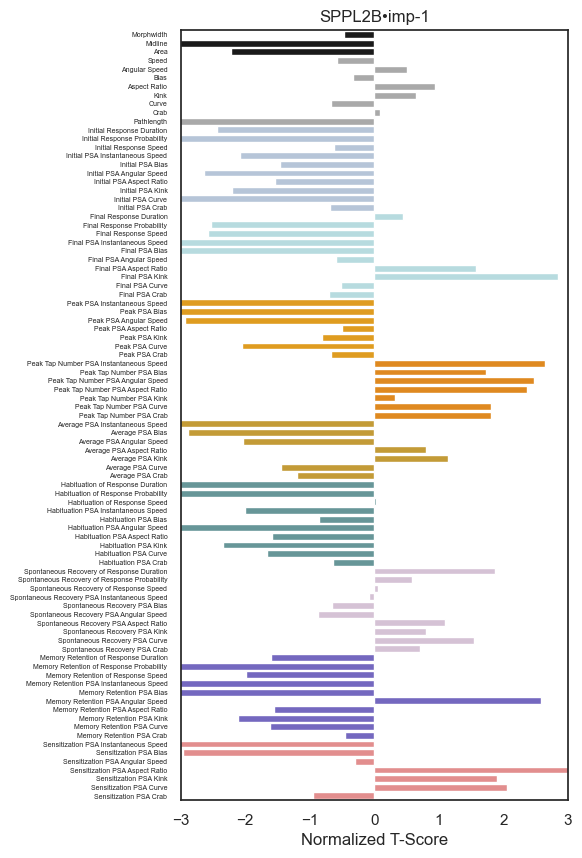

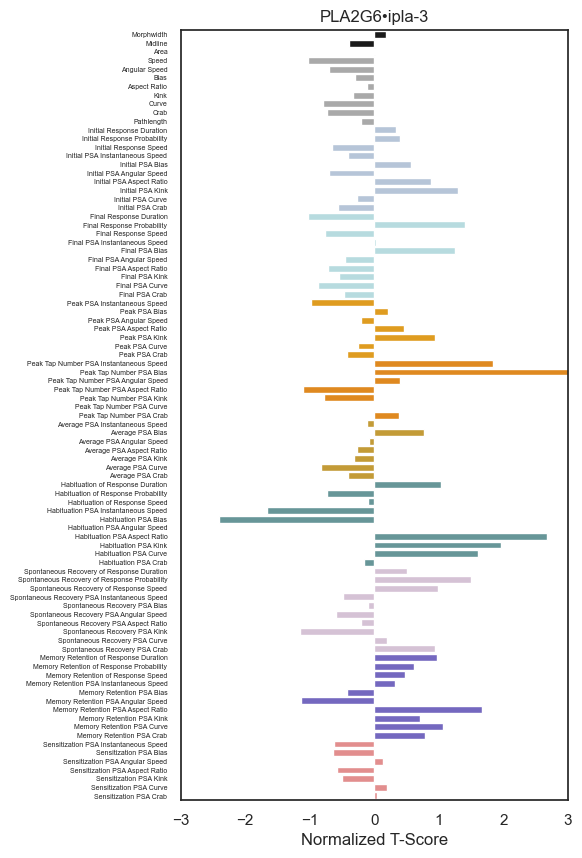

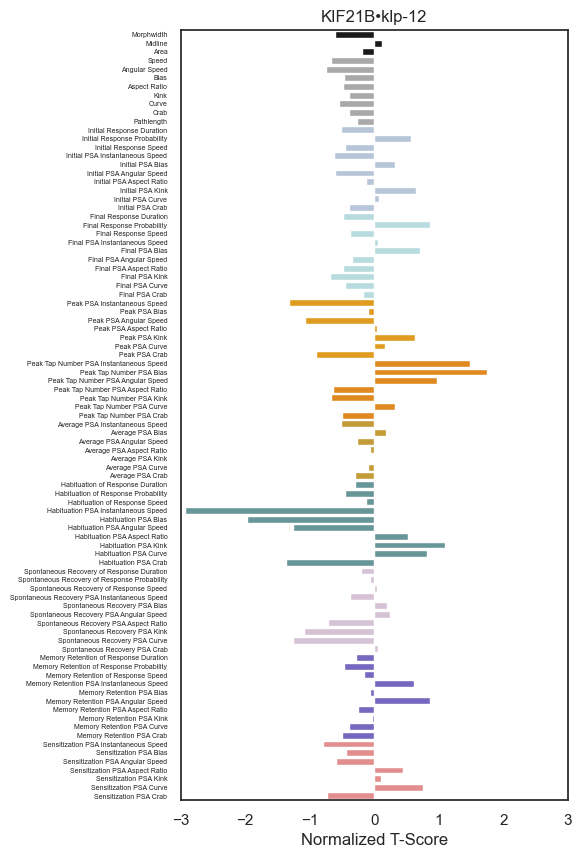

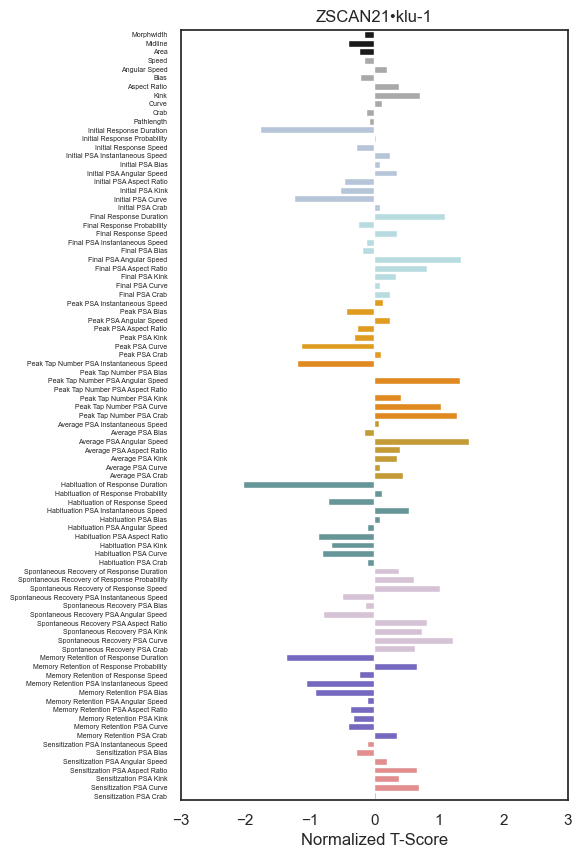

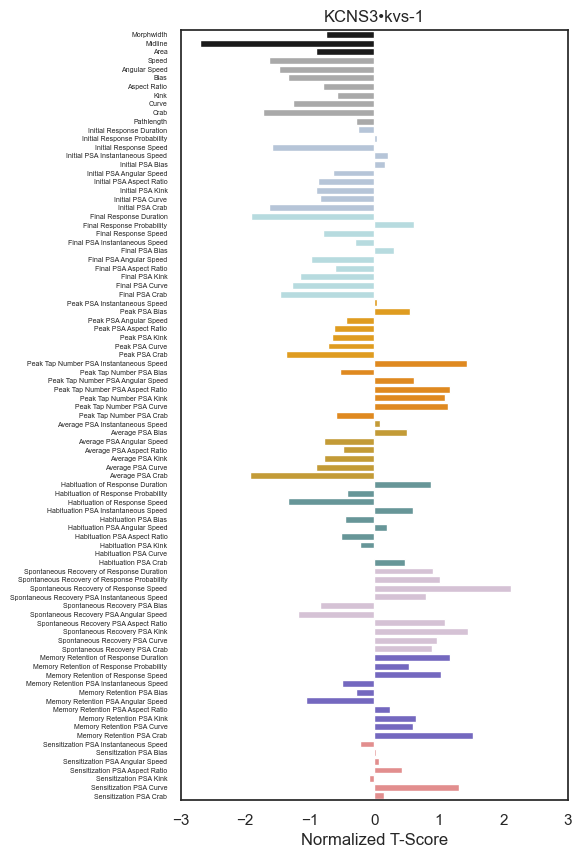

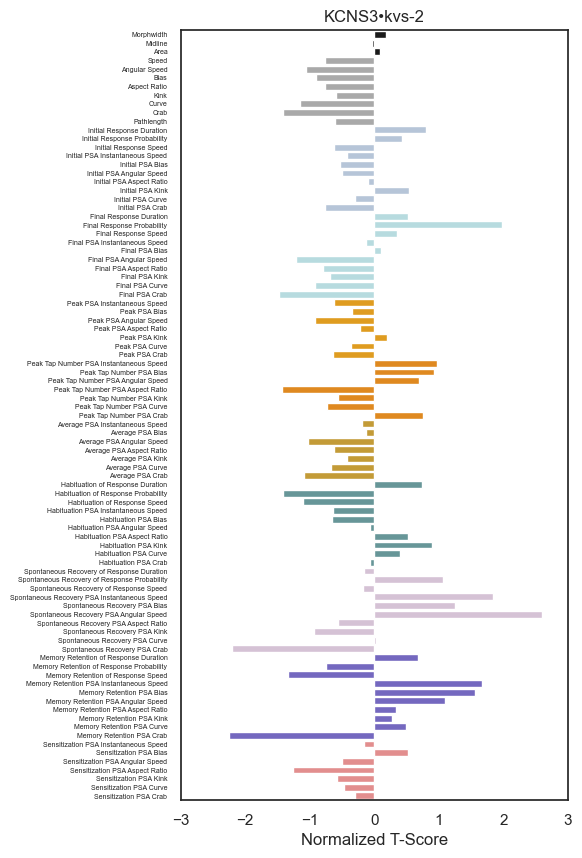

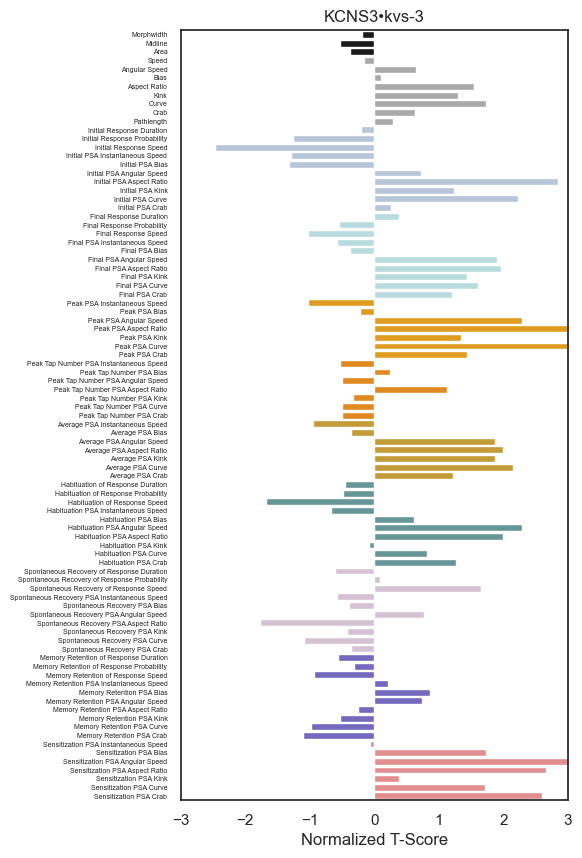

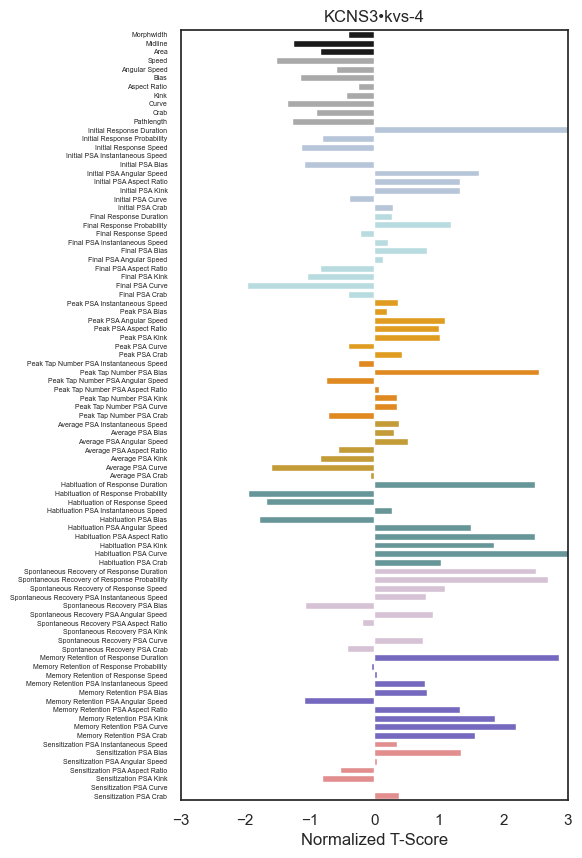

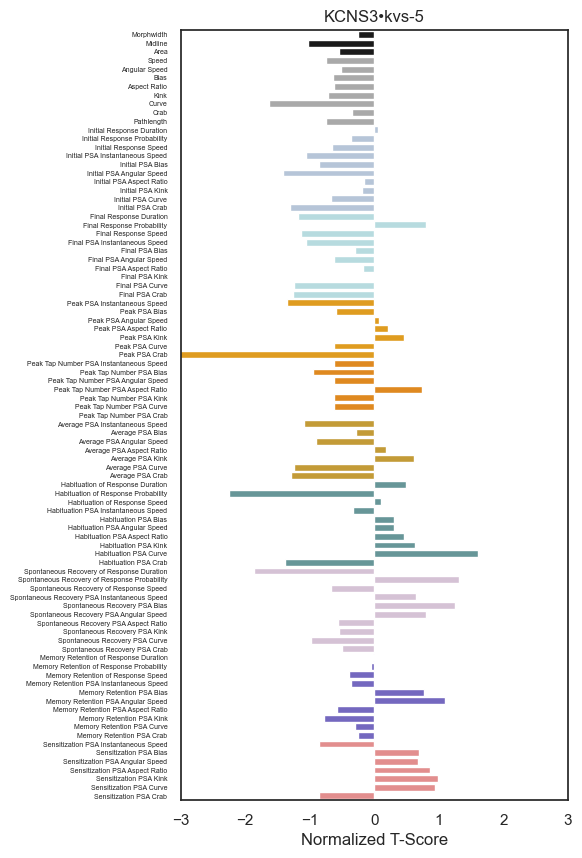

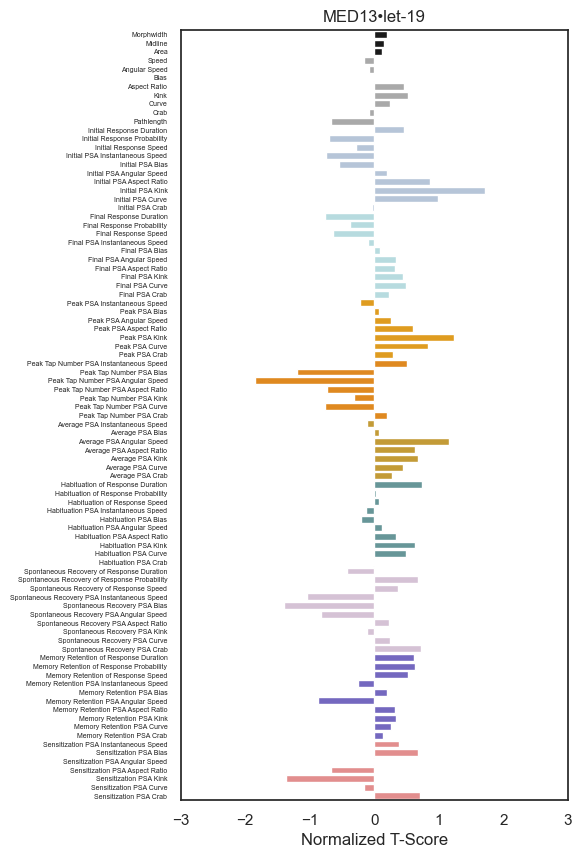

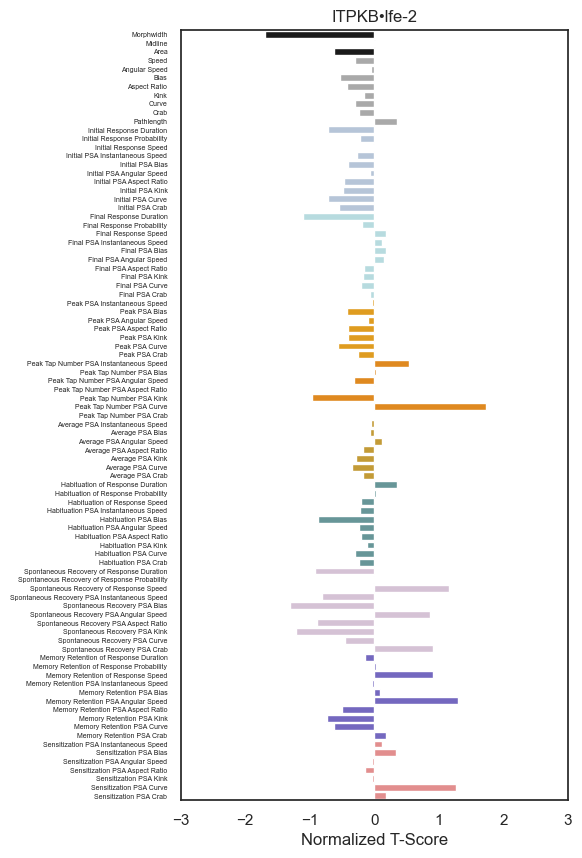

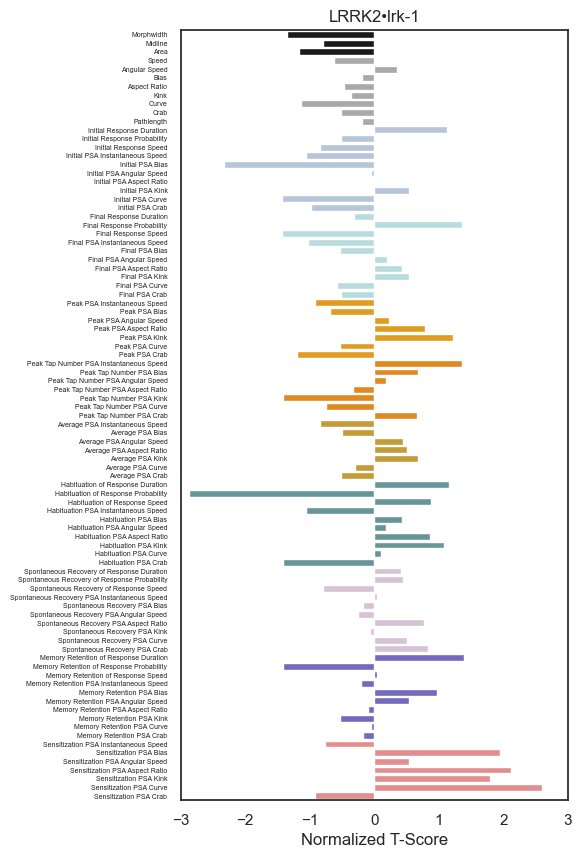

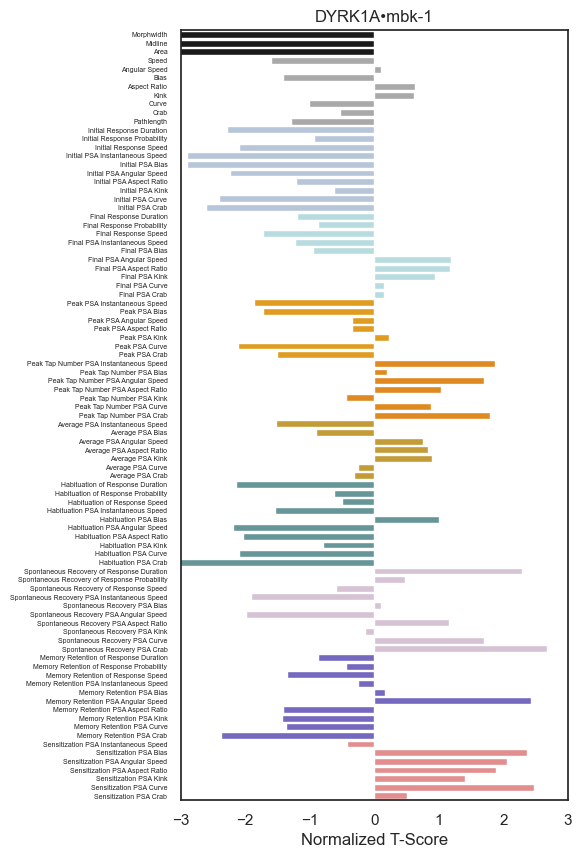

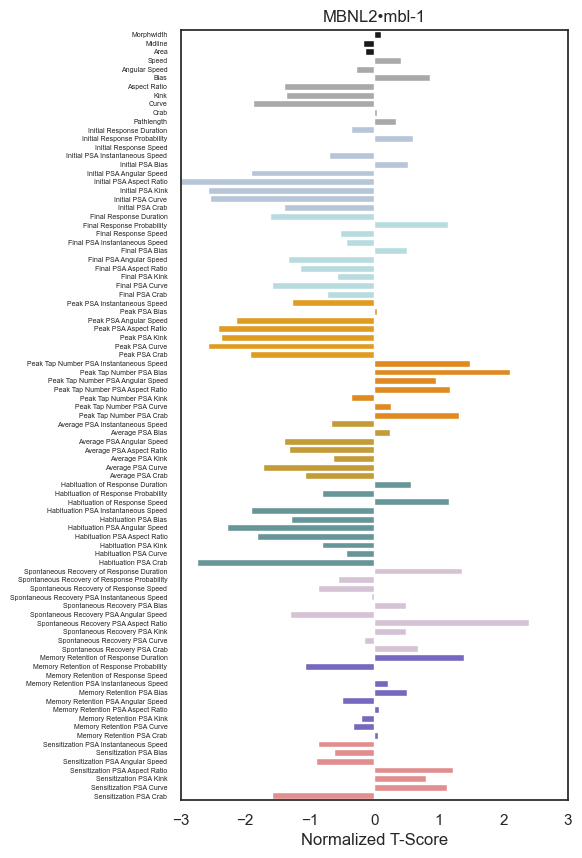

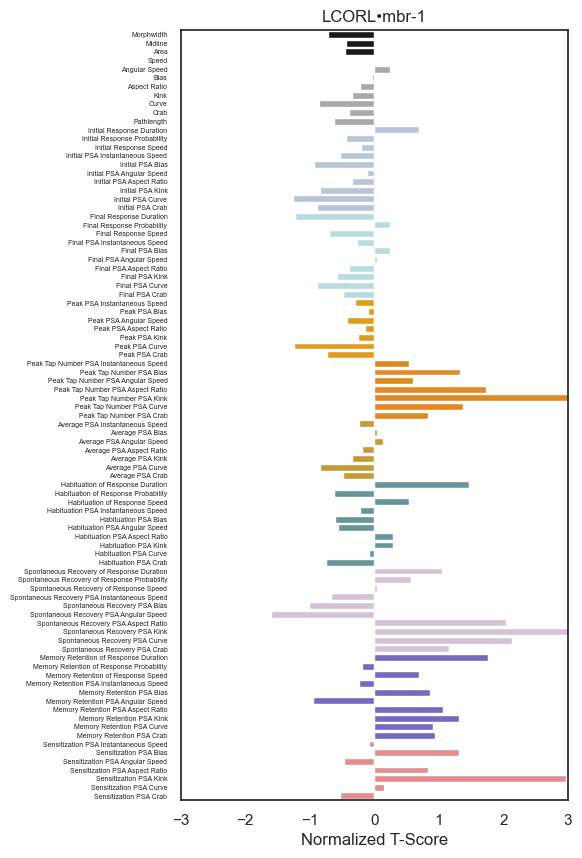

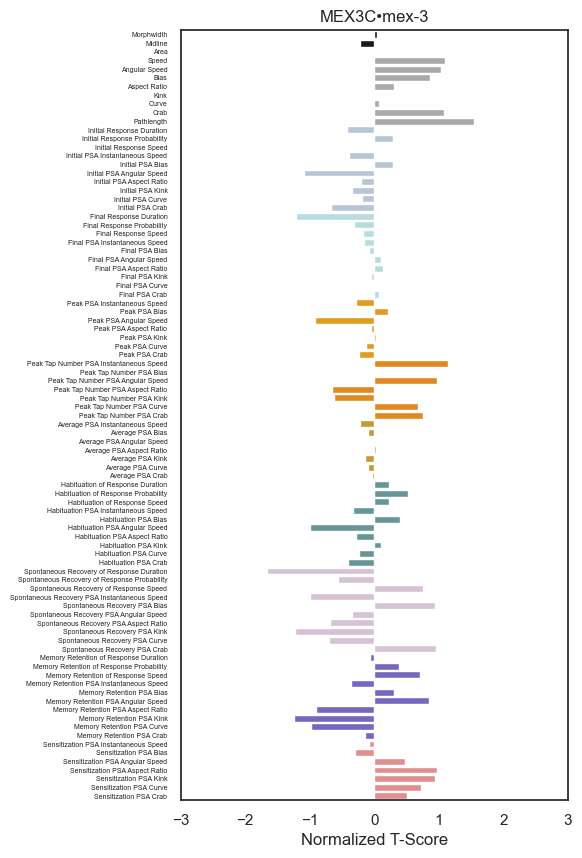

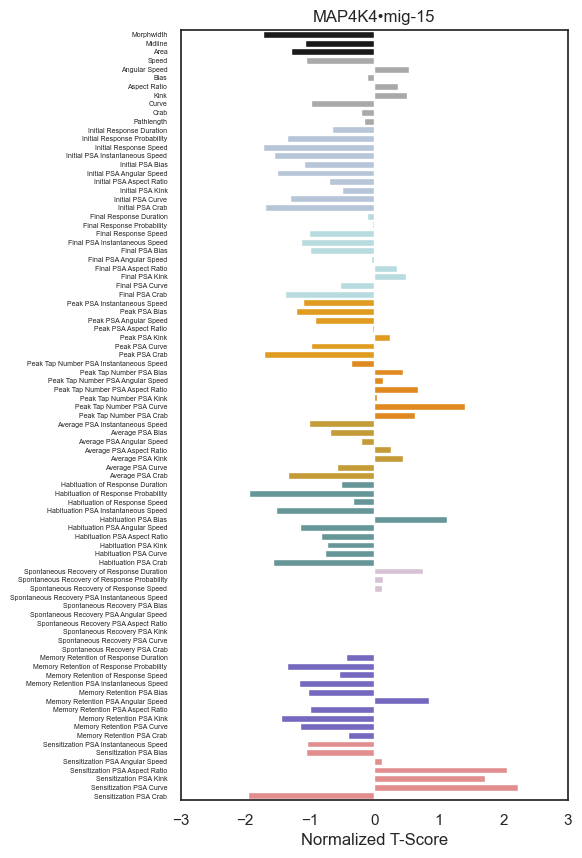

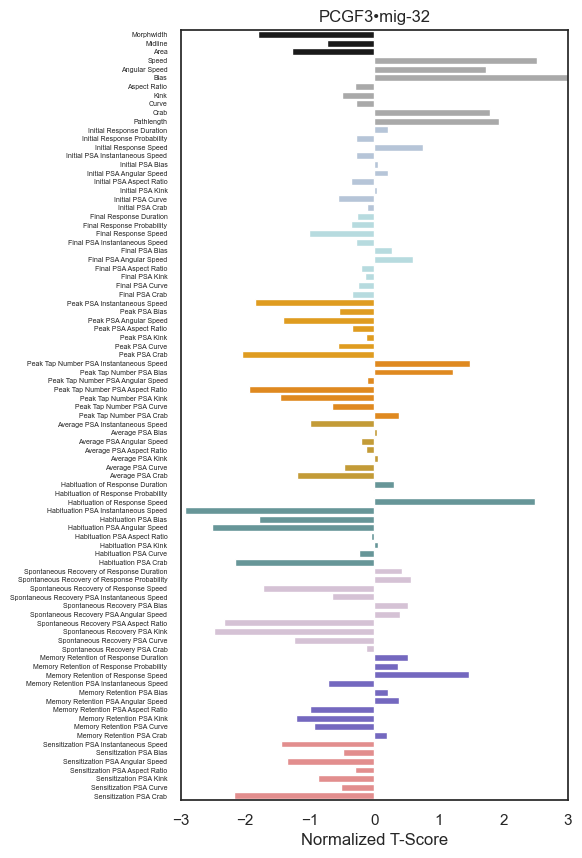

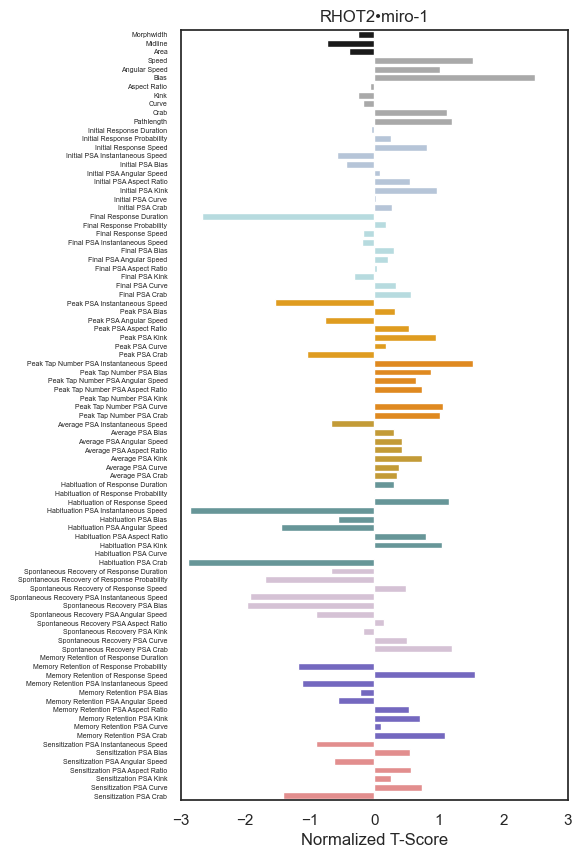

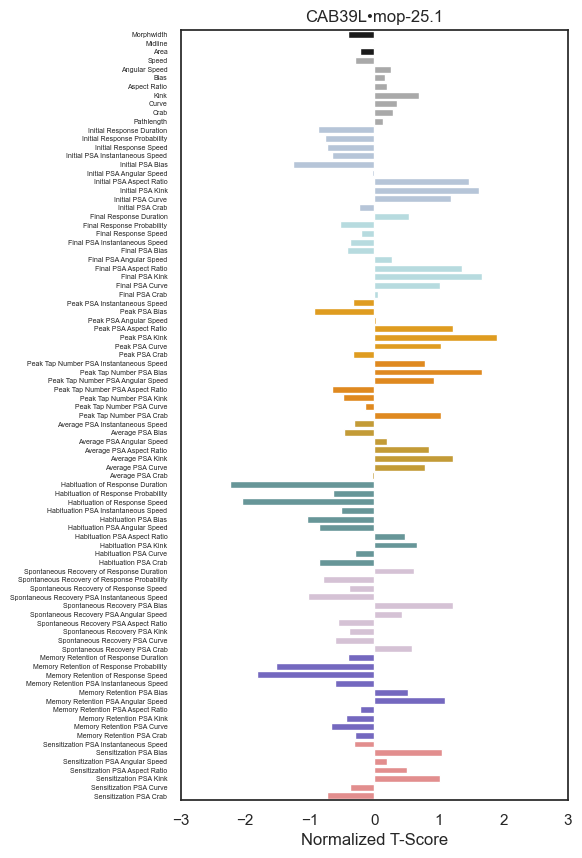

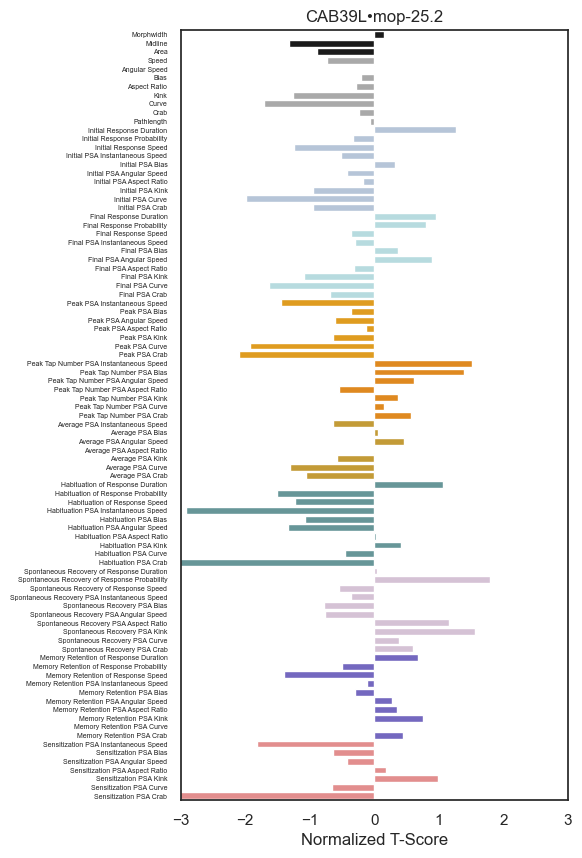

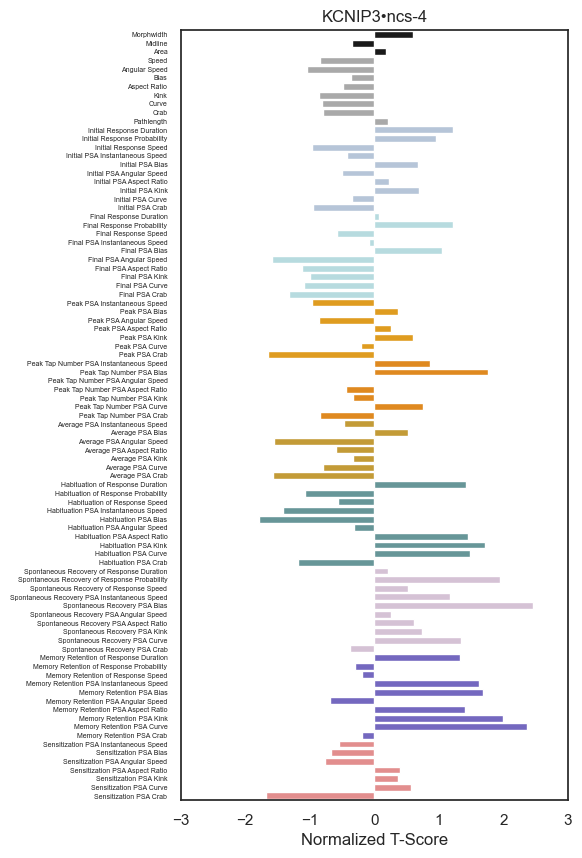

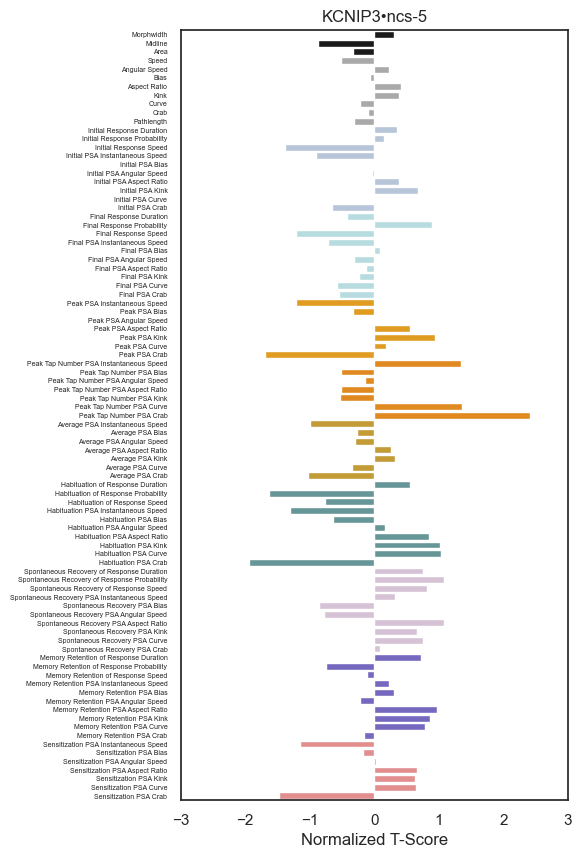

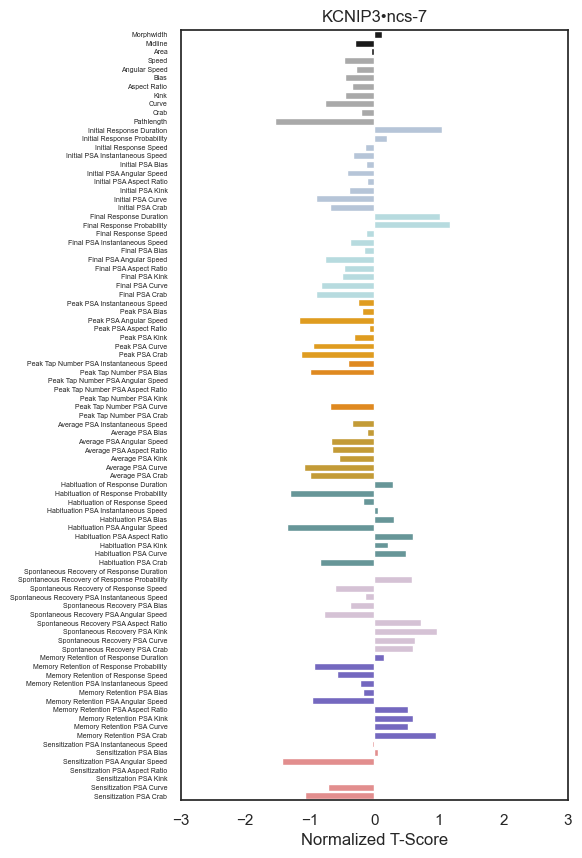

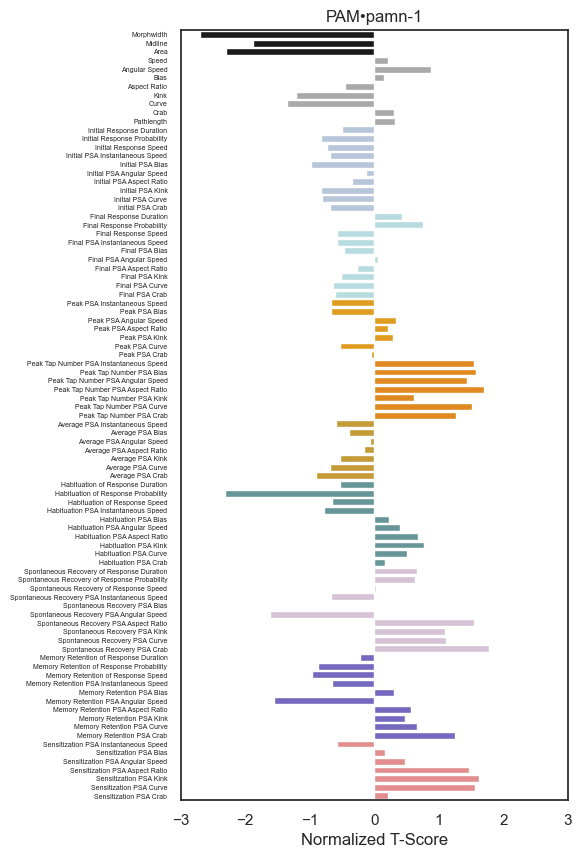

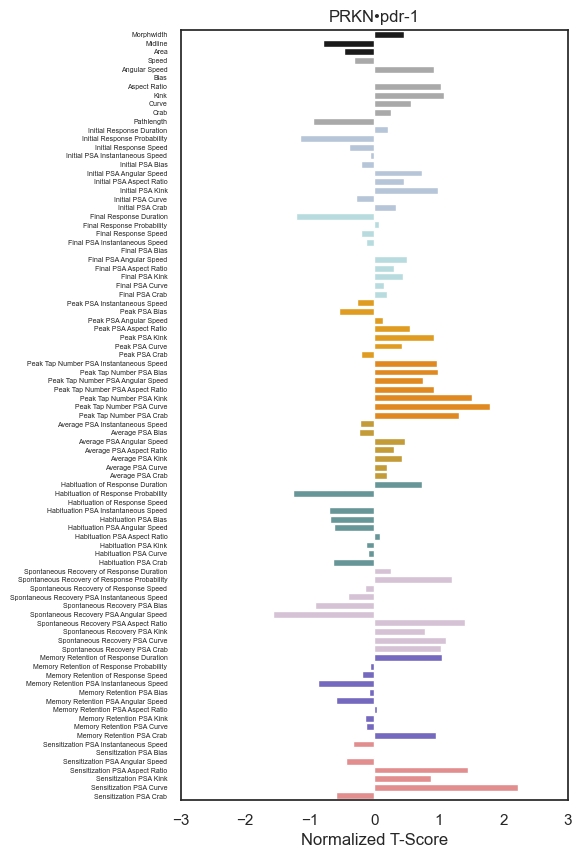

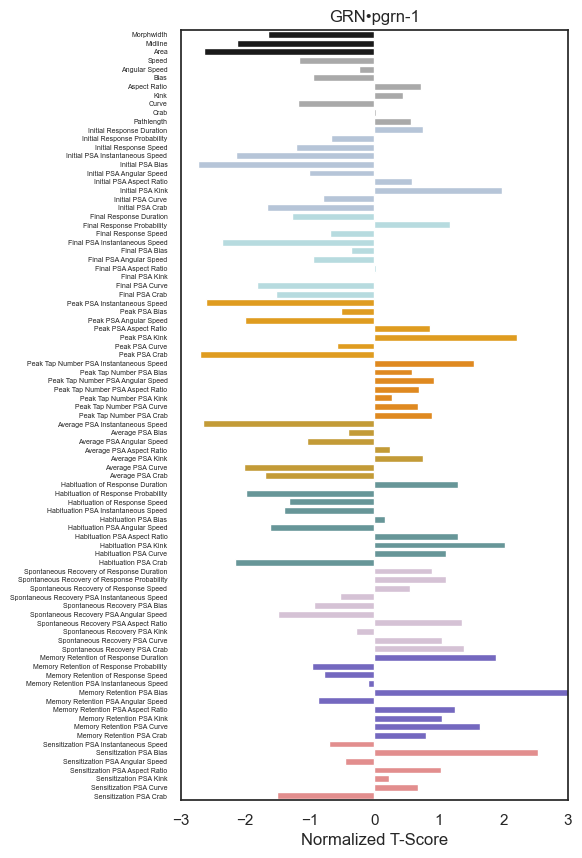

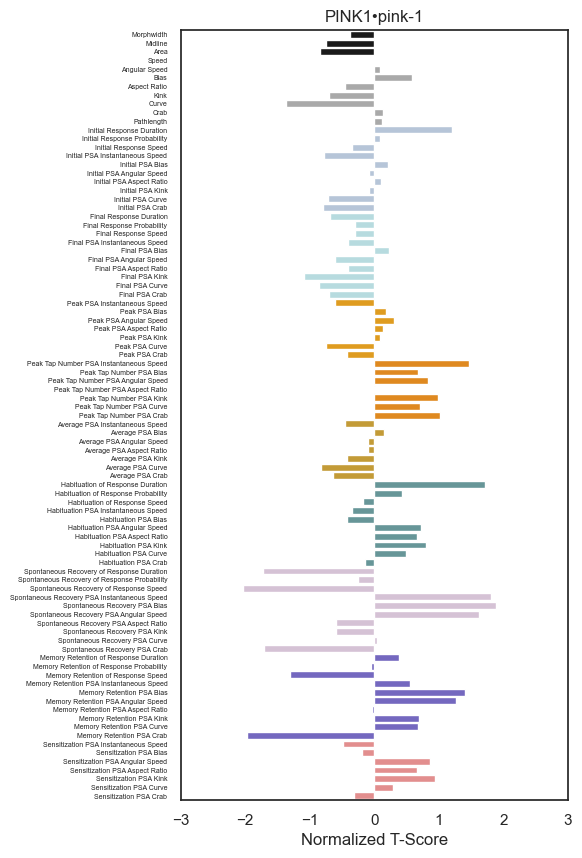

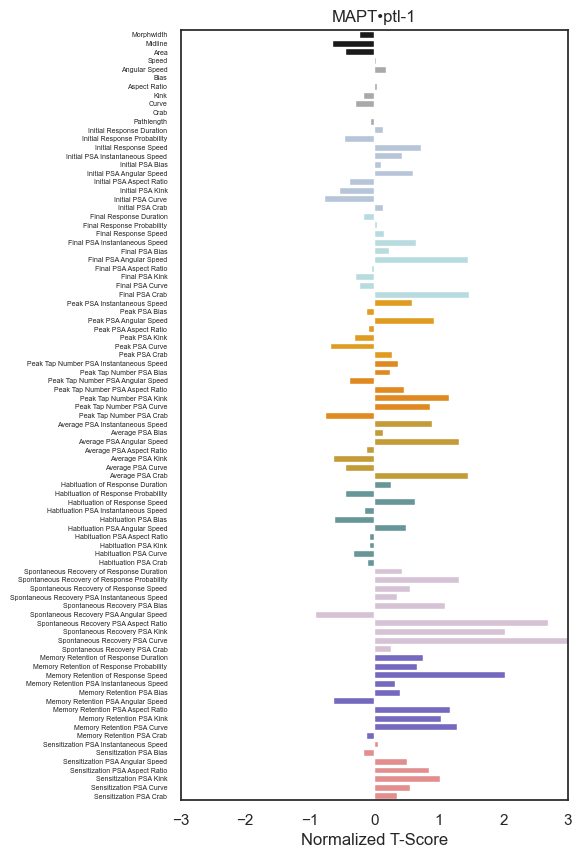

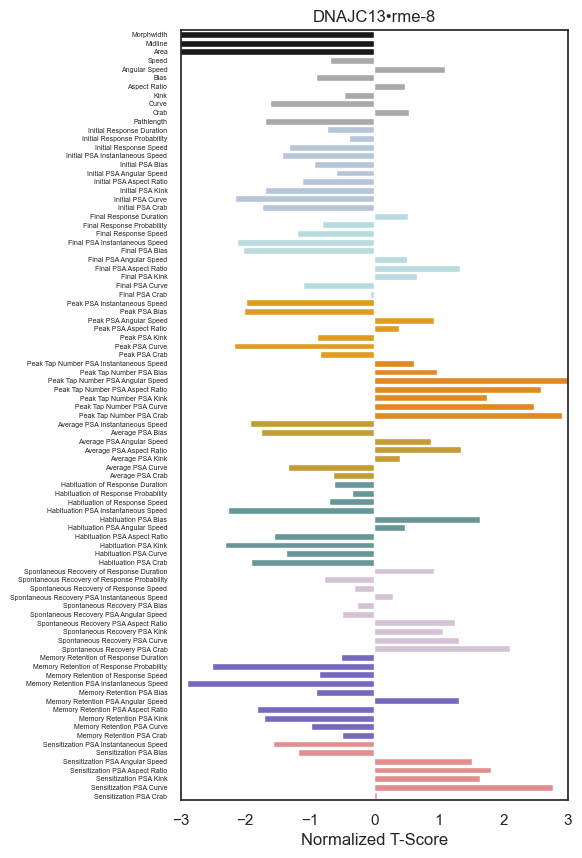

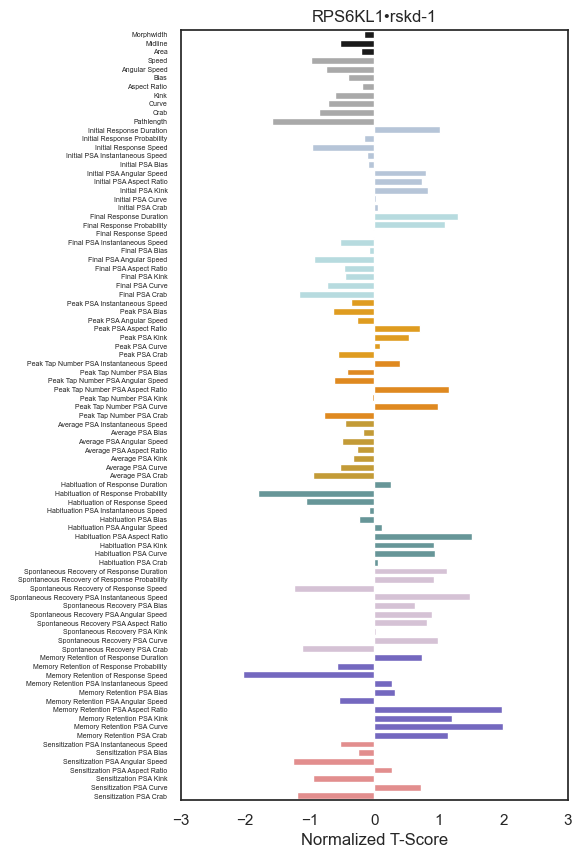

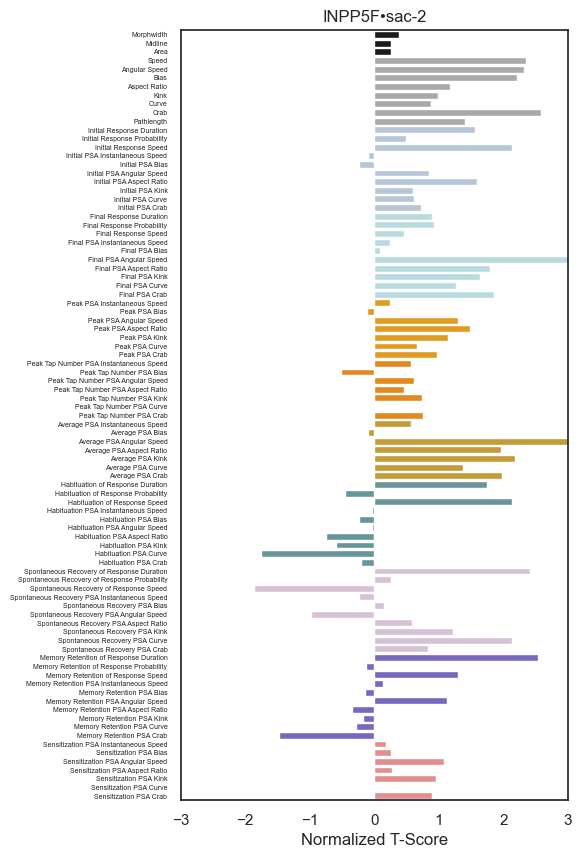

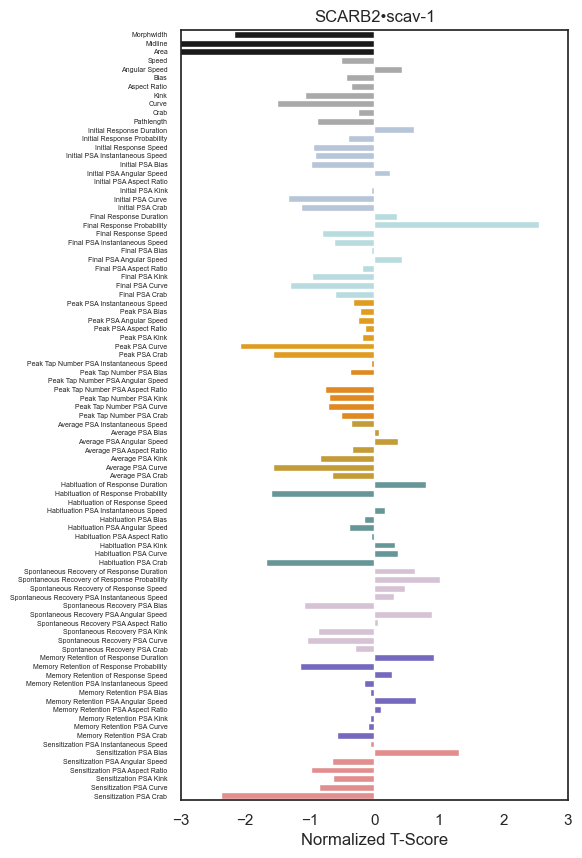

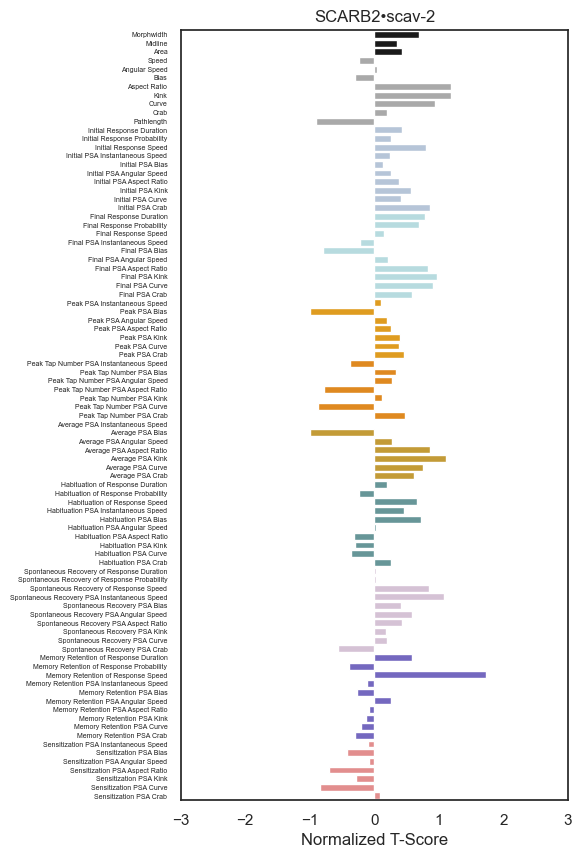

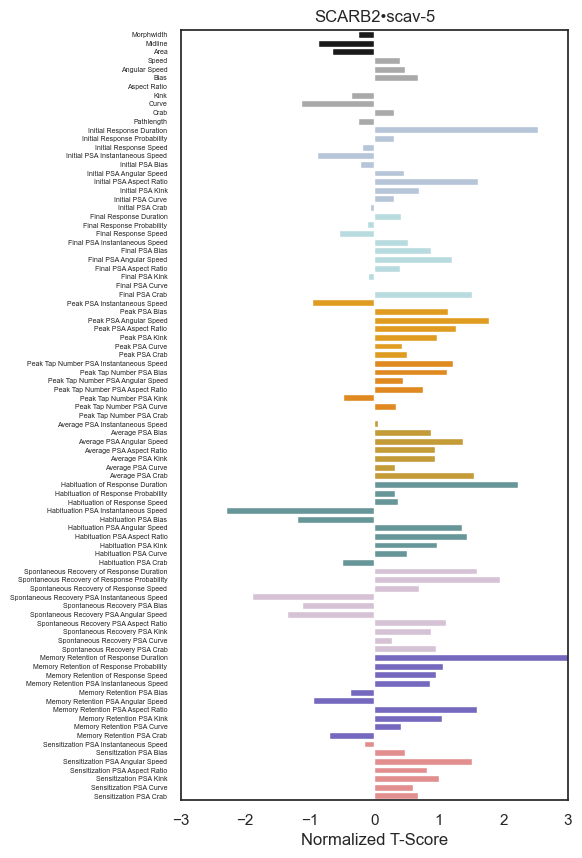

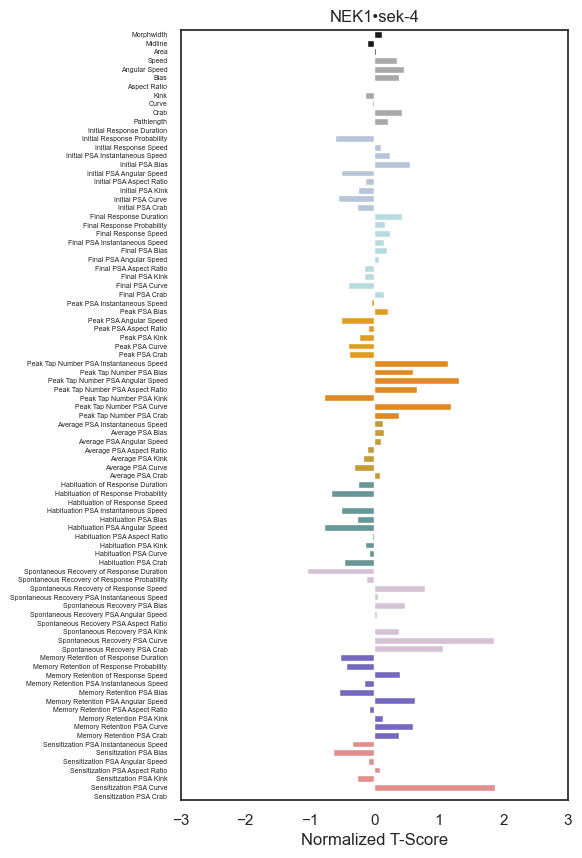

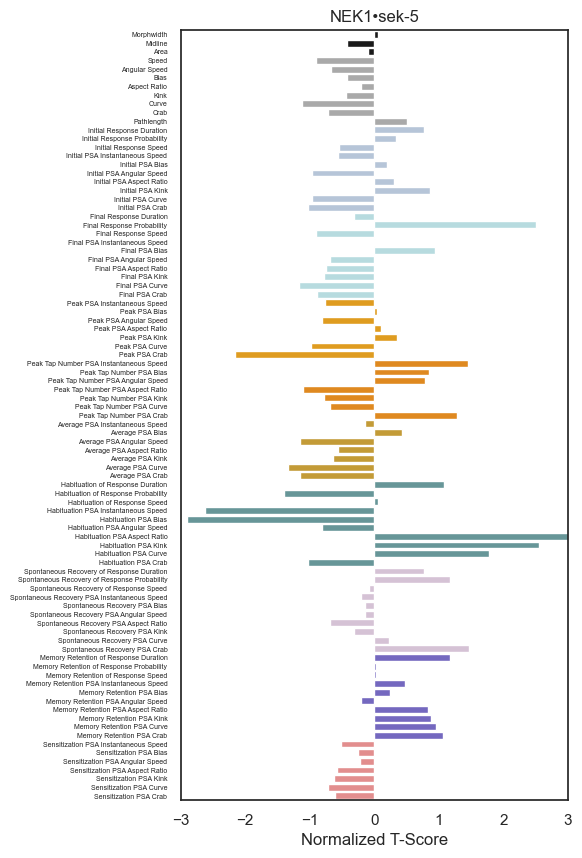

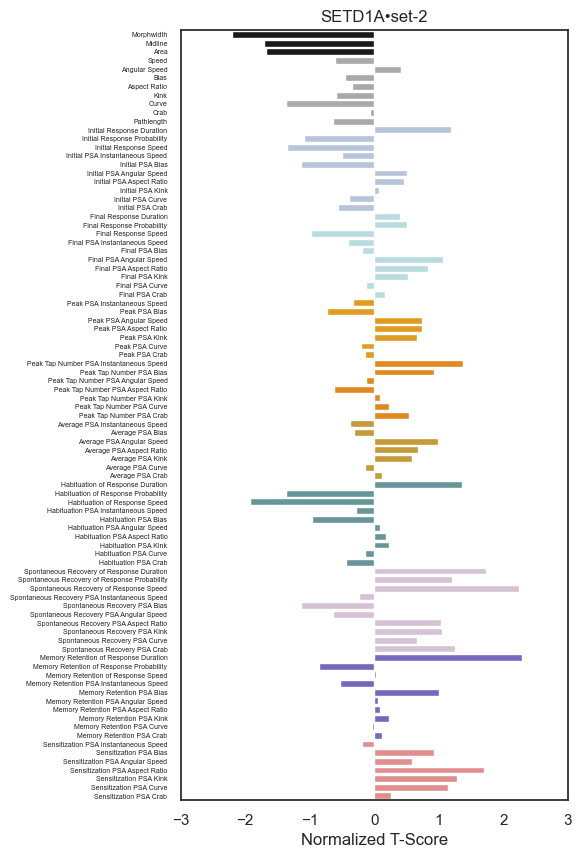

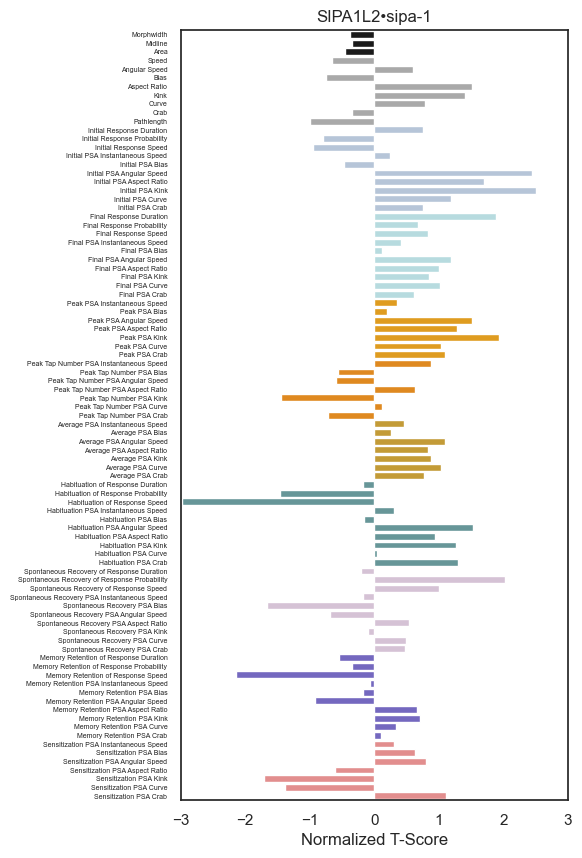

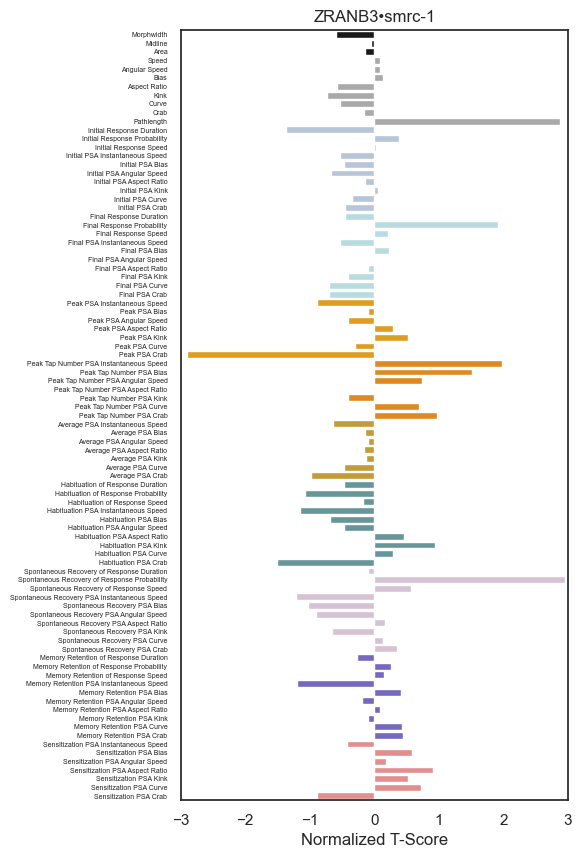

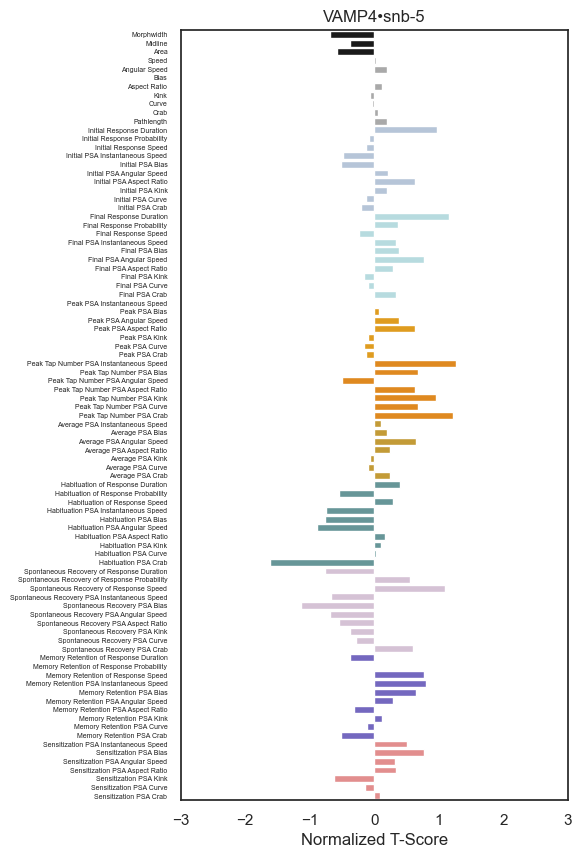

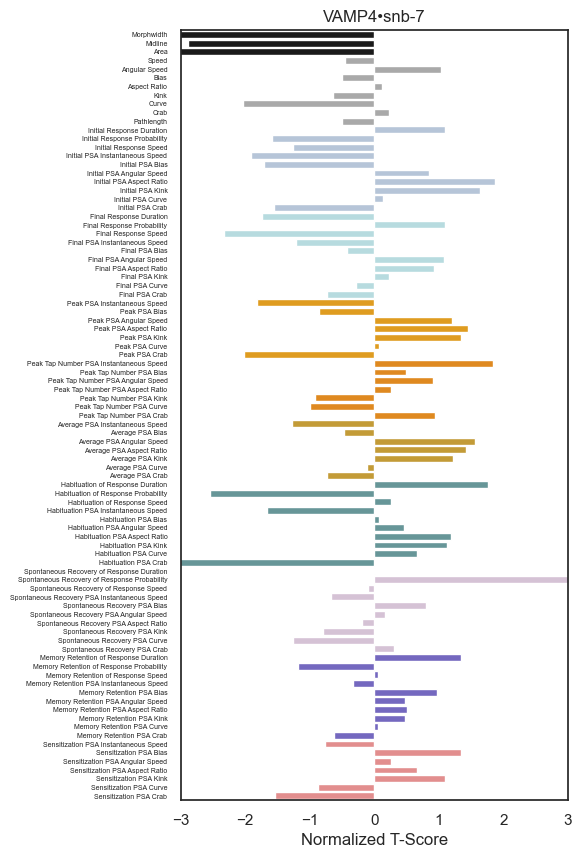

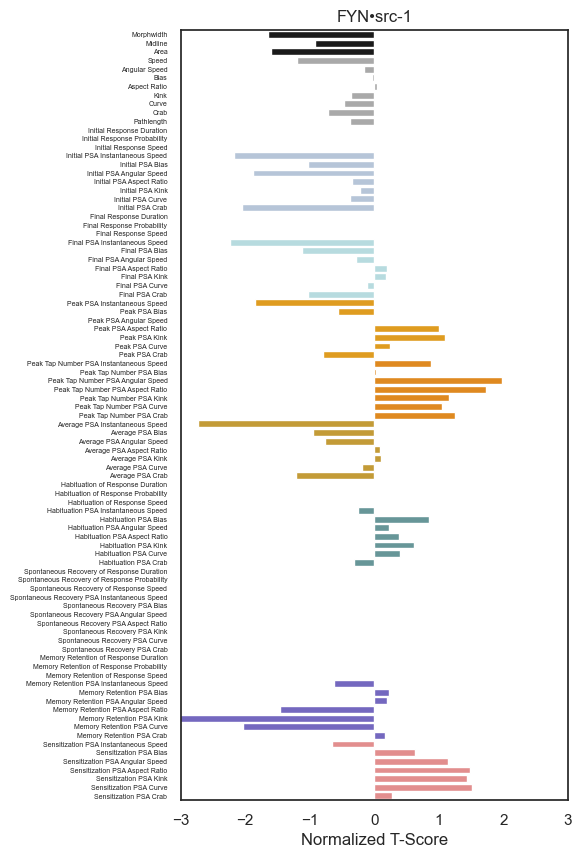

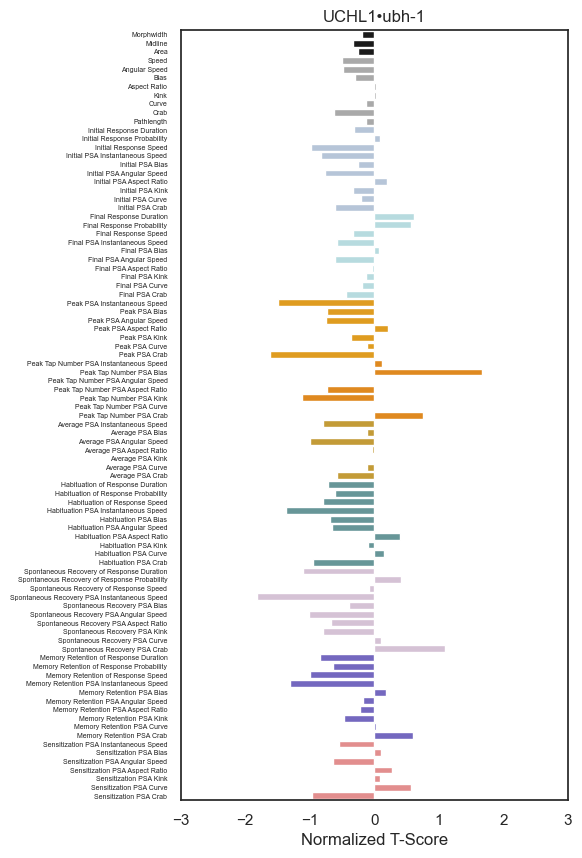

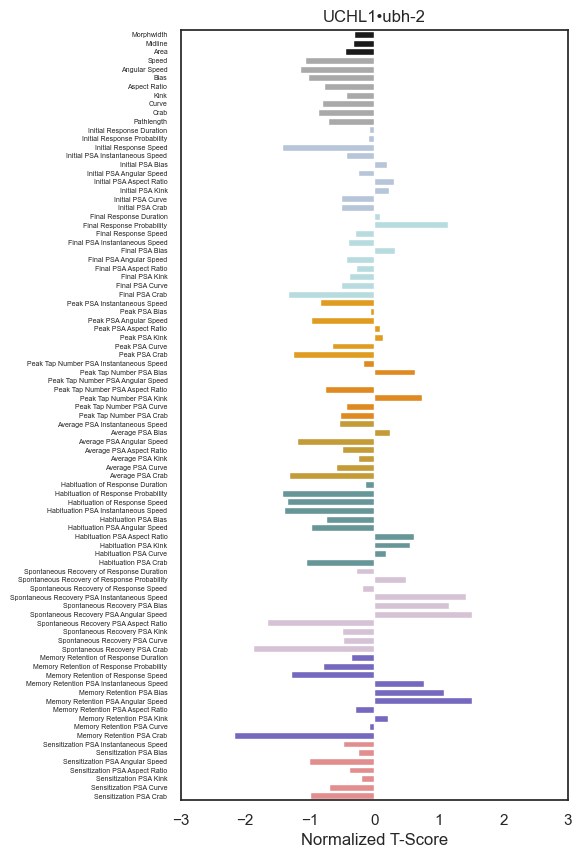

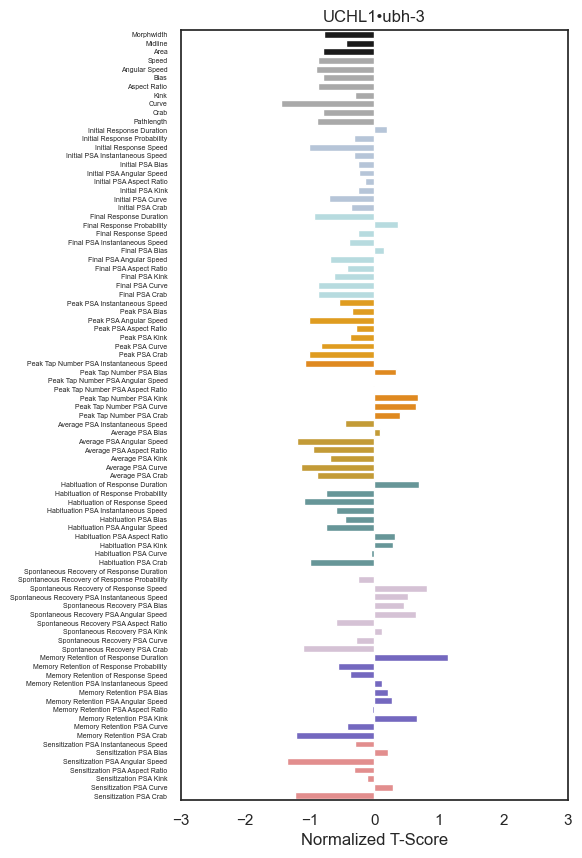

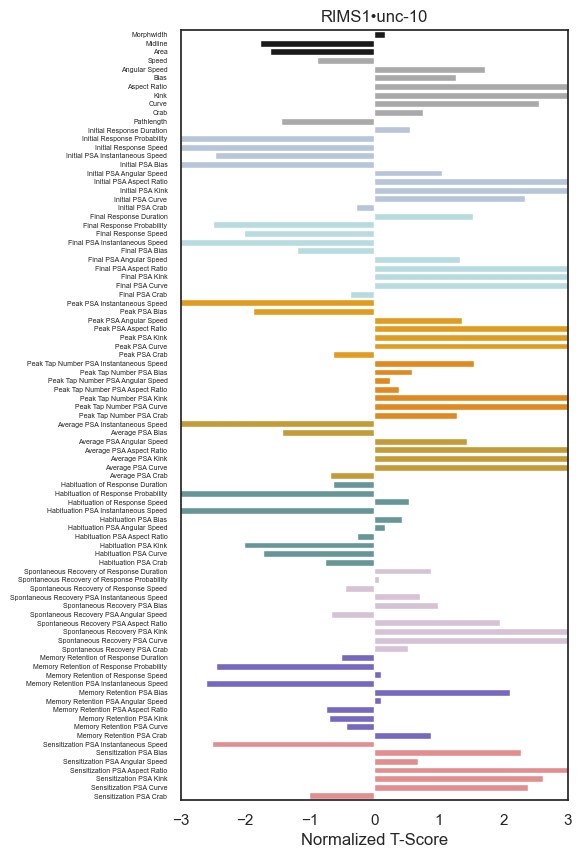

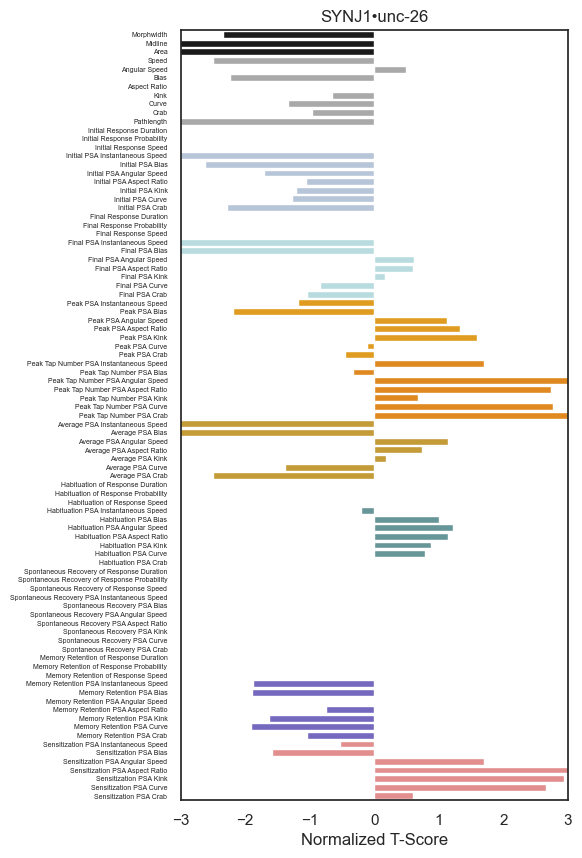

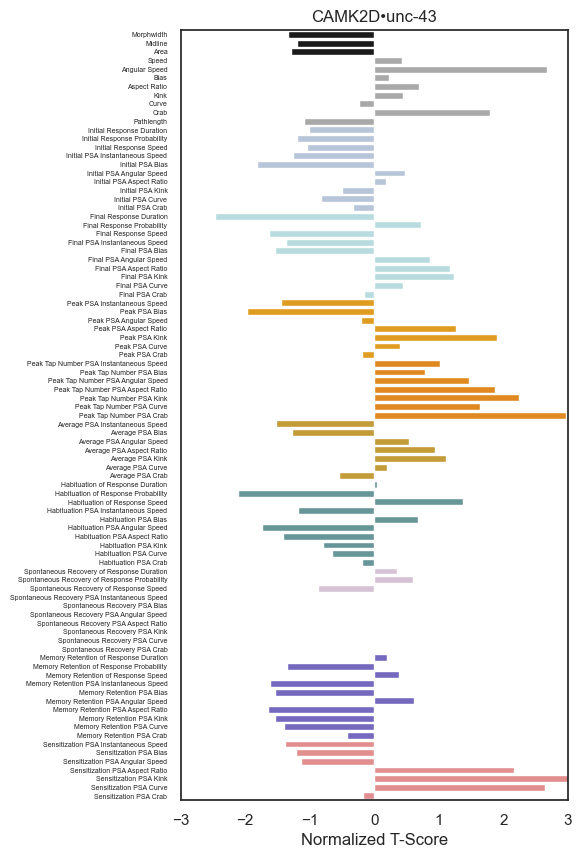

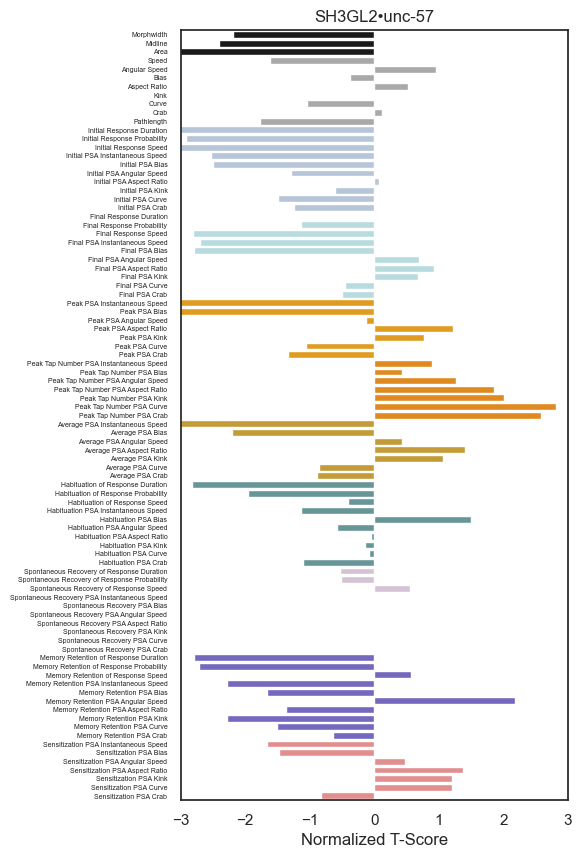

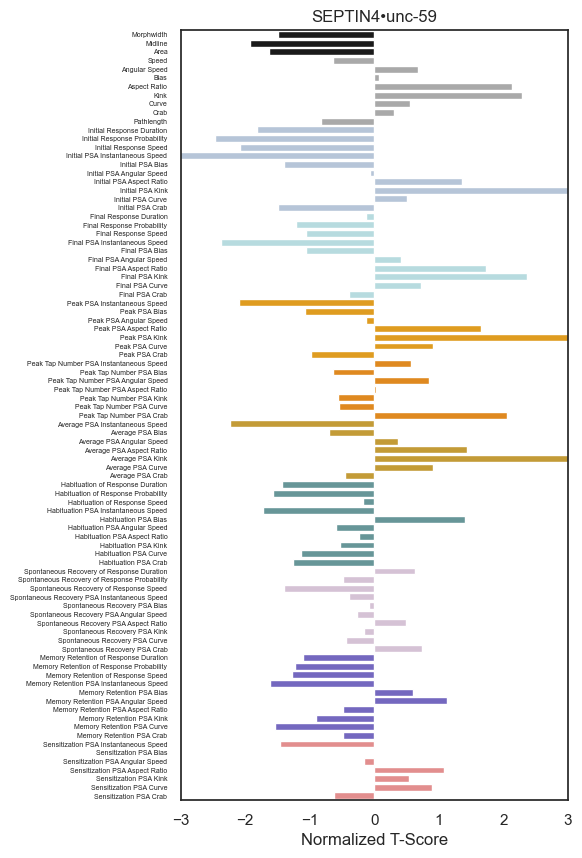

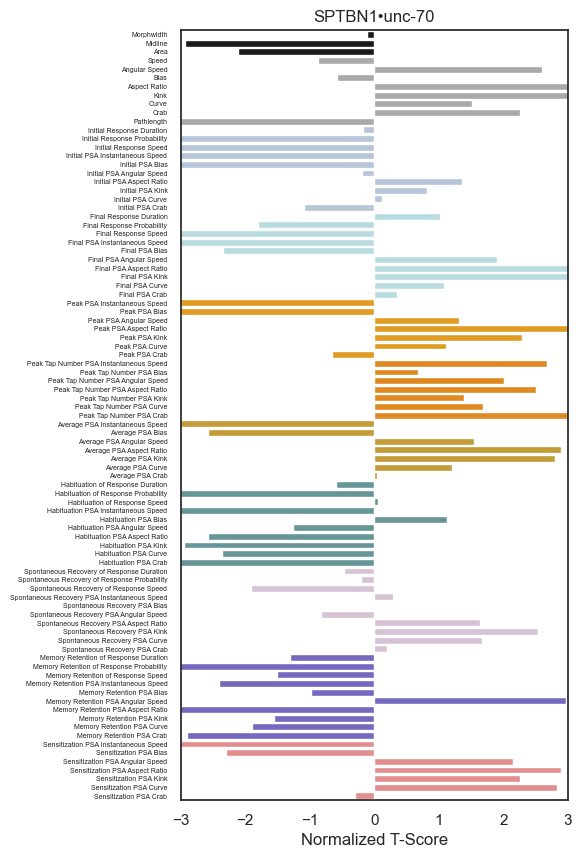

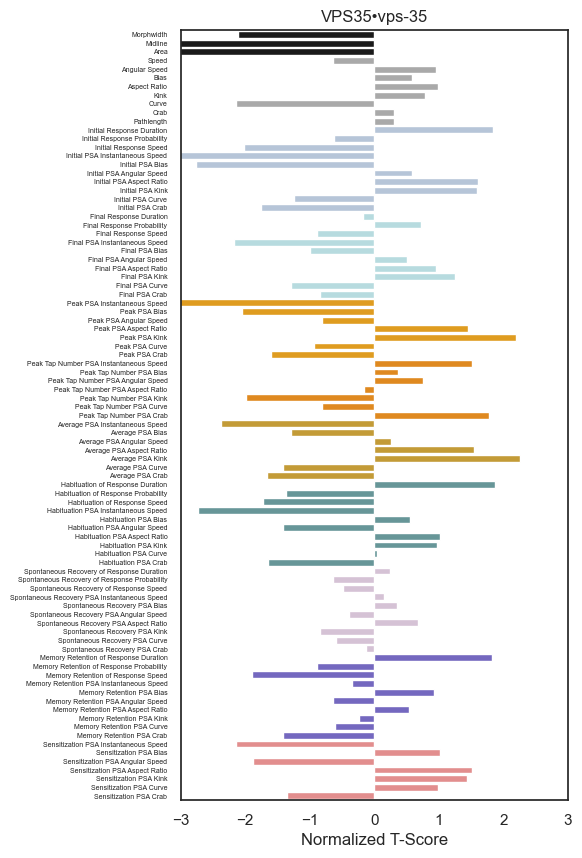

In [122]:
# sns.barplot(data=PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], x="Metric", y="T_score")
# plt.xticks(rotation=90)

sns.set_context('notebook')
# # plt.figure(figsize=(14,14))
# ax = sns.barplot(data = PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], 
#                 x="Metric",
#                 y="T_score",
#                 palette=metric_palette)
# plt.xticks(rotation=90)
# # plt.savefig('/Users/Joseph/Desktop/PD_Screen_TapHab/Tstat_GENE.png', format='png', dpi=450, bbox_inches = "tight")
# # '/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv'
# plt.show()

for x in gene_profile_data.Gene.unique():
    plt.figure(figsize=(5,10))
    ax = sns.barplot(data = gene_profile_data[gene_profile_data.Gene==f"{x}"], 
                x="Normalized T_score",
                y="Metric", orient='h',
                palette=metric_palette).set_title(f"{x}")
    plt.xlim(-3,3)
    plt.xlabel('Normalized T-Score')
    plt.ylabel('')
    plt.yticks(fontsize=5)
    plt.savefig(f'/Users/Joseph/Desktop/TapHab_Screen/PhenotypeProfile/{x}_Profile.png', format='png', dpi=450, bbox_inches = "tight")
    # plt.show()
print("done")

In [ ]:
BSR_Data = BSR_Data.rename(columns={'Strain':'Group'})
BSR_Data[["Genotype", "Treatment"]] = BSR_Data["Group"].str.split(pat="_", n=1, expand=True)
BSR_Data['Gene'] = BSR_Data['Genotype'].str.split(pat='(', expand=True)[0]
BSR_Data['Allele'] = BSR_Data['Genotype'].str.split(pat='(', expand=True)[1]
BSR_Data['Allele'] = BSR_Data['Allele'].str.split(pat=')', expand=True)[0]
BSR_Data['Allele'] = BSR_Data['Allele'].fillna('N2')

In [ ]:
# Test allele to make sure
# BSR_Data[BSR_Data.Allele == 'tm1584']

In [ ]:
BSR_Data

In [ ]:
# print(len(BSR_Data['Gene'].unique()))

In [ ]:
BSR_Data = BSR_Data.groupby(["Group","Genotype","Gene","Allele","Treatment","plate_id","date","worm"], as_index=False).mean()
BSR_Data

In [ ]:
BSR_Data[BSR_Data.Allele=='ok877'].date.unique()

In [ ]:
BSR_Data.to_csv("/Users/Joseph/Desktop/BSR_Screen/BSR_Screen_by_worm_July3_2025.csv")

In [ ]:
BSR_Data = BSR_Data[BSR_Data.Allele != 'n498']

In [ ]:
BSR_Data = BSR_Data.replace([20240114, 20240113],20231128)
BSR_Data

# Stats Stuff Here

## By Gene:

In [ ]:
GenotypeList = BSR_Data.Gene.unique().tolist()
GenotypeList.sort()

In [ ]:
len(GenotypeList)

In [ ]:
ListOfStrains = BSR_Data.Gene.unique().tolist()
ListOfStrains.remove('N2')
print(ListOfStrains)

In [ ]:

InteractionTest = pd.DataFrame(columns=['Source','SS','DF','MS','F','p-unc','np2','Gene'])
for i in tqdm(ListOfStrains):
    # print("testing gene: " + i)
    gene_of_interest = i
    Comparison = ['N2', i]
    gene_data = BSR_Data[BSR_Data.Gene == gene_of_interest]
    precomparisondata = BSR_Data[BSR_Data['date'].isin(gene_data.date.unique())]
    Comparisondata = precomparisondata[precomparisondata.Gene.isin(Comparison)]


    # result=Comparisondata.anova(dv="speed", between=["Gene","Treatment"]).round(7)
    # result['Gene']=i
    # InteractionTest = pd.concat([result, InteractionTest])

    try:    
        result=Comparisondata.anova(dv="speed", between=["Gene","Treatment"]).round(7)
        result['Gene']=i
        InteractionTest = pd.concat([result, InteractionTest])
    except:
        print("error in gene " + i)

In [ ]:
Comparison = ['N2', 'rme-8']
gene_of_interest = 'rme-8'
gene_data = BSR_Data[BSR_Data.Gene == gene_of_interest]
precomparisondata = BSR_Data[BSR_Data['date'].isin(gene_data.date.unique())]
# Comparisondata = precomparisondata[precomparisondata.Gene.isin(Comparison)]

In [ ]:
# precomparisondata

In [ ]:
# precomparisondata.Group.unique()

In [ ]:
# Comparisondata

In [ ]:
# Comparisondata.anova(dv="speed", between=["Gene","Treatment"])

In [ ]:
# print(precomparisondata.Gene.unique())

In [ ]:
# precomparisondata[precomparisondata.Gene == 'N2']

In [ ]:
InteractionTest.reset_index(drop=True)

In [ ]:
name = "July3_Complete_Screen_ByGene"
InteractionTest.reset_index(drop=True).to_csv(f"/Users/Joseph/Desktop/BSR_Screen/BSR_Interaction_Test_{name}.csv")

## By Allele:

In [ ]:
ListOfStrains = BSR_Data.Genotype.unique().tolist()
ListOfStrains.remove('N2')
print(ListOfStrains)

In [ ]:

InteractionTest = pd.DataFrame(columns=['Source','SS','DF','MS','F','p-unc','np2','Genotype'])
for i in ListOfStrains:
    # print("testing gene: " + i)
    gene_of_interest = i
    Comparison = ['N2', i]
    gene_data = BSR_Data[BSR_Data.Genotype == gene_of_interest]
    precomparisondata = BSR_Data[BSR_Data['date'].isin(gene_data.date.unique())]
    try:    
        Comparisondata = precomparisondata[precomparisondata['Genotype'].isin(Comparison)]
        result=Comparisondata.anova(dv="speed", between=["Genotype","Treatment"]).round(7)
        result['Genotype']=i
        InteractionTest = pd.concat([result, InteractionTest])
    except:
        print("error in gene " + i)
    
    

In [ ]:
# test = BSR_Data[BSR_Data.Genotype == 'rme-8(b1023)']
# print(test)
# print("-"*50)
# datetest = BSR_Data[BSR_Data.date == 20250322]
# print(datetest.Genotype.unique())
# print(datetest)

In [ ]:
InteractionTest

In [ ]:
name = "July3_Complete_Screen_ByAllele"
InteractionTest.to_csv(f"/Users/Joseph/Desktop/BSR_Screen/BSR_Interaction_Test_{name}.csv")

# Correlation plot for just phenotypes

In [ ]:
BSR_Data
cols = list(BSR_Data.columns.values)

In [ ]:
cols

In [ ]:
desired_order = ['Genotype','Gene','Allele','Treatment','plate_id','date','length','midline','width','morphwidth','area','speed','angularspeed','pathlength','bias','dir','kink','curve','crab']
BSR_Data_ordered = BSR_Data[desired_order]
BSR_Data_ordered = BSR_Data_ordered[BSR_Data_ordered.Gene != 'N2']
BSR_Data_OnFood = BSR_Data_ordered[BSR_Data_ordered.Treatment == 'OnFood']
BSR_Data_OnFood = BSR_Data_OnFood.rename(columns={'speed':'Speed_OnFood',
                                                  'angularspeed':'AngularSpeed_OnFood',
                                                  'pathlength':'Pathlength_OnFood',
                                                  'bias':'Bias_OnFood',
                                                  'dir':'Dir_OnFood',
                                                  'kink':'Kink_OnFood',
                                                  'curve':'Curve_OnFood',
                                                  'crab':'Crab_OnFood'})

BSR_Data_OnFood = BSR_Data_OnFood.drop(columns=['Treatment','plate_id','date']).groupby(['Genotype','Gene','Allele'], as_index=False).mean()

BSR_Data_OffFood = BSR_Data_ordered[BSR_Data_ordered.Treatment == 'OffFood']
BSR_Data_OffFood = BSR_Data_OffFood[['Genotype','Gene','Allele','Treatment','plate_id','date','speed','angularspeed','pathlength','bias','dir','kink','curve','crab']]
BSR_Data_OffFood = BSR_Data_OffFood.rename(columns={'speed':'Speed_OffFood',
                                                  'angularspeed':'AngularSpeed_OffFood',
                                                  'pathlength':'Pathlength_OffFood',
                                                  'bias':'Bias_OffFood',
                                                  'dir':'Dir_OffFood',
                                                  'kink':'Kink_OffFood',
                                                  'curve':'Curve_OffFood',
                                                  'crab':'Crab_OffFood'})

BSR_Data_OffFood = BSR_Data_OffFood.drop(columns=['Treatment','plate_id','date']).groupby(['Genotype','Gene','Allele'], as_index=False).mean()

BSR_Data_Correlation = BSR_Data_OnFood.merge(BSR_Data_OffFood, on=['Genotype','Gene','Allele'], how='left')




In [ ]:
print(BSR_Data_OnFood.shape)
print(BSR_Data_OffFood.shape)
print(BSR_Data_Correlation.shape)

In [ ]:
BSR_Data_Correlation = BSR_Data_Correlation.drop(columns = ['Genotype','Gene','Allele'])
BSR_Data_Correlation = BSR_Data_Correlation.rename(columns={'length':'Length',
                                                            'midline':'Midline',
                                                            'width':'Width',
                                                            'morphwidth':'Morphwidth',
                                                            'area':'Area'})

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
BSR_corr = BSR_Data_Correlation.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = BSR_corr, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_NoN2.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Correlation of just N2 Data

In [ ]:
desired_order = ['Genotype','Gene','Allele','Treatment','plate_id','date','length','midline','width','morphwidth','area','speed','angularspeed','pathlength','bias','dir','kink','curve','crab']
BSR_Data_ordered = BSR_Data[desired_order]
BSR_N2_Data = BSR_Data_ordered[BSR_Data_ordered.Gene == 'N2']
BSR_Data_OnFood = BSR_N2_Data[BSR_N2_Data.Treatment == 'OnFood']
BSR_Data_OnFood = BSR_Data_OnFood.rename(columns={'speed':'Speed_OnFood',
                                                  'angularspeed':'AngularSpeed_OnFood',
                                                  'pathlength':'Pathlength_OnFood',
                                                  'bias':'Bias_OnFood',
                                                  'dir':'Dir_OnFood',
                                                  'kink':'Kink_OnFood',
                                                  'curve':'Curve_OnFood',
                                                  'crab':'Crab_OnFood'})

BSR_Data_OnFood = BSR_Data_OnFood.drop(columns=['Treatment','date']).groupby(['Genotype','Gene','Allele','plate_id'], as_index=False).mean()
# BSR_Data_OnFood = BSR_Data_OnFood.drop(columns=['Treatment','plate_id','date'])

BSR_Data_OffFood = BSR_N2_Data[BSR_N2_Data.Treatment == 'OffFood']
BSR_Data_OffFood = BSR_Data_OffFood[['Genotype','Gene','Allele','Treatment','plate_id','date','length','midline','width','morphwidth','area','speed','angularspeed','pathlength','bias','dir','kink','curve','crab']]
BSR_Data_OffFood = BSR_Data_OffFood.rename(columns={'speed':'Speed_OffFood',
                                                  'angularspeed':'AngularSpeed_OffFood',
                                                  'pathlength':'Pathlength_OffFood',
                                                  'bias':'Bias_OffFood',
                                                  'dir':'Dir_OffFood',
                                                  'kink':'Kink_OffFood',
                                                  'curve':'Curve_OffFood',
                                                  'crab':'Crab_OffFood'})

BSR_Data_OffFood = BSR_Data_OffFood.drop(columns=['Treatment','date']).groupby(['Genotype','Gene','Allele','plate_id'], as_index=False).mean()
# BSR_Data_OffFood = BSR_Data_OffFood.drop(columns=['Treatment','plate_id','date'])

N2_Morphology_OnFood = BSR_Data_OnFood[['Genotype','Gene','Allele','plate_id','length','midline','width','morphwidth','area']]
N2_Morphology_OffFood = BSR_Data_OnFood [['Genotype','Gene','Allele','plate_id','length','midline','width','morphwidth','area']]
BSR_Data_Correlation_N2_Morphology = pd.concat([N2_Morphology_OnFood,N2_Morphology_OffFood])


BSR_Data_Correlation_N2 = BSR_Data_Correlation_N2_Morphology.merge(BSR_Data_OnFood.drop(columns=['length','midline','width','morphwidth','area']), on=['Genotype','Gene','Allele','plate_id'], how='left')
BSR_Data_Correlation_N2 = BSR_Data_Correlation_N2.merge(BSR_Data_OffFood.drop(columns=['length','midline','width','morphwidth','area']), on=['Genotype','Gene','Allele','plate_id'], how='left')



In [ ]:
BSR_Data_Correlation_N2
# BSR_Data_Correlation_N2_Morphology
# BSR_Data_OnFood
# BSR_Data_OffFood

In [ ]:
BSR_Data_Correlation_N2 = BSR_Data_Correlation_N2.drop(columns = ['Genotype','Gene','Allele','plate_id'])
BSR_Data_Correlation_N2 = BSR_Data_Correlation_N2.rename(columns={'length':'Length',
                                                            'midline':'Midline',
                                                            'width':'Width',
                                                            'morphwidth':'Morphwidth',
                                                            'area':'Area'})
BSR_Data_Correlation_N2

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
N2_corr = BSR_Data_Correlation_N2.dropna().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = N2_corr, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_N2Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

## Differences in Correlation between N2 and Screen data

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
corr_diff = BSR_corr-N2_corr

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = corr_diff, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.6 or float(t.get_text())<=-0.6:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_ScreenMinusN2.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
# sns.set_theme(style="white")

# # Compute the correlation matrix
# corr = BSR_Data_Correlation.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=sns.color_palette("coolwarm", as_cmap=True), vmax=.9, vmin= -0.9,center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Just For Worm Speed:

### By Gene:

In [ ]:
BSR_Data.Gene.unique()

In [ ]:
worm_avg_speed = BSR_Data[['Gene', 'Treatment', 'speed']]
avg_speed = worm_avg_speed.groupby(["Gene", 'Treatment'], as_index=False).mean()
print(avg_speed)
print("-"*50)
speed_diff = avg_speed.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
print(speed_diff)
print("-"*50)
speed_diff.insert(loc=0, column='Gene', value=avg_speed['Gene'])
speed_diff=speed_diff.reset_index(drop=True)
print(speed_diff)
print("-"*50)
# speed_diff=speed_diff.sort_values(by=["speed"])
# print(speed_diff)
print("-"*50)
print(speed_diff.iloc[3,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[3,1]
print("-"*50)
print(speed_diff)
print("-"*50)
speed_diff=speed_diff.sort_values(by=["Score"])
print("-"*50)
print(speed_diff.head(10))
# speed_diff.to_csv("/Users/Joseph/Desktop/BSR_Screen_speed_diff.csv")

In [ ]:
speed_diff.Gene.unique()

In [ ]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/Gene_Orthology.csv').drop(columns=['Unnamed: 0'])
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"})
print(Gene_Orthology)

In [ ]:
Gene_Orthology.Gene.unique()

In [ ]:
speed_diff_orthology=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

speed_diff_orthology=speed_diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff_orthology)
print("-"*50)
print(speed_diff_orthology[speed_diff_orthology['Gene'].isna()])

In [ ]:
speed_diff_orthology.Category.unique()

In [ ]:
speed_diff_orthology=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

speed_diff_orthology=speed_diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff_orthology)
print("-"*50)
print(speed_diff_orthology[speed_diff_orthology['Gene'].isna()])

In [ ]:
speed_diff_orthology[speed_diff_orthology.Category == 'CONTROL (WT)']

In [ ]:
InteractionTest_Significance = InteractionTest[InteractionTest.Source=='Gene * Treatment'].reset_index(drop=True).rename(columns={"Gene":"Worm Gene", "p-unc":"p-value"})
InteractionTest_Significance['alpha'] = 0
InteractionTest_Significance

In [ ]:
for i, row in InteractionTest_Significance.iterrows():
    if row['p-value'] < 0.05:
        InteractionTest_Significance.at[i, 'alpha'] = 1
    else:
        InteractionTest_Significance.at[i, 'alpha'] = 0.2

InteractionTest_Significance

In [ ]:
speed_diff_orthology_sig = speed_diff_orthology.merge(InteractionTest_Significance, on='Worm Gene', how = "left")
speed_diff_orthology_sig

In [ ]:
speed_diff_orthology_sig[speed_diff_orthology_sig.alpha == 1]

## Making the bar plot

In [ ]:
Title = "Basal Slowing (Speed Off Food - Speed On Food), mm/s" #<---------------- Input Here -----------------
FileName = "BSR Screen Complete DOPAMINE July 15"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Gene", 
                 y = 'speed', 
                 data = speed_diff_orthology_sig[speed_diff_orthology_sig.Category.isin(["DOPAMINE", "CONTROL (WT)","TH•cat-2"])].sort_values(by=['speed']), #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Category',
                 palette = [sns.color_palette()[3],sns.color_palette()[2],'black'],
                #  palette = [sns.color_palette()[1],sns.color_palette()[0],sns.color_palette()[3],'black'],
                 # legend = False
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )

sns.despine()
# sns.move_legend(ax, "center left", bbox_to_anchor=(2,2))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("")
plt.ylim(top = 0.20)
# plt.ylim(bottom = -0.03)
plt.title("")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
print(len(speed_diff_orthology['Human Gene'].unique()))

# Now For The Rest Of The Behavioural Features

print(speed_diff_orthology)
speed_diff_orthology.to_csv('/Users/Joseph/Desktop/BSRScreen_SpeedDiffs_Orthology.csv')

In [ ]:
print(BSR_Data)

In [ ]:
behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']
def differences(df):
    all_scores = pd.DataFrame(df.Gene.unique(), columns = ['Gene'])
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = df[['Gene', 'Treatment', parameter]]
        avg_parameter = worm_avg_parameter.groupby(['Treatment', 'Gene'], as_index=False).mean()
        print(avg_parameter)
        print("-"*50)
        parameter_diff = avg_parameter.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
        print(parameter_diff)
        parameter_diff.insert(loc=0, column='Gene', value = avg_parameter['Gene'].unique())
        parameter_diff.reset_index(drop=True)
        print("-"*50)
        print(parameter_diff)
        # print(parameter_diff)
        # print(parameter_diff.iloc[0,1])
        # parameter_diff = parameter_diff.sort_values(by = ["Score"])
        # # parameter_diff = parameter_diff.drop(columns = [parameter])
        # parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        # parameter_diff = parameter_diff.reset_index(drop = True)
        print(parameter_diff)
        print(all_scores)
        all_scores = all_scores.merge(parameter_diff,on="Gene",how='left',validate="1:1")
    all_scores = all_scores.set_index("Gene")
    return(all_scores)
def allele_differences(df):
    all_scores = pd.DataFrame(df.Genotype.unique(), columns = ['Genotype'])
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = df[['Genotype', 'Treatment', parameter]]
        avg_parameter = worm_avg_parameter.groupby(['Treatment', 'Genotype'], as_index=False).mean()
        print(avg_parameter)
        print("-"*50)
        parameter_diff = avg_parameter.drop(columns=["Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
        print(parameter_diff)
        parameter_diff.insert(loc=0, column='Genotype', value = avg_parameter['Genotype'].unique())
        parameter_diff.reset_index(drop=True)
        print("-"*50)
        print(parameter_diff)
        # print(parameter_diff)
        # print(parameter_diff.iloc[0,1])
        # parameter_diff = parameter_diff.sort_values(by = ["Score"])
        # # parameter_diff = parameter_diff.drop(columns = [parameter])
        # parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        # parameter_diff = parameter_diff.reset_index(drop = True)
        print(parameter_diff)
        print(all_scores)
        all_scores = all_scores.merge(parameter_diff,on="Genotype",how='left',validate="1:1")
    all_scores = all_scores.set_index("Genotype")
    return(all_scores)

In [ ]:
BSR_Differences = differences(BSR_Data)
print(BSR_Differences)

In [ ]:
BSR_Differences = BSR_Differences.reset_index(drop=False)
BSR_Differences

Diff_orthology=pd.merge(BSR_Differences,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

print(Diff_orthology)
Diff_orthology=Diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(Diff_orthology)
print("-"*50)
print(Diff_orthology[Diff_orthology['Gene'].isna()])

In [ ]:
BSR_Allele_Differences = allele_differences(BSR_Data)
BSR_Allele_Differences = BSR_Allele_Differences.reset_index(drop = False)
BSR_Allele_Differences[['Gene', 'Allele']] = BSR_Allele_Differences.Genotype.str.split(pat="(", expand=True)
BSR_Allele_Differences['Allele'] = BSR_Allele_Differences.Allele.str.split(pat=")", expand=True)[0]
BSR_Allele_Differences['Allele'] = BSR_Allele_Differences.Allele.fillna("N2")
print(BSR_Allele_Differences)

In [ ]:
BSR_Allele_Differences

In [ ]:
Gene_Orthology

In [ ]:
Diff_orthology_allele=pd.merge(BSR_Allele_Differences,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

print(Diff_orthology_allele)
print("-"*50)
Diff_orthology_allele=Diff_orthology_allele.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(Diff_orthology_allele)
print("-"*50)
print(Diff_orthology_allele[Diff_orthology_allele['Gene'].isna()])

In [ ]:

Diff_orthology_allele['Strain'] = Diff_orthology_allele.Gene + "(" + Diff_orthology_allele.Allele + ")"
Diff_orthology_allele

In [ ]:
print(Diff_orthology_allele.shape)
print(Diff_orthology_allele.Category.unique())
print(len(Diff_orthology_allele['Human Gene'].unique()))

In [ ]:
# len(Diff_orthology_allele[Diff_orthology_allele.Category.isin(['PARK'])]['Human Gene'].unique())
len(Diff_orthology_allele[Diff_orthology_allele.Category.isin(['GWAS', 'PARK'])]['Gene'].unique())
# Diff_orthology_allele[Diff_orthology_allele.Category.isin(['DOPAMINE','TH•cat-2'])]
# Diff_orthology_allele.to_csv('/Users/Joseph/Desktop/DiffOrthologyByAlleleJuly15.csv')
# len(Diff_orthology_allele.Gene.unique())

In [ ]:
Diff_orthology

In [ ]:
len(Diff_orthology[Diff_orthology.Category == "PARK"].Gene.unique())

In [ ]:
metrics = ['speed', 'angularspeed', 'bias', 'curve', 
           'crab', 'kink']

metric_chooser = widgets.Select(options=metrics, value=metrics[0], description='Select Metric:')
display(metric_chooser)

In [ ]:
metric=metric_chooser.value
Title = "" #<---------------- Input Here -----------------
FileName = f"BSR Screen Complete {metric}"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(42, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Strain", 
                 y = f'{metric}', 
                 data = Diff_orthology.sort_values(by=[f'{metric}']), #<--------------- Input Here -------------
                #  data = Diff_orthology_allele.sort_values(by=[f'{metric}']), #<--------------- Input Here -------------
                 hue = 'Category',
                 palette = [sns.color_palette()[0],sns.color_palette()[1],sns.color_palette()[3],sns.color_palette()[2],'black'],
                )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
# Diff_orthology[Diff_orthology.Category.isin(["GWAS","PARK"])]
Diff_orthology

In [ ]:
Diff_orthology.to_csv('/Users/Joseph/Desktop/BSRScreen_Diffs_Orthology.csv')

# T-Tests For Features

In [ ]:
BSR_Data

In [ ]:
list = BSR_Data["Gene"].unique()
print(list)
print(len(list))

In [ ]:
BSR_Data_OffFood = BSR_Data[BSR_Data["Treatment"] == "OffFood"].dropna().add_suffix('_OffFood',1)
BSR_Data_OffFood = BSR_Data_OffFood.rename(columns = {'Genotype_OffFood': 'Genotype',
                                                     'Gene_OffFood': 'Gene',
                                                     'Group_OffFood': 'Group',
                                                     'Treatment_OffFood': 'Treatment'},)
print(BSR_Data_OffFood)
print("-"*50)

BSR_Data_OnFood = BSR_Data[BSR_Data["Treatment"] == "OnFood"].dropna().add_suffix('_OnFood',1)
BSR_Data_OnFood = BSR_Data_OnFood.rename(columns = {'Genotype_OnFood': 'Genotype',
                                                    'Gene_OnFood': 'Gene',
                                                    'Group_OnFood': 'Group',
                                                    'Treatment_OnFood': 'Treatment'})
print(BSR_Data_OnFood)

In [ ]:
PD_gene_baseline_length_T = pd.DataFrame(columns = ["Gene", "length"])
PD_gene_baseline_midline_T = pd.DataFrame(columns = ["Gene", "midline"])
PD_gene_baseline_width_T = pd.DataFrame(columns = ["Gene", "width"])
PD_gene_baseline_morphwidth_T = pd.DataFrame(columns = ["Gene", "morphwidth"])
PD_gene_baseline_area_T = pd.DataFrame(columns = ["Gene", "area"])

PD_gene_baseline_speed_T_OffFood = pd.DataFrame(columns = ["Gene", "speed_OffFood"])
PD_gene_baseline_angularspeed_T_OffFood = pd.DataFrame(columns = ["Gene", "angularspeed_OffFood"])
PD_gene_baseline_bias_T_OffFood = pd.DataFrame(columns = ["Gene", "bias_OffFood"])
PD_gene_baseline_curve_T_OffFood = pd.DataFrame(columns = ["Gene", "curve_OffFood"])
PD_gene_baseline_crab_T_OffFood = pd.DataFrame(columns = ["Gene", "crab_OffFood"])
PD_gene_baseline_kink_T_OffFood = pd.DataFrame(columns = ["Gene", "kink_OffFood"])

PD_gene_baseline_speed_T_OnFood = pd.DataFrame(columns = ["Gene", "speed_OnFood"])
PD_gene_baseline_angularspeed_T_OnFood = pd.DataFrame(columns = ["Gene", "angularspeed_OnFood"])
PD_gene_baseline_bias_T_OnFood = pd.DataFrame(columns = ["Gene", "bias_OnFood"])
PD_gene_baseline_curve_T_OnFood = pd.DataFrame(columns = ["Gene", "curve_OnFood"])
PD_gene_baseline_crab_T_OnFood = pd.DataFrame(columns = ["Gene", "crab_OnFood"])
PD_gene_baseline_kink_T_OnFood = pd.DataFrame(columns = ["Gene", "kink_OnFood"])

In [ ]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type], paired=False,correction='auto')['T'].iloc[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

In [ ]:
TTest_Gene(BSR_Data["Gene"].unique(), "length", BSR_Data, PD_gene_baseline_length_T)
TTest_Gene(BSR_Data["Gene"].unique(), "midline", BSR_Data, PD_gene_baseline_midline_T)
TTest_Gene(BSR_Data["Gene"].unique(), "width", BSR_Data, PD_gene_baseline_width_T)
TTest_Gene(BSR_Data["Gene"].unique(), "morphwidth", BSR_Data, PD_gene_baseline_morphwidth_T)
TTest_Gene(BSR_Data["Gene"].unique(), "area", BSR_Data, PD_gene_baseline_area_T)

TTest_Gene(BSR_Data["Gene"].unique(), "speed_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_speed_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "angularspeed_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_angularspeed_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "bias_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_bias_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "curve_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_curve_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "crab_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_crab_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "kink_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_kink_T_OffFood)

TTest_Gene(BSR_Data["Gene"].unique(), "speed_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_speed_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "angularspeed_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_angularspeed_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "bias_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_bias_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "curve_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_curve_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "crab_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_crab_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "kink_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_kink_T_OnFood)

In [ ]:
print(BSR_Data["Gene"].unique())
print(BSR_Data[BSR_Data.Gene == "N2"]["length"])

In [ ]:
PD_gene_baseline_Tstats = PD_gene_baseline_length_T
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_midline_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_width_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_morphwidth_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_area_T, on='Gene',how='left')

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_speed_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_angularspeed_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_bias_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_curve_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_crab_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_kink_T_OffFood, on='Gene',how='left')

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_speed_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_angularspeed_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_bias_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_curve_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_crab_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_kink_T_OnFood, on='Gene',how='left')

PD_BSR_Screen_Tstats = PD_gene_baseline_Tstats.set_index("Gene")
print(PD_BSR_Screen_Tstats)

In [ ]:
PD_BSR_Screen_Tstats.to_csv('/Users/Joseph/Desktop/BSRScreen_Tstat_test.csv')

## TStats by Allele

In [ ]:
PD_allele_baseline_length_T = pd.DataFrame(columns = ["Genotype", "length"])
PD_allele_baseline_midline_T = pd.DataFrame(columns = ["Genotype", "midline"])
PD_allele_baseline_width_T = pd.DataFrame(columns = ["Genotype", "width"])
PD_allele_baseline_morphwidth_T = pd.DataFrame(columns = ["Genotype", "morphwidth"])
PD_allele_baseline_area_T = pd.DataFrame(columns = ["Genotype", "area"])

PD_allele_baseline_speed_T_OffFood = pd.DataFrame(columns = ["Genotype", "speed_OffFood"])
PD_allele_baseline_angularspeed_T_OffFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OffFood"])
PD_allele_baseline_bias_T_OffFood = pd.DataFrame(columns = ["Genotype", "bias_OffFood"])
PD_allele_baseline_curve_T_OffFood = pd.DataFrame(columns = ["Genotype", "curve_OffFood"])
PD_allele_baseline_crab_T_OffFood = pd.DataFrame(columns = ["Genotype", "crab_OffFood"])
PD_allele_baseline_kink_T_OffFood = pd.DataFrame(columns = ["Genotype", "kink_OffFood"])

PD_allele_baseline_speed_T_OnFood = pd.DataFrame(columns = ["Genotype", "speed_OnFood"])
PD_allele_baseline_angularspeed_T_OnFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OnFood"])
PD_allele_baseline_bias_T_OnFood = pd.DataFrame(columns = ["Genotype", "bias_OnFood"])
PD_allele_baseline_curve_T_OnFood = pd.DataFrame(columns = ["Genotype", "curve_OnFood"])
PD_allele_baseline_crab_T_OnFood = pd.DataFrame(columns = ["Genotype", "crab_OnFood"])
PD_allele_baseline_kink_T_OnFood = pd.DataFrame(columns = ["Genotype", "kink_OnFood"])

In [ ]:
def TTest_Allele(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type], paired=False,correction='auto')['T'].iloc[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

In [ ]:
TTest_Allele(BSR_Data["Genotype"].unique(), "length", BSR_Data, PD_allele_baseline_length_T)
TTest_Allele(BSR_Data["Genotype"].unique(), "midline", BSR_Data, PD_allele_baseline_midline_T)
TTest_Allele(BSR_Data["Genotype"].unique(), "width", BSR_Data, PD_allele_baseline_width_T)
TTest_Allele(BSR_Data["Genotype"].unique(), "morphwidth", BSR_Data, PD_allele_baseline_morphwidth_T)
TTest_Allele(BSR_Data["Genotype"].unique(), "area", BSR_Data, PD_allele_baseline_area_T)

TTest_Allele(BSR_Data["Genotype"].unique(), "speed_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_speed_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "angularspeed_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_angularspeed_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "bias_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_bias_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "curve_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_curve_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "crab_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_crab_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "kink_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_kink_T_OffFood)

TTest_Allele(BSR_Data["Genotype"].unique(), "speed_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_speed_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "angularspeed_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_angularspeed_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "bias_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_bias_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "curve_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_curve_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "crab_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_crab_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "kink_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_kink_T_OnFood)

In [ ]:
PD_allele_baseline_Tstats = PD_allele_baseline_length_T
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_midline_T, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_width_T, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_morphwidth_T, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_area_T, on='Genotype',how='left')

PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_speed_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_angularspeed_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_bias_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_curve_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_crab_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_kink_T_OffFood, on='Genotype',how='left')

PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_speed_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_angularspeed_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_bias_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_curve_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_crab_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_kink_T_OnFood, on='Genotype',how='left')

PD_BSR_Screen_allele_Tstats = PD_allele_baseline_Tstats.set_index("Genotype")
print(PD_BSR_Screen_allele_Tstats)

In [ ]:
PD_BSR_Screen_allele_Tstats =  PD_BSR_Screen_allele_Tstats.reset_index(drop=False)
PD_BSR_Screen_allele_Tstats

In [ ]:
PD_BSR_Screen_allele_Tstats[['Gene','Allele']] = PD_BSR_Screen_allele_Tstats.Genotype.str.split(pat="(", expand=True)
PD_BSR_Screen_allele_Tstats.Allele = PD_BSR_Screen_allele_Tstats.Allele.str.split(pat=")", expand=True)[0].fillna("N2")
PD_BSR_Screen_allele_Tstats

In [ ]:
BSR_Tstat_allele_orthology=pd.merge(PD_BSR_Screen_allele_Tstats,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

BSR_Tstat_allele_orthology=BSR_Tstat_allele_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
BSR_Tstat_allele_orthology['Strain'] = BSR_Tstat_allele_orthology.Gene + "(" + BSR_Tstat_allele_orthology.Allele + ")"
print(BSR_Tstat_allele_orthology)
print("-"*50)
print(BSR_Tstat_allele_orthology[BSR_Tstat_allele_orthology['Gene'].isna()])

In [ ]:
BSR_Tstat_allele_orthology

In [ ]:
PD_Stats_combined_allele = Diff_orthology_allele.merge(BSR_Tstat_allele_orthology, on = ['Strain','Category','Gene','Genotype','Human Gene','Worm Gene','Allele'], how='left')
PD_Stats_combined_allele = PD_Stats_combined_allele.drop_duplicates()
PD_Stats_combined_allele = PD_Stats_combined_allele.drop(columns=["Worm Gene",
                                                                  "Allele",
                                                                  "Gene",
                                                                  "Human Gene",
                                                                  "Genotype"]).rename(columns = {"speed":"Speed Difference",
                                                                                                 "angularspeed":"Angular Speed Difference",
                                                                                                 "bias":"Bias Difference",
                                                                                                 "curve":"Curve Difference",
                                                                                                 "crab":"Crab Difference",
                                                                                                 "kink":"Kink Difference",
                                                                                                 "length":"Length",
                                                                                                 "midline":"Midline",
                                                                                                 "width":"Width",
                                                                                                 "morphwidth":"Morphwidth",
                                                                                                 "area":"Area"}).set_index(['Strain','Category'])
PD_Stats_combined_allele

In [ ]:
PD_Stats_combined_allele.loc["WT•N2(N2)"]

In [ ]:
PD_Stats_combined_allele_standardize = (PD_Stats_combined_allele - PD_Stats_combined_allele.mean())/PD_Stats_combined_allele.std()
# print(PD_Stats_combined_standardize)

# PD_Stats_combined_allele_standardize = PD_Stats_combined_allele_standardize - PD_Stats_combined_allele_standardize[PD_Stats_combined_allele_standardize.index[0] == 'WT•N2(N2)'].squeeze()
PD_Stats_combined_allele_standardize = PD_Stats_combined_allele_standardize - PD_Stats_combined_allele_standardize.loc["WT•N2(N2)"].squeeze()
# PD_Stats_combined_allele_standardize = PD_Stats_combined_normalize.reset_index(drop=False)


PD_Stats_combined_allele_standardize
# print(PD_Stats_combined_normalize)

In [ ]:
PD_Stats_combined_allele_standardize.columns

In [ ]:
cols = PD_Stats_combined_allele_standardize.columns.to_list()
cols_new = cols[6:11] + cols[11:] + cols[:6]
PD_Stats_combined_allele_standardize=PD_Stats_combined_allele_standardize[cols_new]
PD_Stats_combined_allele_standardize

In [ ]:
PD_Stats_combined_allele_standardize.to_csv('/Users/Joseph/Desktop/BSRScreen_Tstat_normalized_byAllele.csv')

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 12) 
ax = sns.heatmap(data = PD_Stats_combined_allele_standardize.reset_index(drop=False).drop(columns=['Category']).set_index("Strain"), 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed Difference', 'Angular Speed Difference','Bias Difference',
                                'Curve Difference','Crab Difference','Kink Difference'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .2,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('/Users/Joseph/Desktop/BSRScreen_Allele_allphenotypes_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
PD_Stats_combined_allele_standardize_Transpose = PD_Stats_combined_allele_standardize.reset_index(drop=False).drop(columns=['Category']).set_index("Strain").transpose()

In [ ]:
pairwisecorr = pg.pairwise_corr(PD_Stats_combined_allele_standardize_Transpose, method='pearson')

In [ ]:
pairwisecorr["Gene_X"] = pairwisecorr.X.str.split(pat="•", expand=True)[1].str.split(pat="(", expand=True)[0]
pairwisecorr["Gene_Y"] = pairwisecorr.Y.str.split(pat="•", expand=True)[1].str.split(pat="(", expand=True)[0]
pairwisecorr["HGene_X"] = pairwisecorr.X.str.split(pat="•", expand=True)[0]
pairwisecorr["HGene_Y"] = pairwisecorr.Y.str.split(pat="•", expand=True)[0]
pairwisecorr["Type"] = ""
pairwisecorr["HGene_Type"] = ""
pairwisecorr

In [ ]:
for index,row in pairwisecorr.iterrows():
    if row['Gene_X'] == row['Gene_Y']:
        pairwisecorr.loc[index, 'Type'] = "Same Gene"
    elif row['Gene_X'] != row['Gene_Y']:
        pairwisecorr.loc[index, 'Type'] = "Other"
    else:
        pass

for index,row in pairwisecorr.iterrows():
    if row['HGene_X'] == row['HGene_Y']:
        pairwisecorr.loc[index, 'HGene_Type'] = "Same Human Gene"
    elif row['HGene_X'] != row['HGene_Y']:
        pairwisecorr.loc[index, 'HGene_Type'] = "Other"
    else:
        pass


pairwisecorr

In [ ]:
pairwisecorr.to_csv('/Users/Joseph/Desktop/BSRScreen_Allele_PairwiseCorrelation.csv')

In [ ]:
import matplotlib.patches as mpatches
sns.set_context('notebook')
# plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
fig, ax = plt.subplots()


sns.kdeplot(pairwisecorr[pairwisecorr.Type=="Other"]["r"], color= "grey",fill=True, cut=0, clip = (-1,1))
sns.kdeplot(pairwisecorr[pairwisecorr.Type=="Same Gene"]["r"],color = sns.color_palette()[0],fill=True, cut=0, clip = (-1,1))
plt.axvline(x=pairwisecorr[pairwisecorr.Type=="Other"]["r"].mean(), ls = "--", c="grey")
plt.axvline(x=pairwisecorr[pairwisecorr.Type=="Same Gene"]["r"].mean(), c = sns.color_palette()[0], ls="--")

first_patch = mpatches.Patch(color="grey", label='All Other Gene Pairs')
second_patch = mpatches.Patch(color=sns.color_palette()[0], label='Alleles of the Same Gene')
ax.legend(handles=[first_patch, second_patch])

ax.set_ylabel('Density', fontsize = 24)
ax.set_xlabel("Pearson's r", fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('/Users/Joseph/Desktop/Density_Gene_Allele_Pairs.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()



In [ ]:
sns.set_context('notebook')
# plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
fig, ax = plt.subplots()


sns.kdeplot(pairwisecorr[pairwisecorr.HGene_Type=="Other"]["r"], fill=True, color = "grey", cut=0, clip = (-1,1))
sns.kdeplot(pairwisecorr[pairwisecorr.HGene_Type=="Same Human Gene"]["r"], fill=True, color = sns.color_palette()[1], cut=0, clip = (-1,1))
plt.axvline(x=pairwisecorr[pairwisecorr.HGene_Type=="Other"]["r"].mean(), ls = "--", c="grey")
plt.axvline(x=pairwisecorr[pairwisecorr.HGene_Type=="Same Human Gene"]["r"].mean(), c = sns.color_palette()[1], ls="--")


first_patch = mpatches.Patch(color="grey", label='All Other Gene Pairs')
second_patch = mpatches.Patch(color=sns.color_palette()[1], label='Same Human Gene Ortholog')
ax.legend(handles=[first_patch, second_patch], loc = 'upper left')

ax.set_ylabel('Density', fontsize = 24)
ax.set_xlabel("Pearson's r", fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('/Users/Joseph/Desktop/Density_Gene_Worm_Human_Genes.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
PD_gene_baseline_Tstats = PD_BSR_Screen_Tstats.dropna().sort_index()

PD_gene_baseline_Tstats_standardize = (PD_gene_baseline_Tstats - PD_gene_baseline_Tstats.mean())/PD_gene_baseline_Tstats.std()
print(PD_gene_baseline_Tstats_standardize)

PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_standardize - PD_gene_baseline_Tstats_standardize[PD_gene_baseline_Tstats_standardize.index == 'N2'].squeeze()
PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_normalize.drop(index = 'N2').reset_index(drop=False)
print(PD_gene_baseline_Tstats_normalize)

In [ ]:
PD_gene_baseline_Tstats_normalize.to_csv('/Users/Joseph/Desktop/BSRScreen_Tstat_normalized.csv')

In [ ]:
BSR_Tstat_orthology=pd.merge(PD_gene_baseline_Tstats_normalize,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

BSR_Tstat_orthology=BSR_Tstat_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(BSR_Tstat_orthology)
print("-"*50)
print(BSR_Tstat_orthology[BSR_Tstat_orthology['Gene'].isna()])

In [ ]:
BSR_Tstat_orthology.drop_duplicates().to_csv('/Users/Joseph/Desktop/BSRScreen_Tstats_Orthology.csv')

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = BSR_Tstat_orthology.set_index('Gene').drop(columns=['Worm Gene','Human Gene','Category']).drop_duplicates(), 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .2,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

## Tstat_Correlations

In [ ]:
BSR_Tstat_orthology_corr = BSR_Tstat_orthology.replace('TH•cat-2','DOPAMINE')
BSR_Tstat_orthology_corr.Category.unique()

In [ ]:
BSR_Tstat_orthology_corr_dopamine = BSR_Tstat_orthology_corr[BSR_Tstat_orthology_corr.Category == 'DOPAMINE']
BSR_Tstat_orthology_corr_PDScreen = BSR_Tstat_orthology_corr[BSR_Tstat_orthology_corr.Category != 'DOPAMINE']

In [ ]:
BSR_Tstat_orthology_corr_dopamine

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
dopamine_corr = BSR_Tstat_orthology_corr_dopamine.drop(columns=['Worm Gene','Gene','Human Gene','Category']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dopamine_corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = dopamine_corr, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_N2Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_corr = BSR_Tstat_orthology_corr_PDScreen.drop(columns=['Worm Gene','Gene','Human Gene','Category']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = PD_corr, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_N2Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

## Include Difference Scores

In [ ]:
# Diff_orthology = Diff_orthology.drop(columns=['level_0','index']).rename(columns={'speed':'Speed Difference',
#                                                                                   'angular speed': "Angular Speed Difference",
#                                                                                   "bias": "Bias Difference",
#                                                                                   "curve": "Curve Difference",
#                                                                                   "kink": "Kink Difference"})
Diff_orthology = Diff_orthology.rename(columns={'speed':'Speed Difference',
                                                'angularspeed': "Angular Speed Difference",
                                                "bias": "Bias Difference",
                                                "curve": "Curve Difference",
                                                "kink": "Kink Difference",
                                                "crab": "Crab Difference"})
Diff_orthology

In [ ]:
PD_Gene_Tstats = PD_gene_baseline_Tstats.reset_index().rename(columns={"Gene":"Worm Gene"})
PD_Gene_Tstats

In [ ]:
PD_Gene_Tstats = PD_gene_baseline_Tstats.reset_index().rename(columns={"Gene":"Worm Gene"})
PD_Gene_Tstats = PD_Gene_Tstats.rename(columns = {"length":"Length",
                                                  "midline": "Midline",
                                                  "width": "Width",
                                                  "morphwidth": "Morphwidth",
                                                  "area": "Area",
                                                  "speed_OffFood": "Speed Off-Food",
                                                  "angularspeed_OffFood": "Angular Speed Off-Food",
                                                  "bias_OffFood":"Bias Off-Food",
                                                  "curve_OffFood":"Curve Off-Food",
                                                  "crab_OffFood":"Crab Off-Food",
                                                  "kink_OffFood":"Kink Off-Food",
                                                  "speed_OnFood":"Speed On-Food",
                                                  "angularspeed_OnFood": "Angular Speed On-Food",
                                                  "bias_OnFood":"Bias On-Food",
                                                  "curve_OnFood":"Curve On-Food",
                                                  "crab_OnFood":"Crab On-Food",
                                                  "kink_OnFood":"Kink On-Food"})
PD_Gene_Tstats

In [ ]:
PD_Stats_combined = Diff_orthology.merge(PD_Gene_Tstats, on = 'Worm Gene', how='left')
PD_Stats_combined = PD_Stats_combined.drop_duplicates()
PD_Stats_combined

In [ ]:
PD_Stats_combined.to_csv('/Users/Joseph/Desktop/BSRstats_combined_test.csv')

In [ ]:
PD_Stats_combined_reset = PD_Stats_combined.set_index(['Gene', 'Category','Worm Gene','Human Gene'])
PD_Stats_combined_standardize = (PD_Stats_combined_reset - PD_Stats_combined_reset.mean())/PD_Stats_combined_reset.std()
# print(PD_Stats_combined_standardize)
PD_Stats_combined_standardize = PD_Stats_combined_standardize.reset_index(drop=False)
PD_Stats_Orthology = PD_Stats_combined_standardize[['Gene','Worm Gene','Human Gene','Category']]
# print(PD_Stats_Orthology)

PD_Stats_combined_standardize = PD_Stats_combined_standardize.drop(columns=['Gene','Human Gene','Category']).set_index("Worm Gene")
# PD_Stats_combined_standardize
PD_Stats_combined_normalize = PD_Stats_combined_standardize - PD_Stats_combined_standardize[PD_Stats_combined_standardize.index == 'N2'].squeeze()
PD_Stats_combined_normalize = PD_Stats_combined_normalize.reset_index(drop=False)


PD_Stats_combined_normalize = PD_Stats_Orthology.merge(PD_Stats_combined_normalize, on="Worm Gene",how="left")
PD_Stats_combined_normalize
# print(PD_Stats_combined_normalize)

In [ ]:
cols = PD_Stats_combined_normalize.columns.to_list()
cols_new = cols[0:4] + cols[10:15] + cols[15:] + cols[4:10]
PD_Stats_combined_normalize=PD_Stats_combined_normalize[cols_new]
PD_Stats_combined_normalize

In [ ]:
PD_Stats_combined_normalize

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = PD_Stats_combined_normalize.set_index('Gene').drop(columns=['Worm Gene','Human Gene','Category']).drop_duplicates(), 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed Difference', 'Angular Speed Difference','Bias Difference',
                                'Curve Difference','Crab Difference','Kink Difference'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .2,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_allphenotypes_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
PD_Stats_combined_normalize_precorr = PD_Stats_combined_normalize.drop(columns=['Gene',"Worm Gene","Human Gene"])
Dopamine_Stats_combined_normalize = PD_Stats_combined_normalize_precorr[PD_Stats_combined_normalize_precorr.Category == 'DOPAMINE'].drop(columns='Category')
Dopamine_Stats_combined_normalize

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
dopamine_corr = Dopamine_Stats_combined_normalize.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dopamine_corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = dopamine_corr, 
                 annot = True, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_Correlation_Phenotypes_Dopamine_Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:

PD_Screen_Stats_combined_normalize = PD_Stats_combined_normalize_precorr[PD_Stats_combined_normalize_precorr.Category != "DOPAMINE"]
PD_Screen_Stats_combined_normalize = PD_Screen_Stats_combined_normalize[PD_Screen_Stats_combined_normalize.Category != "CONTROL (WT)"].drop(columns = 'Category')
PD_Screen_Stats_combined_normalize

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_Screen_corr = PD_Screen_Stats_combined_normalize.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_Screen_corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = PD_Screen_corr, 
                 annot = True, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_Correlation_Phenotypes_PDOnly.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Time for the CENGEN Dataset

In [ ]:
CENGEN_Data=pd.read_csv('/Users/Joseph/Desktop/CENGENDataset.csv').drop(columns=['Unnamed: 0'])
# Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"})
CENGEN_Data = CENGEN_Data.rename(columns= {"gene_name": "Worm Gene"}).drop(columns = ['dataset','X','threshold'])
CENGEN_Data

In [ ]:
PD_DataWithCenGEN = PD_Stats_combined_normalize.replace("SSSD1.1", "igcm-2").merge(CENGEN_Data, on = 'Worm Gene', how = 'left')
PD_DataWithCenGEN

In [ ]:
PD_DataWithCenGEN.to_csv('/Users/Joseph/Desktop/BSRstats_combined_with_CenGEN.csv')

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_Screen_CenGEN_corr = PD_DataWithCenGEN.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_Screen_CenGEN_corr, dtype=bool))

plt.figure(figsize = (50,50))
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 
ax = sns.heatmap(data = PD_Screen_CenGEN_corr, 
                 annot = False, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_CenGEN_Correlation_AllGenseCombined.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

Only DOPAMINE genes


In [ ]:
PD_DataWithCenGEN_Dopamine = PD_DataWithCenGEN[PD_DataWithCenGEN.Category == 'DOPAMINE']

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_Screen_CenGEN_corr = PD_DataWithCenGEN_Dopamine.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_Screen_CenGEN_corr, dtype=bool))

plt.figure(figsize = (50,50))
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 
ax = sns.heatmap(data = PD_Screen_CenGEN_corr, 
                 annot = False, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_CenGEN_Correlation_DOPAMINE_Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
Dopamine_Correlations = PD_DataWithCenGEN_Dopamine.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()
Dopamine_Correlations

In [ ]:
cols = Dopamine_Correlations.columns.to_list()
cols_new = cols[23:]
Dopamine_Correlations_CENGEN=Dopamine_Correlations[cols_new]
Dopamine_Correlations_CENGEN

In [ ]:
BSR_Dopamine_Correlations = Dopamine_Correlations_CENGEN[Dopamine_Correlations_CENGEN.index == 'Speed Difference'].T.dropna()
BSR_Dopamine_Correlations['Speed Difference abs'] = abs(BSR_Dopamine_Correlations['Speed Difference'])
BSR_Dopamine_Correlations['Direction']= BSR_Dopamine_Correlations['Speed Difference']/BSR_Dopamine_Correlations['Speed Difference abs']
BSR_Dopamine_Correlations = BSR_Dopamine_Correlations.sort_values(by='Speed Difference abs', key=abs, ascending=False).reset_index(drop=False)
BSR_Dopamine_Correlations = BSR_Dopamine_Correlations[BSR_Dopamine_Correlations['index'] != 'Speed Difference'].reset_index(drop=True)
BSR_Dopamine_Correlations

In [ ]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR Screen CenGEN Correlations"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 8))
plt.gca().xaxis.grid(False)
ax = sns.barplot(y= 'index', 
                x = 'Speed Difference', 
                data = BSR_Dopamine_Correlations[BSR_Dopamine_Correlations['index'] != 'Unannotated'].head(20), #<--------------- Input Here -------------
                # color = 'CornflowerBlue',
                orient = 'h',
                hue = 'Direction',
                 palette = ['#ff8566','#6666ff'],
                 legend = False,
             # edgecolor="DodgerBlue",
               linewidth = 2.5, 
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
ax.tick_params(axis='both', labelsize=12, length = 1)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
Dopamine_Correlations

Only PD Genes

In [ ]:
PD_DataWithCenGEN_Screen = PD_DataWithCenGEN[PD_DataWithCenGEN.Category != 'DOPAMINE']

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_Screen_CenGEN_corr = PD_DataWithCenGEN_Screen.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_Screen_CenGEN_corr, dtype=bool))

plt.figure(figsize = (50,50))
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 
ax = sns.heatmap(data = PD_Screen_CenGEN_corr, 
                 annot = False, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_CenGEN_Correlation_PDGenesOnly.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
PD_Screen_Correlations = PD_DataWithCenGEN_Screen.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()


In [ ]:
PD_Screen_Correlations.columns.to_list()

cols = PD_Screen_Correlations.columns.to_list()
cols_new = cols[23:]
PD_Screen_Correlations_CENGEN=PD_Screen_Correlations[cols_new]
PD_Screen_Correlations_CENGEN


In [ ]:
BSR_Screen_Correlations = PD_Screen_Correlations_CENGEN[PD_Screen_Correlations_CENGEN.index == 'Speed Difference'].T.dropna()
BSR_Screen_Correlations['Speed Difference abs'] = abs(BSR_Screen_Correlations['Speed Difference'])
BSR_Screen_Correlations['Direction']= BSR_Screen_Correlations['Speed Difference']/BSR_Screen_Correlations['Speed Difference abs']
BSR_Screen_Correlations = BSR_Screen_Correlations.sort_values(by=['Speed Difference abs'], key=abs, ascending=False).reset_index(drop=False)
BSR_Screen_Correlations = BSR_Screen_Correlations[BSR_Screen_Correlations['index'] != 'Speed Difference'].reset_index(drop=True)
BSR_Screen_Correlations

In [ ]:
BSR_Screen_Correlations.to_csv('/Users/Joseph/Desktop/BSR_Correlations_PDGenes.csv')

In [ ]:
BSR_Screen_Correlations = pd.read_csv('/Users/Joseph/Desktop/BSR_Screen/CENGEN_Correlations/BSR_Correlations_PDGenes.csv').drop(columns=['Unnamed: 0'])
BSR_Screen_Correlations

In [ ]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR CenGEN Correlations PDScreen"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 4))
plt.gca().xaxis.grid(False)
ax = sns.barplot(y= 'index', 
                x = 'Speed Difference', 
                data = BSR_Screen_Correlations[BSR_Screen_Correlations['index'] != 'Unannotated'].head(20), #<--------------- Input Here -------------
                orient = 'h',
                hue = 'Direction',
                 palette = ['#6666ff','#ff8566'],
                 legend = False,
               linewidth = 2.5, 
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
ax.tick_params(axis='both', labelsize=12, length = 1)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
PD_Screen_Correlations.columns.to_list()

cols = PD_Screen_Correlations.columns.to_list()
cols_new = cols[:23]
PD_Screen_Correlations_Phenotypes=PD_Screen_Correlations[cols_new]
PD_Screen_Correlations_Phenotypes

In [ ]:
BSR_Screen_Correlations = PD_Screen_Correlations_Phenotypes[PD_Screen_Correlations_Phenotypes.index == 'Speed Difference'].T.dropna()
BSR_Screen_Correlations['Speed Difference abs'] = abs(BSR_Screen_Correlations['Speed Difference'])
BSR_Screen_Correlations['Direction']= BSR_Screen_Correlations['Speed Difference']/BSR_Screen_Correlations['Speed Difference abs']
BSR_Screen_Correlations = BSR_Screen_Correlations.sort_values(by=['Speed Difference abs'], key=abs, ascending=False).reset_index(drop=False)
BSR_Screen_Correlations = BSR_Screen_Correlations[BSR_Screen_Correlations['index'] != 'Speed Difference'].reset_index(drop=True)
BSR_Screen_Correlations

In [ ]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR Phenotypes Correlations PDScreen"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 4))
plt.gca().xaxis.grid(False)
ax = sns.barplot(y= 'index', 
                x = 'Speed Difference', 
                data = BSR_Screen_Correlations.head(20), #<--------------- Input Here -------------
                orient = 'h',
                hue = 'Direction',
                 palette = ['#6666ff','#ff8566'],
                 legend = False,
               linewidth = 2.5, 
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
ax.tick_params(axis='both', labelsize=12, length = 1)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
GeneExpression_BSR_Neurons = pd.read_csv('/Users/Joseph/Desktop/BSR_Screen/CENGEN_Correlations/GenesExpressingNeurotransmitterExpression.csv')
GeneExpression_BSR_Neurons

In [ ]:
GeneExpressionCategories = GeneExpression_BSR_Neurons.pop("Category")
GeneExpressionCategories.unique()

In [ ]:
lut = dict(zip(GeneExpressionCategories.unique(),
                ["darkslategray",
                 "seagreen", "mediumseagreen",
                 "royalblue", "cornflowerblue",
                 "mediumpurple",
                 "steelblue",
                 "darkviolet","mediumorchid",
                 "darkgoldenrod","goldenrod","tan","burlywood",
                 "purple","mediumpurple",
                 "crimson","palevioletred"]))
row_colors = GeneExpressionCategories.map(lut)

In [ ]:
row_labels = GeneExpression_BSR_Neurons.pop("Gene")
row_labels 

In [ ]:
row_labels 

In [ ]:
# sns.set_context('notebook')
sns.set_theme(style="white")

plt.figure(figsize = (50,50)) 
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 
ax = sns.clustermap(data = GeneExpression_BSR_Neurons, 
                 linewidths = 0.5, 
                 cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
                 square=True,
                #  cbar=False,
                 row_cluster=False,
                 row_colors=row_colors,
                 # xticklabels = 1,
                 yticklabels = row_labels,
                 standard_scale=1,
                 dendrogram_ratio=(0.1, .05),
                #  yticklabels = 1,
                )

# ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('/Users/Joseph/Desktop/BSRScreen_CenGEN_Correlation_GeneExpressions.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Now, Feature Engineering and Clustering

### Feature Selection/Removal by Correlation

In [ ]:
# PD_DataWithCenGEN = PD_DataWithCenGEN[PD_DataWithCenGEN.Category != 'CONTROL (WT)']
# PD_DataWithCenGEN = PD_DataWithCenGEN.drop(columns = ['Worm Gene','Human Gene'])
PD_DataWithCenGEN_Categories = PD_DataWithCenGEN.pop('Category')
PD_DataWithCenGEN

In [ ]:
# PD_DataWithCenGEN_Categories = PD_DataWithCenGEN.pop('Category')
# PD_DataWithCenGEN
PD_DataWithCenGEN_Categories

In [ ]:
PD_DataWithCenGEN = PD_DataWithCenGEN.set_index('Gene')
PD_DataWithCenGEN

In [ ]:
# Calculate the correlation matrix
correlation_matrix = PD_DataWithCenGEN.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Identify and remove highly correlated features among independent variables
# (e.g., absolute correlation > 0.8)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8 and correlation_matrix.columns[i] != 'target' and correlation_matrix.columns[j] != 'target':
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

features_to_keep = [col for col in PD_DataWithCenGEN.columns if col not in correlated_features and col != 'target']
print("\nFeatures to keep after removing highly inter-correlated features:\n", features_to_keep)

In [ ]:
Features_Selected = PD_DataWithCenGEN[features_to_keep]
Features_Selected

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_data = StandardScaler().fit_transform(Features_Selected)

In [ ]:
# n_neighbors 2 or 3
reducer = umap.UMAP(n_neighbors=2)

In [ ]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    # c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);

### HBDSCAN

In [ ]:
import hdbscan
from sklearn.cluster import HDBSCAN
from sklearn.datasets import make_blobs
import textalloc as ta

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=3)

In [ ]:
clusterer.fit(embedding)

In [ ]:
clusterer.labels_

In [ ]:
clusterer.labels_.max()

In [ ]:
cluster = pd.DataFrame(embedding, columns = ['x','y'])
cluster['cluster']=clusterer.labels_
cluster['Gene'] = Features_Selected.index
cluster[['Human Gene','Worm Gene']] = cluster.Gene.str.split("•", expand=True)
cluster

In [ ]:
list = ['black',
        '#8dd3c7',
        '#ffffb3',
        '#bebada',
        '#fb8072',
        '#80b1d3',
        '#fdb462',
        '#b3de69',
        '#fccde5',
        '#d9d9d9',
        '#bc80bd',
        '#ccebc5',
        '#ffed6f',
        '#b15928']

In [ ]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR Phenotypes Correlations PDScreen"
sns.set_context("notebook")
plt.figure(linewidth = 1)
plt.figure(figsize=(8, 8))
plt.gca().xaxis.grid(False)
ax = sns.scatterplot(y= 'x', 
                x = 'y', 
                data = cluster,
                hue = 'cluster',
                palette = list,
                legend = False,
                linewidth = 1,
                edgecolor="black",    
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("umap x")
# plt.xticks(rotation=90)
plt.ylabel("umap y")
# plt.ylim(top = 14, bottom = 4)
# plt.xlim(left = 0, right = 12)
plt.title("")
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.tick_params(axis='both', labelsize=12, length = 1)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
ta.allocate(ax,cluster.y,cluster.x,
            cluster.Gene,
            x_scatter=cluster.y, y_scatter=cluster.x,
            textsize=8, min_distance= 0.02, max_distance=0.5,avoid_label_lines_overlap=True, linecolor='grey', margin = 0.01, nbr_candidates=500)
plt.savefig('/Users/Joseph/Desktop/BSRScreen_HDBSCAN_Cluster.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
cluster.to_csv('/Users/Joseph/Desktop/BSR_PDScreen_HDBSCAN_Clusters.csv')

In [ ]:
BSR_Tstat_orthology_cluster = BSR_Tstat_orthology.replace('NEGATIVE','DOPAMINE').drop(columns=['Human Gene','Worm Gene'])
print(BSR_Tstat_orthology_cluster.Category.unique())

In [ ]:
colours = ['grey',sns.color_palette()[1],sns.color_palette()[2]]

In [ ]:
BSR_Tstat_orthology_cluster.Category.unique()

In [ ]:
Gene = BSR_Tstat_orthology_cluster.pop("Gene")
Category = BSR_Tstat_orthology_cluster.pop("Category")
lut = dict(zip(tuple(Category.unique()),colours))
print(lut)
row_colors = Category.map(lut)

In [ ]:
BSR_Tstat_orthology_cluster

In [ ]:
sns.set_context('notebook')
# plt.figure(figsize = (100,70))
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12) 
ax = sns.clustermap(data = BSR_Tstat_orthology_cluster, 
                    figsize=(10,20),
                    linewidth = 0.5, 
                    cmap = "vlag", 
                    center = 0, 
                    vmax = 2.5,
                    vmin = -2.5, 
                    col_cluster=False,
                    dendrogram_ratio=(0.2,0),
                    cbar_pos=None,
                    metric='correlation',
                    method='complete',
                 # xticklabels = 1,
                    # cbar_kws = {"shrink": .01,
                    #          # "label": "Normalized Behaviour Score"
                    #         }
                   )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
Category_reordered=Category.reindex(ax.dendrogram_row.reordered_ind)
print(Category_reordered)
# print("-"*50)
# print(Category)
lut = dict(zip(tuple(Category.unique()),colours))
# # print(lut)
# # # print("-"*50)
row_colors = Category_reordered.map(lut)
# print(row_colors)

In [ ]:
print(type(Gene))
print(ax.dendrogram_row.reordered_ind)

In [ ]:
sns.set_context('notebook')
# plt.figure(figsize = (100,70))
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12) 
ax = sns.clustermap(data = BSR_Tstat_orthology_cluster, 
                    figsize=(10,20),
                    linewidth = 0.5, 
                    cmap = "vlag", 
                    center = 0, 
                    vmax = 2.5,
                    vmin = -2.5, 
                    col_cluster=False,
                    row_colors=row_colors.reset_index().Category,
                    dendrogram_ratio=(0.1,0),
                    cbar_pos=None,
                    yticklabels=Gene.reindex(ax.dendrogram_row.reordered_ind),
                    metric='correlation',
                    method='complete',
                 # xticklabels = 1,
                    # cbar_kws = {"shrink": .01,
                    #          # "label": "Normalized Behaviour Score"
                    #         }
                   )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_clustermap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Stats stuff here